##Load CSV

In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format) #get non scientic notation

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Bootcamp ML/Capstone/Project_Crypto_DeFi_Clustering/df_uniswap_pro_traders.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)
df_clustered = df
df = df.drop("cluster_labels", axis=1)
df

tx_from  tx_count  \
0      0xb58555fcba6479fced7de1485eb054943a09af7b 585248.00   
1      0x26ce7c1976c5eec83ea6ac22d83cb341b08850af 544010.00   
2      0x7aa0426f10c7603bbfb8ceb8afb8d8c329ccfe8b 225383.00   
3      0xa6ae57b1da8238cd149bc718c40578e4620b752c 282253.00   
4      0x52b86a86e4d764e8275391c436127e60340a0e6a 320112.00   
...                                           ...       ...   
24126  0xb77cd1970963dacc0c44ec43497737d5eef5e51e     10.00   
24127  0xd0c77c135c2c85afd5fe289eb284c2f816a71ca1      7.00   
24128  0x62348764a99dd507395e476e3f05081c1dbcbfdb      8.00   
24129  0x0250ccb53c805dc6d06307282633fd1a151e566b      7.00   
24130  0x5110486a9e2bcdcd0f5d7a78c3482546554e7f8d      9.00   

       distinct_token_count_in_txs  total_usd_amount_transacted  \
0                              565              333885754023.44   
1                             1114               93413356007.42   
2                              385               82797756346.90   
3                              871               75558529891.35   
4                              530               67199860810.47   
...                            ...                          ...   
24126                            7                    207033.56   
24127                            1                    205189.99   
24128                            6                    194713.25   
24129                            1                    192870.32   
24130                            3                    173833.44   

       avg_usd_amount_transacted  active_months  monthly_txns_count  \
0                      570503.02             17               34426   
1                      171712.57             19               28632   
2                      367364.69             16               14086   
3                      267697.88             19               14855   
4                      209926.09             16               20007   
...                          ...            ...                 ...   
24126                   20703.36              7                   1   
24127                   29312.86              7                   1   
24128                   24339.16              7                   1   
24129                   27552.90              7                   1   
24130                   19314.83              8                   1   

       monthly_usd_amount_transacted  
0                     19640338471.97  
1                      4916492421.44  
2                      5174859771.68  
3                      3976764731.12  
4                      4199991300.65  
...                              ...  
24126                       29576.22  
24127                       29312.86  
24128                       27816.18  
24129                       27552.90  
24130                       21729.18  

[24131 rows x 8 columns]

##Exploratory Data Analysis & Data Preprocessing

In [4]:
df.head()

tx_from  tx_count  \
0  0xb58555fcba6479fced7de1485eb054943a09af7b 585248.00   
1  0x26ce7c1976c5eec83ea6ac22d83cb341b08850af 544010.00   
2  0x7aa0426f10c7603bbfb8ceb8afb8d8c329ccfe8b 225383.00   
3  0xa6ae57b1da8238cd149bc718c40578e4620b752c 282253.00   
4  0x52b86a86e4d764e8275391c436127e60340a0e6a 320112.00   

   distinct_token_count_in_txs  total_usd_amount_transacted  \
0                          565              333885754023.44   
1                         1114               93413356007.42   
2                          385               82797756346.90   
3                          871               75558529891.35   
4                          530               67199860810.47   

   avg_usd_amount_transacted  active_months  monthly_txns_count  \
0                  570503.02             17               34426   
1                  171712.57             19               28632   
2                  367364.69             16               14086   
3                  267697.88             19               14855   
4                  209926.09             16               20007   

   monthly_usd_amount_transacted  
0                 19640338471.97  
1                  4916492421.44  
2                  5174859771.68  
3                  3976764731.12  
4                  4199991300.65

###Inspect the original df

In [5]:
df.shape

(24131, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24131 entries, 0 to 24130
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tx_from                        24131 non-null  object 
 1   tx_count                       24131 non-null  float64
 2   distinct_token_count_in_txs    24131 non-null  int64  
 3   total_usd_amount_transacted    24131 non-null  float64
 4   avg_usd_amount_transacted      24131 non-null  float64
 5   active_months                  24131 non-null  int64  
 6   monthly_txns_count             24131 non-null  int64  
 7   monthly_usd_amount_transacted  24131 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
df.dtypes

tx_from                           object
tx_count                         float64
distinct_token_count_in_txs        int64
total_usd_amount_transacted      float64
avg_usd_amount_transacted        float64
active_months                      int64
monthly_txns_count                 int64
monthly_usd_amount_transacted    float64
dtype: object

###Handling missing values in original df

It's generally a good idea to handle missing values before aggregating the data. This is because the method you choose to handle missing values can impact the results of the aggregation.

In [8]:
df.isna().sum()

tx_from                          0
tx_count                         0
distinct_token_count_in_txs      0
total_usd_amount_transacted      0
avg_usd_amount_transacted        0
active_months                    0
monthly_txns_count               0
monthly_usd_amount_transacted    0
dtype: int64

In [9]:
#Handle missing values before aggregating the data

#Calculate the mean of each column
mean_total_usd = df['total_usd_amount_transacted'].mean()
mean_avg_usd = df['avg_usd_amount_transacted'].mean()
mean_monthly_usd = df['monthly_usd_amount_transacted'].mean()

# Fill missing values with the mean
df['total_usd_amount_transacted'].fillna(mean_total_usd, inplace=True)
df['avg_usd_amount_transacted'].fillna(mean_avg_usd, inplace=True)
df['monthly_usd_amount_transacted'].fillna(mean_monthly_usd, inplace=True)

df.isna().sum()

tx_from                          0
tx_count                         0
distinct_token_count_in_txs      0
total_usd_amount_transacted      0
avg_usd_amount_transacted        0
active_months                    0
monthly_txns_count               0
monthly_usd_amount_transacted    0
dtype: int64

In [10]:
df["tx_from"].isna().sum()

0

In [11]:
empty_strings = (df['tx_from'] == '').sum()
whitespace_strings = (df['tx_from'].str.strip() == '').sum()

print(empty_strings)
print(whitespace_strings)

0
0


###Duplicates

In [12]:
#duplicates for all columns
for column in df.columns:
  print("-------------------------------")
  print(f"Duplicates for Column {column}")
  duplicates = df[column].duplicated()
  print(duplicates.sum())


-------------------------------
Duplicates for Column tx_from
0
-------------------------------
Duplicates for Column tx_count
22278
-------------------------------
Duplicates for Column distinct_token_count_in_txs
23802
-------------------------------
Duplicates for Column total_usd_amount_transacted
0
-------------------------------
Duplicates for Column avg_usd_amount_transacted
0
-------------------------------
Duplicates for Column active_months
24099
-------------------------------
Duplicates for Column monthly_txns_count
23443
-------------------------------
Duplicates for Column monthly_usd_amount_transacted
0


In [13]:
#duplicates for other rows
df.duplicated() #no rows that are the same

#duplicates for each columns and respective value counts of duplication
for column in df.columns:
  print("-------------------------------")
  print(f"Duplicates for Column {column}")
  duplicates = df[column].value_counts()>1
  print(df[column].value_counts()[duplicates])


-------------------------------
Duplicates for Column tx_from
Series([], Name: tx_from, dtype: int64)
-------------------------------
Duplicates for Column tx_count
23.00      375
25.00      373
19.00      366
27.00      358
22.00      357
          ... 
362.00       2
886.00       2
656.00       2
2880.00      2
466.00       2
Name: tx_count, Length: 814, dtype: int64
-------------------------------
Duplicates for Column distinct_token_count_in_txs
9      1874
10     1661
11     1530
12     1326
8      1258
       ... 
191       2
395       2
320       2
279       2
260       2
Name: distinct_token_count_in_txs, Length: 204, dtype: int64
-------------------------------
Duplicates for Column total_usd_amount_transacted
Series([], Name: total_usd_amount_transacted, dtype: int64)
-------------------------------
Duplicates for Column avg_usd_amount_transacted
Series([], Name: avg_usd_amount_transacted, dtype: int64)
-------------------------------
Duplicates for Column active_months
7    

In [14]:
counts = df['tx_from'].value_counts()[df['tx_from'].value_counts() > 1]
print(f"we have {len(counts.index)} different addresses that appear more than once")

we have 0 different addresses that appear more than once


In [15]:
# Print the number of unique 'tx_from' values before the groupby operation
print("total rows in tx_from ", len(df["tx_from"]))
print("unique addresses", df['tx_from'].nunique())
print("duplicated addresses", len(df) -  df['tx_from'].nunique() )

total rows in tx_from  24131
unique addresses 24131
duplicated addresses 0


###Visualization & Summary statistics

In [16]:
#drop the outlier (cluster 3)
df = df_clustered[df_clustered['cluster_labels'] != 3]
#df.groupby("cluster_labels").count()
df = df.drop("cluster_labels", axis=1)
df

tx_from  tx_count  \
1      0x26ce7c1976c5eec83ea6ac22d83cb341b08850af 544010.00   
2      0x7aa0426f10c7603bbfb8ceb8afb8d8c329ccfe8b 225383.00   
3      0xa6ae57b1da8238cd149bc718c40578e4620b752c 282253.00   
4      0x52b86a86e4d764e8275391c436127e60340a0e6a 320112.00   
5      0x83b294466fe88cf8d4e73fd69b36e904d5db9133  67556.00   
...                                           ...       ...   
24126  0xb77cd1970963dacc0c44ec43497737d5eef5e51e     10.00   
24127  0xd0c77c135c2c85afd5fe289eb284c2f816a71ca1      7.00   
24128  0x62348764a99dd507395e476e3f05081c1dbcbfdb      8.00   
24129  0x0250ccb53c805dc6d06307282633fd1a151e566b      7.00   
24130  0x5110486a9e2bcdcd0f5d7a78c3482546554e7f8d      9.00   

       distinct_token_count_in_txs  total_usd_amount_transacted  \
1                             1114               93413356007.42   
2                              385               82797756346.90   
3                              871               75558529891.35   
4                              530               67199860810.47   
5                               78               64551757781.87   
...                            ...                          ...   
24126                            7                    207033.56   
24127                            1                    205189.99   
24128                            6                    194713.25   
24129                            1                    192870.32   
24130                            3                    173833.44   

       avg_usd_amount_transacted  active_months  monthly_txns_count  \
1                      171712.57             19               28632   
2                      367364.69             16               14086   
3                      267697.88             19               14855   
4                      209926.09             16               20007   
5                      955529.60              8                8444   
...                          ...            ...                 ...   
24126                   20703.36              7                   1   
24127                   29312.86              7                   1   
24128                   24339.16              7                   1   
24129                   27552.90              7                   1   
24130                   19314.83              8                   1   

       monthly_usd_amount_transacted  
1                      4916492421.44  
2                      5174859771.68  
3                      3976764731.12  
4                      4199991300.65  
5                      8068969722.73  
...                              ...  
24126                       29576.22  
24127                       29312.86  
24128                       27816.18  
24129                       27552.90  
24130                       21729.18  

[24130 rows x 8 columns]

In [17]:
#summary statistics
num_df = df.select_dtypes(exclude="object")
num_df.describe()

tx_count  distinct_token_count_in_txs  total_usd_amount_transacted  \
count  24130.00                     24130.00                     24130.00   
mean     602.93                        21.81                  77058513.52   
std     7704.31                        38.09                1408760615.08   
min        1.00                         0.00                    173833.44   
25%       29.00                         9.00                   1356519.85   
50%       54.00                        13.00                   2999216.90   
75%      126.00                        21.00                   8744061.70   
max   544010.00                      1114.00               93413356007.42   

       avg_usd_amount_transacted  active_months  monthly_txns_count  \
count                   24130.00       24130.00            24130.00   
mean                   155862.03           9.47               53.41   
std                   1997147.47           3.83              586.97   
min                     19020.68           1.00                1.00   
25%                     35417.43           7.00                3.00   
50%                     49336.70           8.00                6.00   
75%                     79541.69          11.00               12.00   
max                 172967261.45          32.00            29036.00   

       monthly_usd_amount_transacted  
count                       24130.00  
mean                      7261727.29  
std                     133162516.09  
min                         21729.18  
25%                        165966.39  
50%                        337970.46  
75%                        884789.71  
max                   10873527847.09

In [18]:
print("""
Histograms: For distributions of numeric variables.
Box Plots: To check for outliers.
Pair Plots or Scatter Plots: Useful to visualize bivariate relationships. With big data,s consider a hexbin plot or sampling data points to prevent overplotting.
Correlation Heatmaps: To check for multicollinearity or inter-variable relationships.
""")
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as st


Histograms: For distributions of numeric variables.
Box Plots: To check for outliers.
Pair Plots or Scatter Plots: Useful to visualize bivariate relationships. With big data,s consider a hexbin plot or sampling data points to prevent overplotting.
Correlation Heatmaps: To check for multicollinearity or inter-variable relationships.



####Visualizing numerical variables

array([[<Axes: title={'center': 'tx_count'}>,
        <Axes: title={'center': 'distinct_token_count_in_txs'}>,
        <Axes: title={'center': 'total_usd_amount_transacted'}>],
       [<Axes: title={'center': 'avg_usd_amount_transacted'}>,
        <Axes: title={'center': 'active_months'}>,
        <Axes: title={'center': 'monthly_txns_count'}>],
       [<Axes: title={'center': 'monthly_usd_amount_transacted'}>,
        <Axes: >, <Axes: >]], dtype=object)

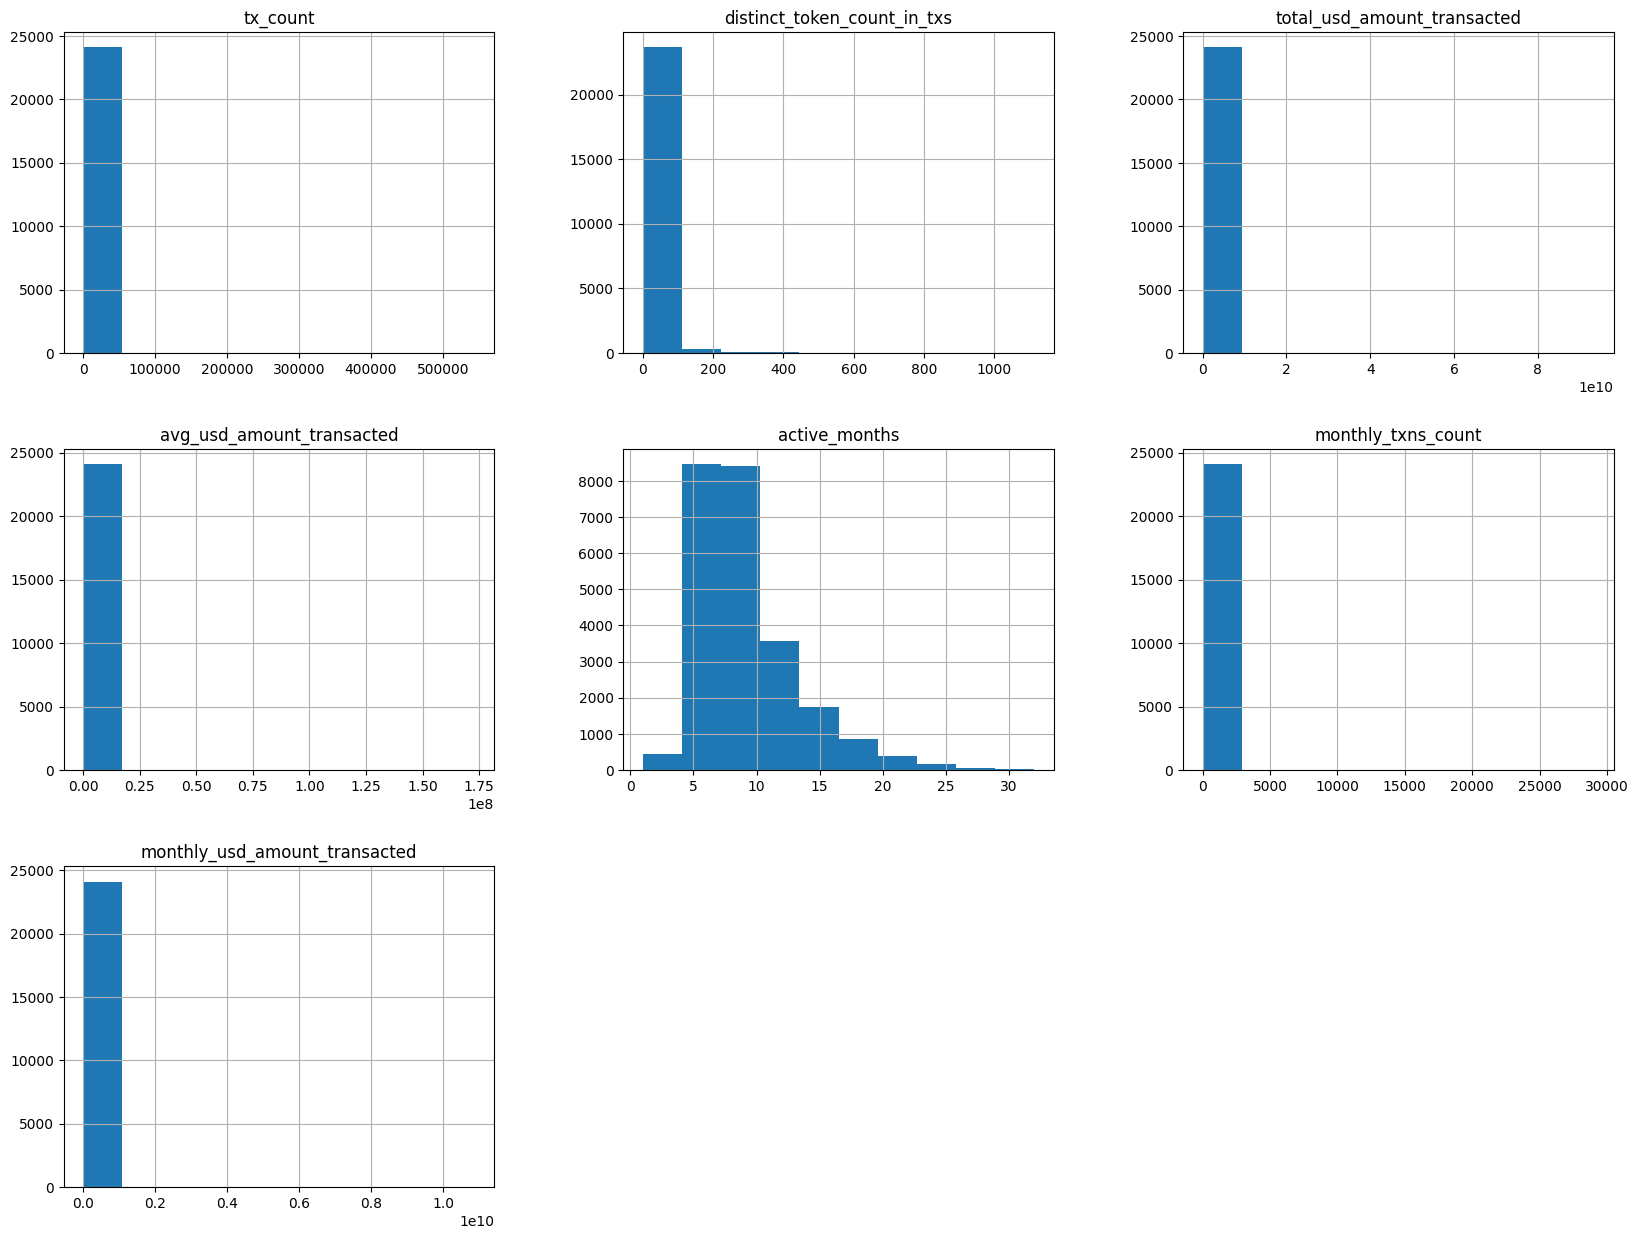

In [19]:
df.hist(figsize=(20,15))

In [20]:
#create a sample for visualization and computational issues
sample = df.sample(n=1000)

In [21]:
sample_num = sample.select_dtypes(exclude="object")
sample_num

tx_count  distinct_token_count_in_txs  total_usd_amount_transacted  \
21762     21.00                            8                    742624.20   
6209     174.00                           11                   8420548.41   
7542     103.00                           12                   6302037.03   
6248      28.00                            7                   8347682.59   
7306     193.00                           36                   6630689.77   
...         ...                          ...                          ...   
2408     469.00                           51                  34248697.83   
3814     433.00                           63                  17148180.42   
7189     133.00                           49                   6799817.15   
3885     103.00                           11                  16611814.36   
9778      43.00                            7                   4221025.54   

       avg_usd_amount_transacted  active_months  monthly_txns_count  \
21762                   35363.06              9                   2   
6209                    48393.96             10                  17   
7542                    61184.83             11                   9   
6248                   298131.52              9                   3   
7306                    34355.91             19                  10   
...                          ...            ...                 ...   
2408                    73024.94             16                  29   
3814                    39603.19              8                  54   
7189                    51126.44             14                   9   
3885                   161279.75              9                  11   
9778                    98163.38             10                   4   

       monthly_usd_amount_transacted  
21762                       82513.80  
6209                       842054.84  
7542                       572912.46  
6248                       927520.29  
7306                       348983.67  
...                              ...  
2408                      2140543.61  
3814                      2143522.55  
7189                       485701.23  
3885                      1845757.15  
9778                       422102.55  

[1000 rows x 7 columns]

In [22]:
#create a sns hist plot function i.e. histogram for the numerical values of my data:
def plot_distrib(sample):
  sample_num = sample.select_dtypes(exclude="object")
  num_columns = len(sample_num.columns)
  #if odd number of columns, add 1 to better create subplots
  if num_columns%2 == 1:
    adj_num_columns = num_columns+ 1

  fig, axes = plt.subplots(2, adj_num_columns//2, figsize = (70,50))
  for i, column in enumerate(sample_num.columns):
    ax = axes[i//(adj_num_columns//2),i%(adj_num_columns//2)]
    sns.histplot(sample[column], bins = 50, kde = True, ax = ax) #need to specify ax in the sns
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel(column)
  # If num_columns is odd, remove the last (empty) subplot
  if num_columns % 2 == 1:
    fig.delaxes(axes.flatten()[-1]) #axes instance of matplotlib.subplot is a 2d array with 2x6 grid of subplots

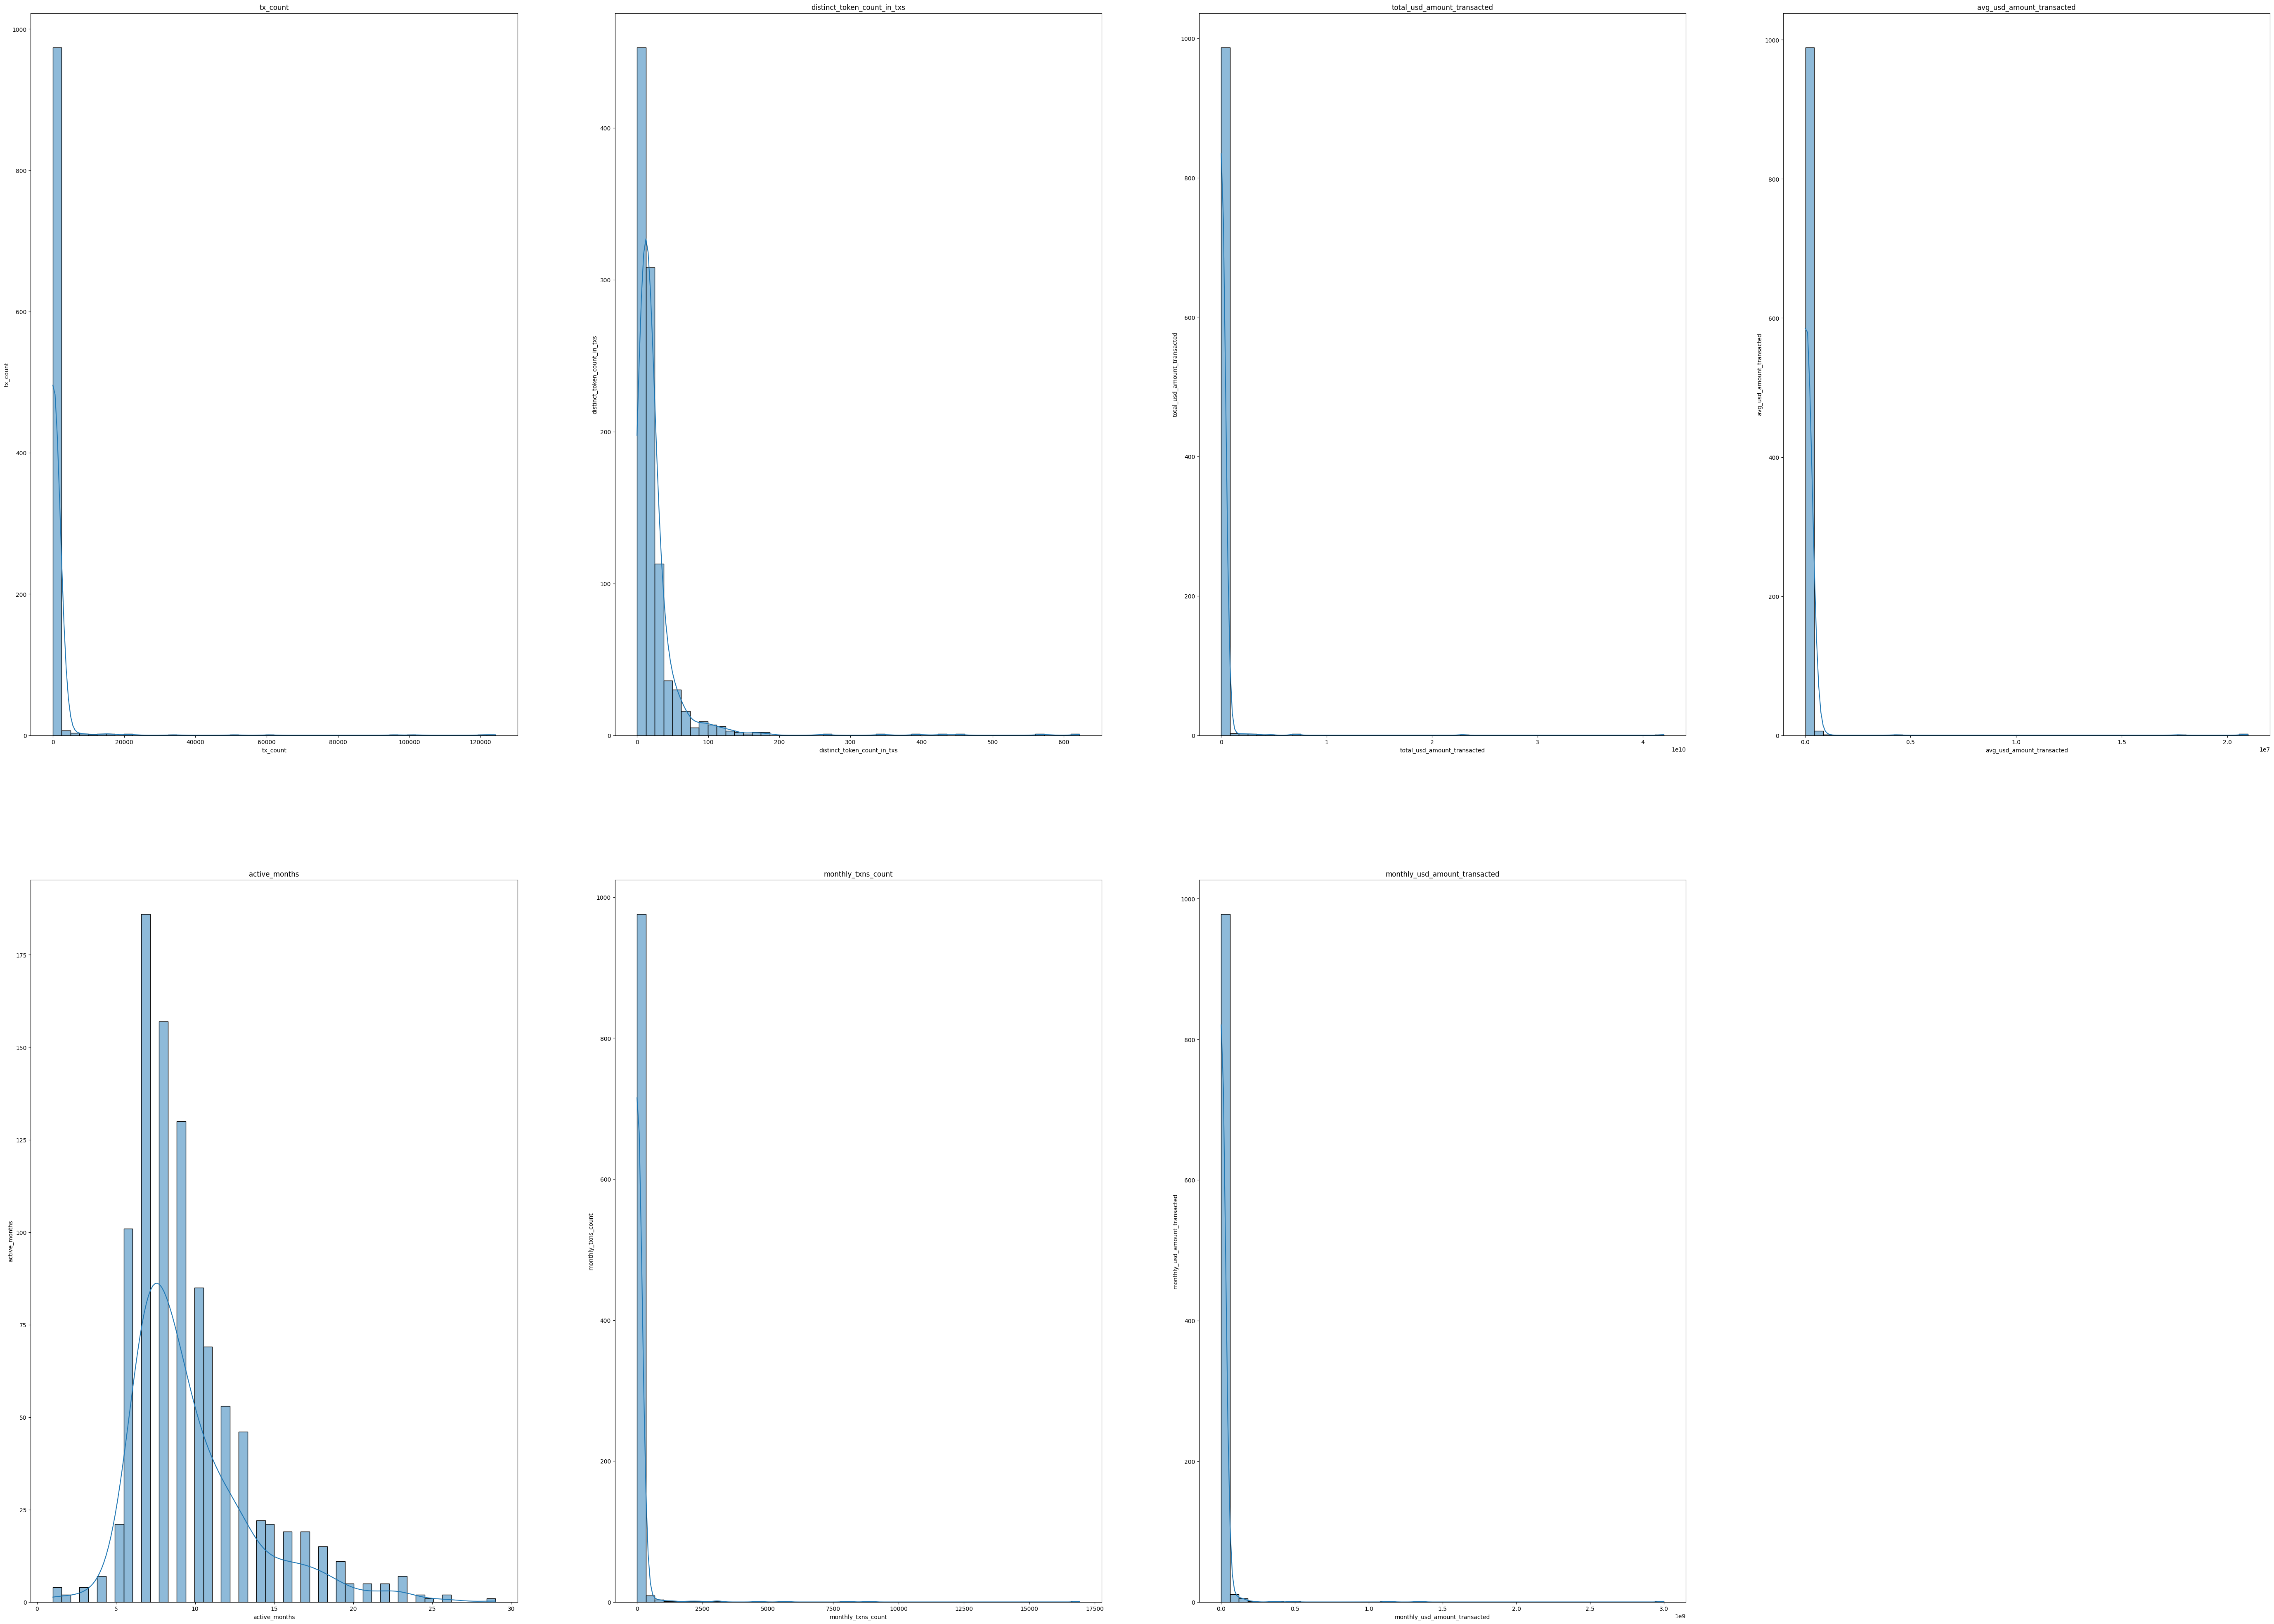

In [23]:
plot_distrib(sample)

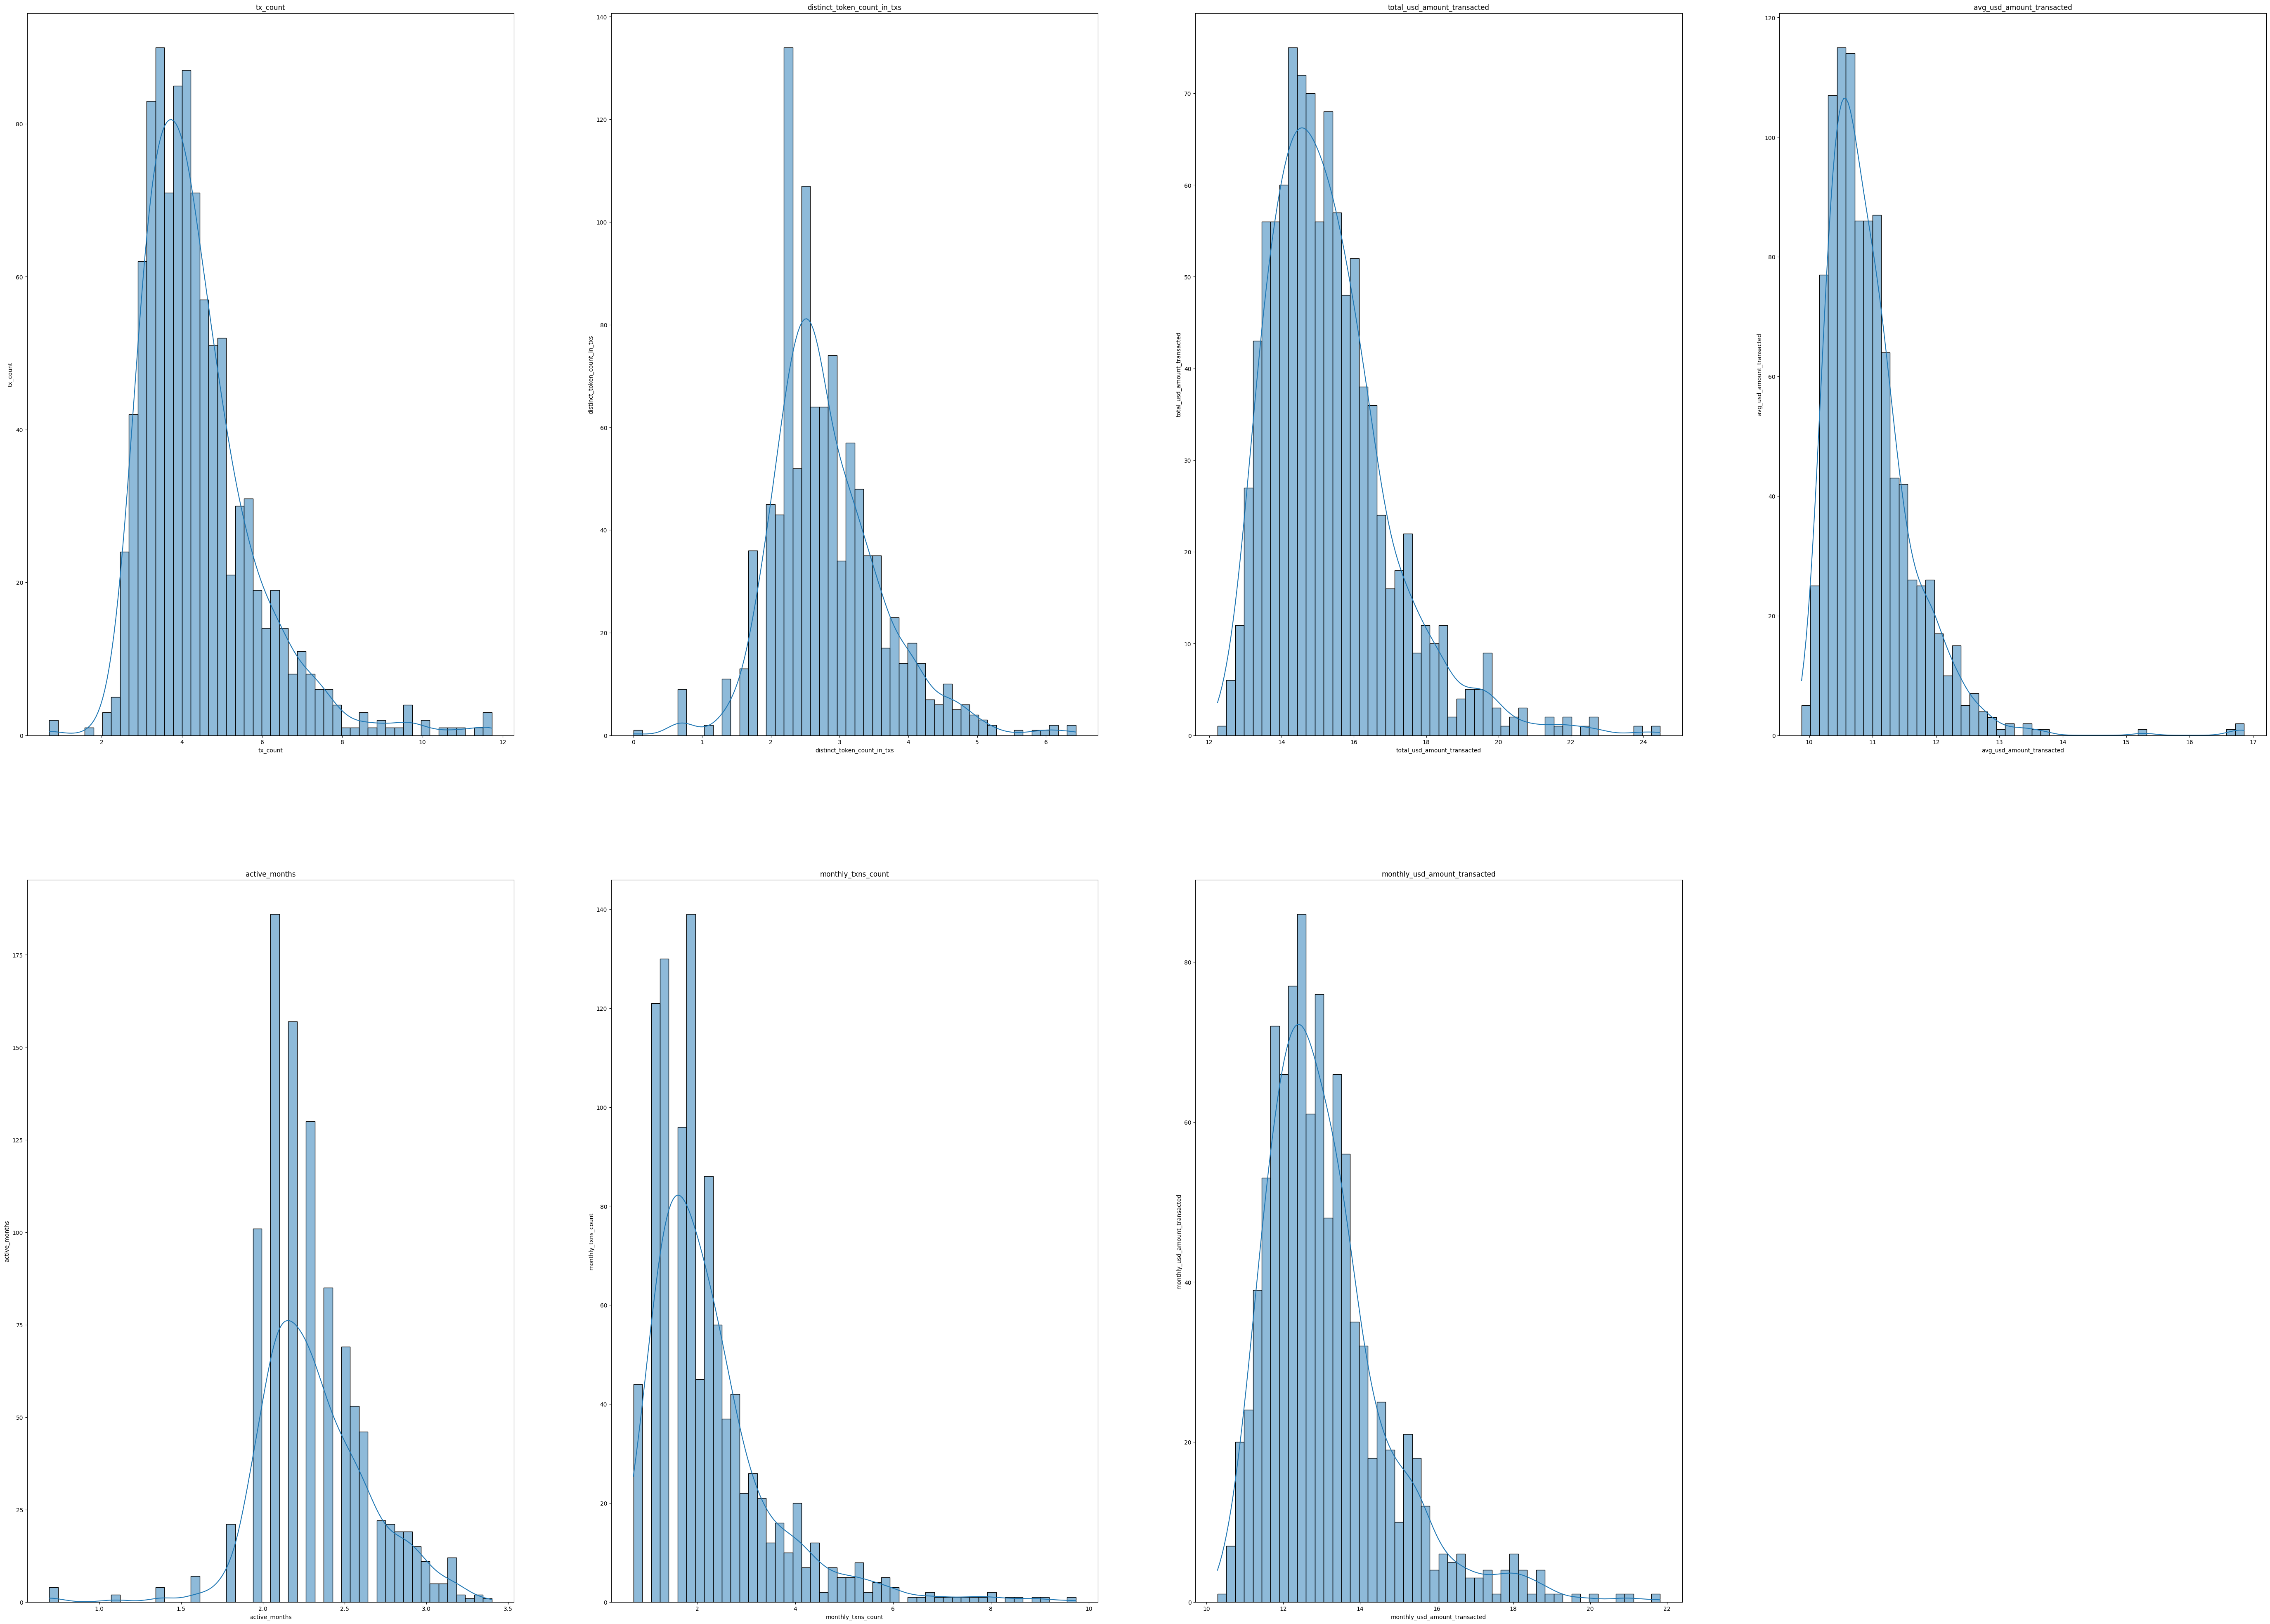

In [24]:
#most of the numerical plots above are positively skewed.
#apply log transformation

sample_num = sample.select_dtypes(exclude="object")
sample_num_log = sample_num.apply(lambda x: np.log(x+ 1))

plot_distrib(sample_num_log)




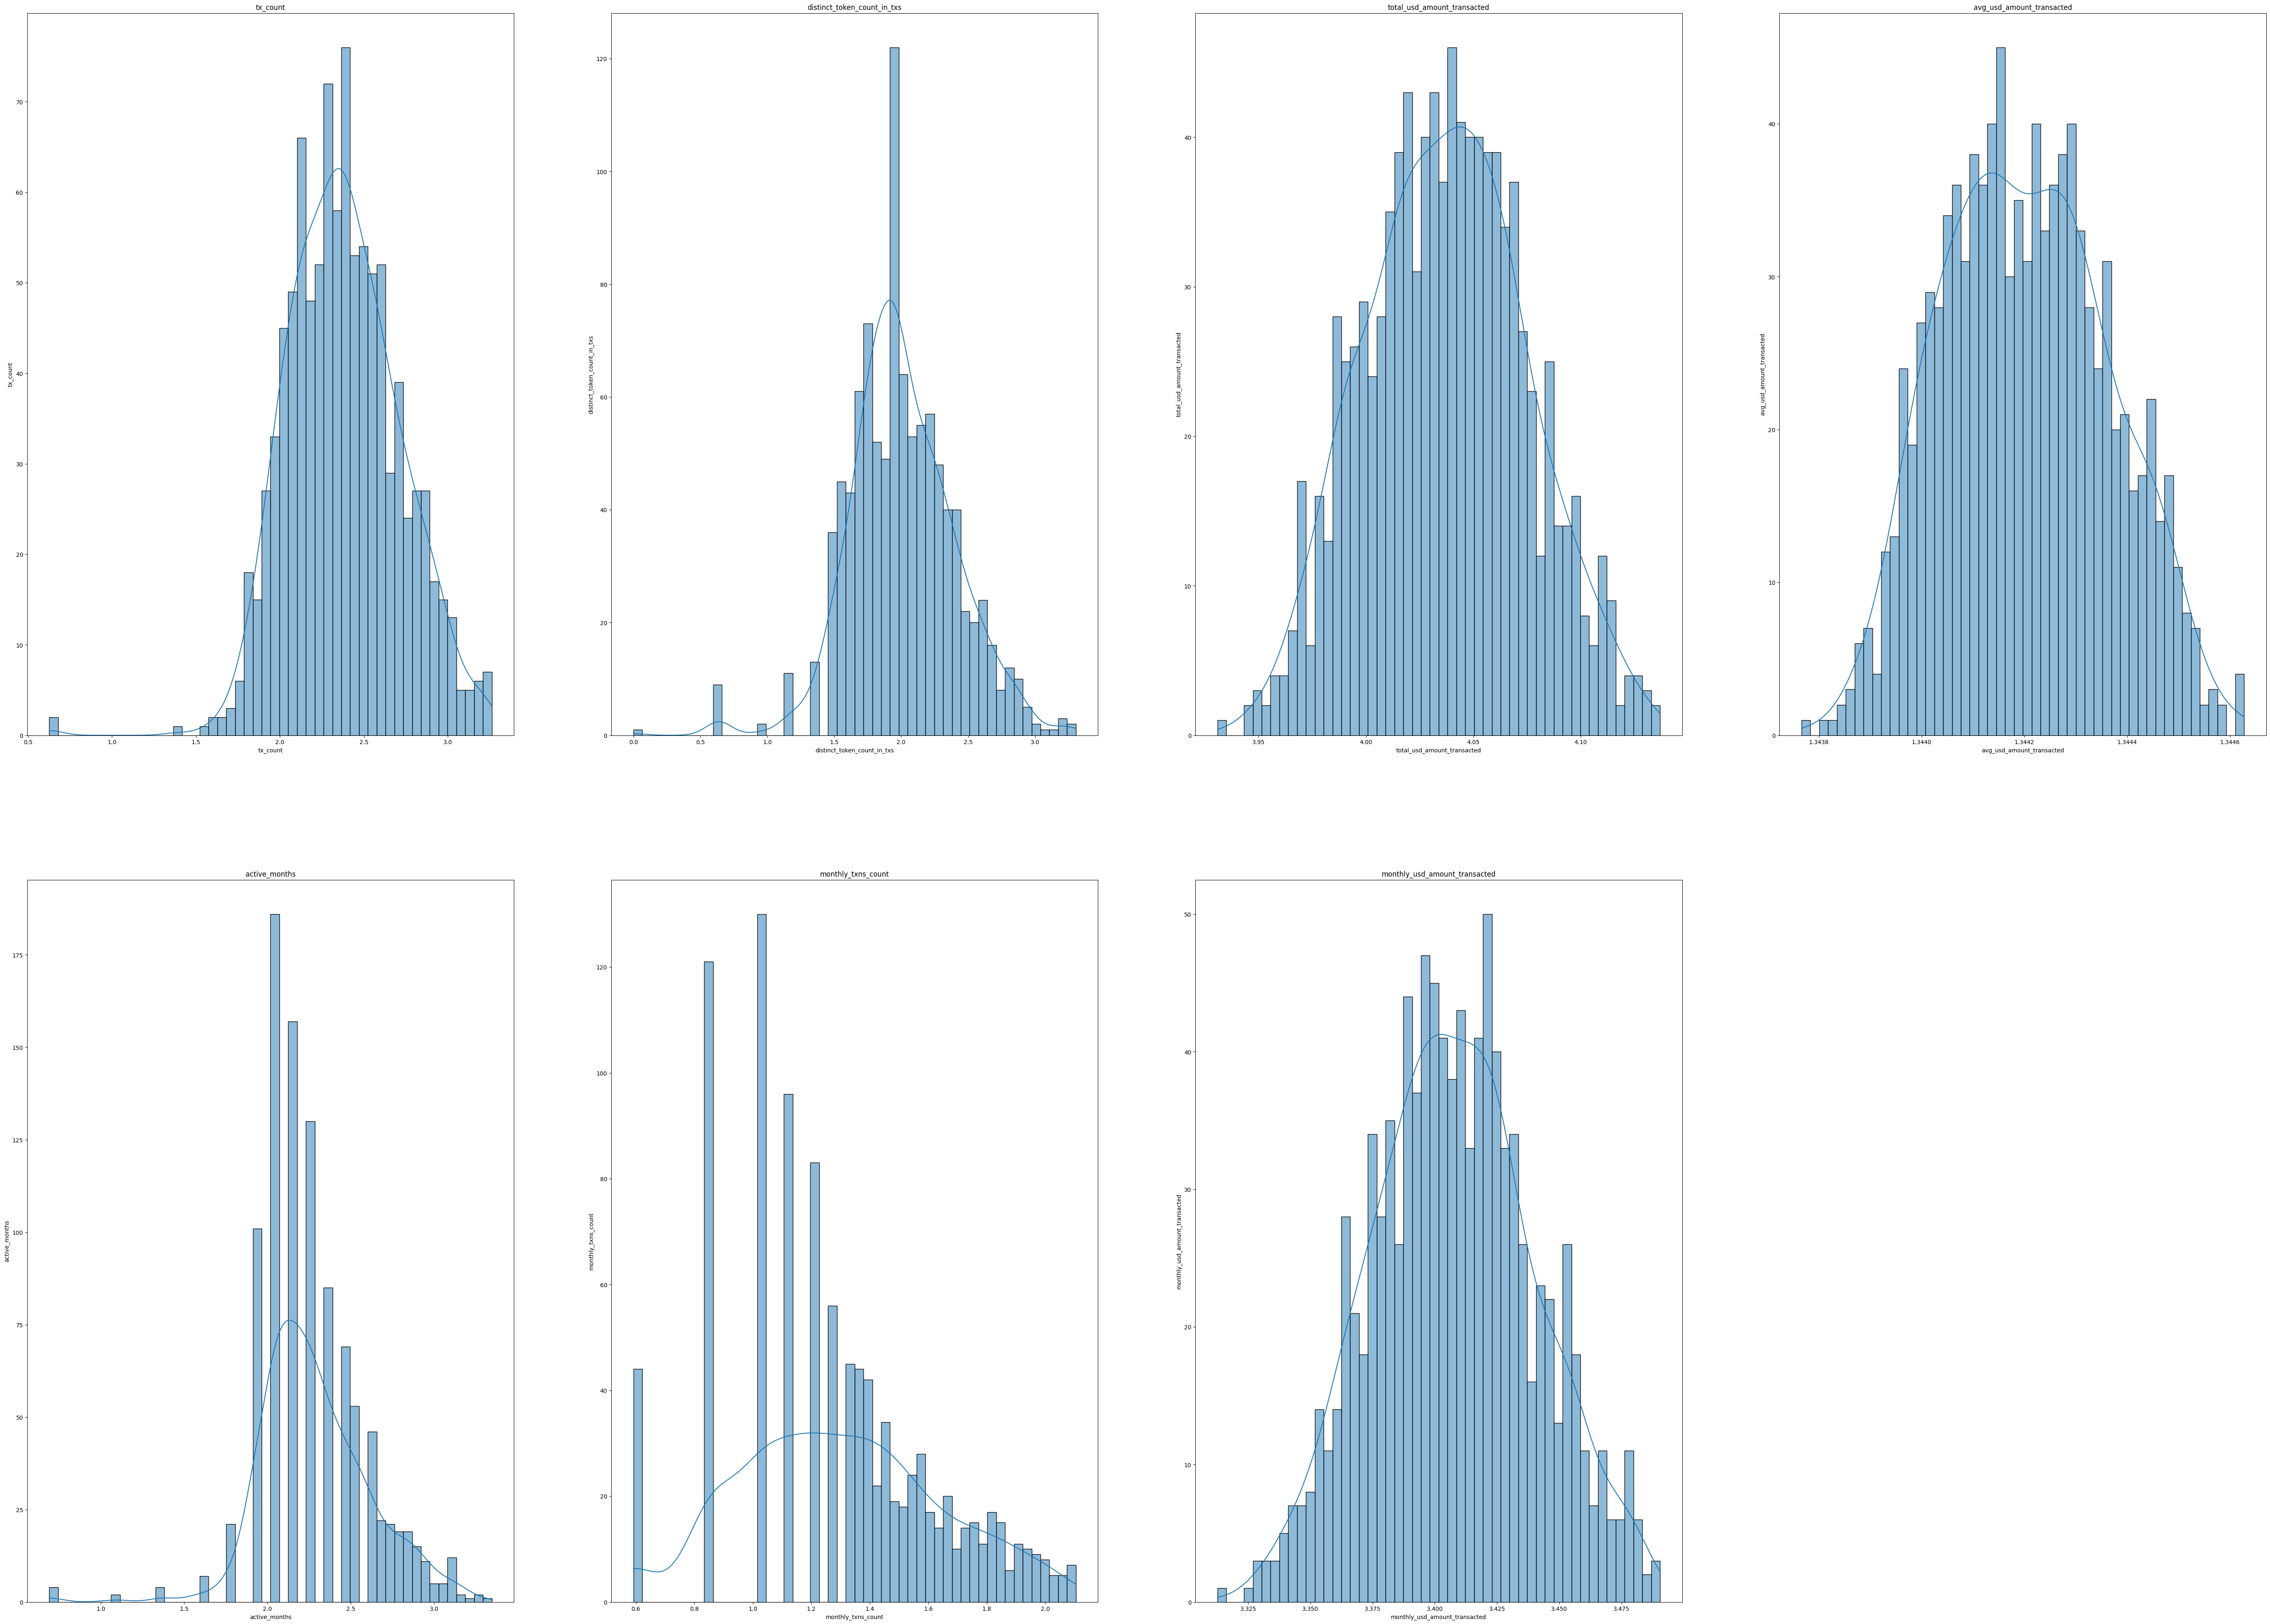

In [25]:
#most of the numerical plots above are positively skewed.
#apply Box_Cox transformation
#data must be positive
sample_num = sample.select_dtypes(exclude="object")
# add a constant to make all values positive
sample_num_positive = sample_num - sample_num.min().min() + 1
bc_transformed_data = sample_num_positive.apply(lambda col: st.boxcox(col)[0])

plot_distrib(bc_transformed_data)

**Insights**:
* **The Box-Cox transformation seems now to be more suitable for my purpose!**
* **I like the log transformation the most as for total amount and avg amount (i.e. amount per transaction) we can see a distinction between addresses with lower, higher values, and outliers**

#### Visualizing categorical data in a barplot

#####Insights on the top 20 addresses

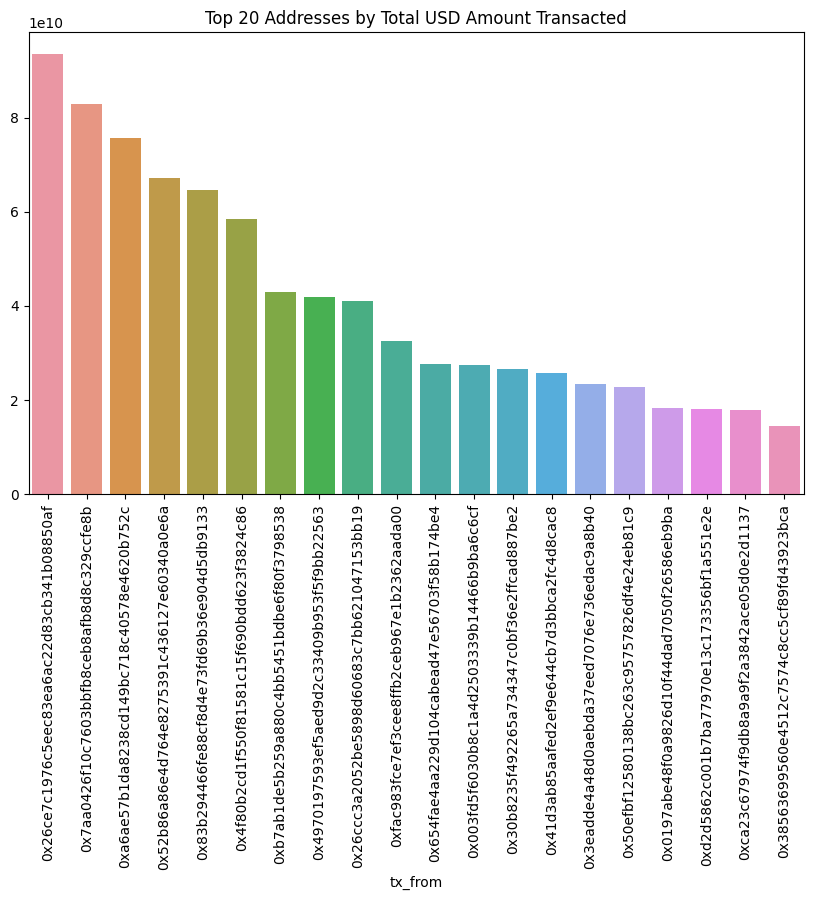

In [26]:
#transaction volume by top addresses

top_addresses = df.groupby("tx_from")['total_usd_amount_transacted'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(10,6))
sns.barplot(x=top_addresses.index,y= top_addresses.values)
plt.xticks(rotation=90)
plt.title('Top 20 Addresses by Total USD Amount Transacted')
plt.show()



In [27]:
f"The top 20 addresses contribute to nearly half of the total amount transacted, precisely: {((top_addresses.sum())/(np.sum(df['total_usd_amount_transacted']))) *100}% with a total of {top_addresses.sum()/10.00**9} billions"

'The top 20 addresses contribute to nearly half of the total amount transacted, precisely: 44.25930743285679% with a total of 822.967269035278 billions'

In [28]:
top_addresses

tx_from
0x26ce7c1976c5eec83ea6ac22d83cb341b08850af   93413356007.42
0x7aa0426f10c7603bbfb8ceb8afb8d8c329ccfe8b   82797756346.90
0xa6ae57b1da8238cd149bc718c40578e4620b752c   75558529891.35
0x52b86a86e4d764e8275391c436127e60340a0e6a   67199860810.47
0x83b294466fe88cf8d4e73fd69b36e904d5db9133   64551757781.87
0x4f80b2cd1f550f81581c15f690bdd623f3824c86   58406275298.08
0xb7ab1de5b259a880c4bb5451bdbe6f80f3798538   42872237665.49
0x4970197593ef5aed9d2c33409b953f5f9bb22563   41982657339.69
0x26ccc3a2052be5898d60683c7bb621047153bb19   41096167081.68
0xfac983fce7ef3cee8ffb2ceb967e1b2362aada00   32620583541.26
0x654fae4aa229d104cabead47e56703f58b174be4   27619230184.61
0x003fd5f6030b8c1a4d2503339b14466b9ba6c6cf   27450217636.74
0x30b8235f492265a734347c0bf36e2ffcad887be2   26518616299.56
0x41d3ab85aafed2ef9e644cb7d3bbca2fc4d8cac8   25681017061.75
0x3eadde4a48d0aebda37eed7076e736edac9a8b40   23507788669.75
0x50efbf12580138bc263c95757826df4e24eb81c9   22852471921.68
0x0197abe48f0a9826d10f44dad7050f

In [29]:
#IMPORTANT: this df is the same as the one we created below as we do not have any address duplicates in just one protocol
df_top_20_total_amount_addresses = df[df["tx_from"].isin(top_addresses.index.tolist())]
df_top_20_total_amount_addresses

tx_from  tx_count  \
1   0x26ce7c1976c5eec83ea6ac22d83cb341b08850af 544010.00   
2   0x7aa0426f10c7603bbfb8ceb8afb8d8c329ccfe8b 225383.00   
3   0xa6ae57b1da8238cd149bc718c40578e4620b752c 282253.00   
4   0x52b86a86e4d764e8275391c436127e60340a0e6a 320112.00   
5   0x83b294466fe88cf8d4e73fd69b36e904d5db9133  67556.00   
6   0x4f80b2cd1f550f81581c15f690bdd623f3824c86 203256.00   
7   0xb7ab1de5b259a880c4bb5451bdbe6f80f3798538 123832.00   
8   0x4970197593ef5aed9d2c33409b953f5f9bb22563 124158.00   
9   0x26ccc3a2052be5898d60683c7bb621047153bb19 214409.00   
10  0xfac983fce7ef3cee8ffb2ceb967e1b2362aada00  14616.00   
11  0x654fae4aa229d104cabead47e56703f58b174be4  15701.00   
12  0x003fd5f6030b8c1a4d2503339b14466b9ba6c6cf 351601.00   
13  0x30b8235f492265a734347c0bf36e2ffcad887be2 249327.00   
14  0x41d3ab85aafed2ef9e644cb7d3bbca2fc4d8cac8 110832.00   
15  0x3eadde4a48d0aebda37eed7076e736edac9a8b40  71263.00   
16  0x50efbf12580138bc263c95757826df4e24eb81c9  95879.00   
17  0x0197abe48f0a9826d10f44dad7050f26586eb9ba 298445.00   
18  0xd2d5862c001b7ba77970e13c173356bf1a551e2e 189865.00   
19  0xca23c67974f9db8a9a9f2a3842ace05d0e2d1137  49710.00   
20  0x38563699560e4512c7574c8cc5cf89fd43923bca 181542.00   

    distinct_token_count_in_txs  total_usd_amount_transacted  \
1                          1114               93413356007.42   
2                           385               82797756346.90   
3                           871               75558529891.35   
4                           530               67199860810.47   
5                            78               64551757781.87   
6                           545               58406275298.08   
7                           339               42872237665.49   
8                           571               41982657339.69   
9                           636               41096167081.68   
10                           43               32620583541.26   
11                          279               27619230184.61   
12                          476               27450217636.74   
13                          830               26518616299.56   
14                          421               25681017061.75   
15                          353               23507788669.75   
16                          395               22852471921.68   
17                          393               18345697571.35   
18                          522               18074730600.00   
19                          248               17996288509.16   
20                          713               14422028816.47   

    avg_usd_amount_transacted  active_months  monthly_txns_count  \
1                   171712.57             19               28632   
2                   367364.69             16               14086   
3                   267697.88             19               14855   
4                   209926.09             16               20007   
5                   955529.60              8                8444   
6                   287353.27              7               29036   
7                   346212.91             16                7739   
8                   338138.96             14                8868   
9                   191671.84             17               12612   
10                 2231840.69              3                4872   
11                 1759074.59             11                1427   
12                   78072.07             21               16742   
13                  106360.79             13               19179   
14                  231711.21             10               11083   
15                  329873.69             16                4453   
16                  238347.00             17                5639   
17                   61470.95             22               13565   
18                   95197.80              8               23733   
19                  362025.52             14                3550   
20                   79441.83             17               10678   

    

In [30]:
#IMPORTANT: this df is the same as the one we created above as we do not have any address duplicates in just one protocol
#look up values for the top 20 total amount amount groupby in to the df_top_20

type(top_addresses.reset_index())
#reset index so that the series becomes a dataframe!
top_addressess_df = top_addresses.reset_index()

merged_df = pd.merge(top_addressess_df, df_top_20_total_amount_addresses, how = "inner", left_on = ["tx_from", "total_usd_amount_transacted"], right_on=['tx_from', 'total_usd_amount_transacted'])
#merged_df.tx_from.duplicated()

merged_df

tx_from  total_usd_amount_transacted  \
0   0x26ce7c1976c5eec83ea6ac22d83cb341b08850af               93413356007.42   
1   0x7aa0426f10c7603bbfb8ceb8afb8d8c329ccfe8b               82797756346.90   
2   0xa6ae57b1da8238cd149bc718c40578e4620b752c               75558529891.35   
3   0x52b86a86e4d764e8275391c436127e60340a0e6a               67199860810.47   
4   0x83b294466fe88cf8d4e73fd69b36e904d5db9133               64551757781.87   
5   0x4f80b2cd1f550f81581c15f690bdd623f3824c86               58406275298.08   
6   0xb7ab1de5b259a880c4bb5451bdbe6f80f3798538               42872237665.49   
7   0x4970197593ef5aed9d2c33409b953f5f9bb22563               41982657339.69   
8   0x26ccc3a2052be5898d60683c7bb621047153bb19               41096167081.68   
9   0xfac983fce7ef3cee8ffb2ceb967e1b2362aada00               32620583541.26   
10  0x654fae4aa229d104cabead47e56703f58b174be4               27619230184.61   
11  0x003fd5f6030b8c1a4d2503339b14466b9ba6c6cf               27450217636.74   
12  0x30b8235f492265a734347c0bf36e2ffcad887be2               26518616299.56   
13  0x41d3ab85aafed2ef9e644cb7d3bbca2fc4d8cac8               25681017061.75   
14  0x3eadde4a48d0aebda37eed7076e736edac9a8b40               23507788669.75   
15  0x50efbf12580138bc263c95757826df4e24eb81c9               22852471921.68   
16  0x0197abe48f0a9826d10f44dad7050f26586eb9ba               18345697571.35   
17  0xd2d5862c001b7ba77970e13c173356bf1a551e2e               18074730600.00   
18  0xca23c67974f9db8a9a9f2a3842ace05d0e2d1137               17996288509.16   
19  0x38563699560e4512c7574c8cc5cf89fd43923bca               14422028816.47   

    tx_count  distinct_token_count_in_txs  avg_usd_amount_transacted  \
0  544010.00                         1114                  171712.57   
1  225383.00                          385                  367364.69   
2  282253.00                          871                  267697.88   
3  320112.00                          530                  209926.09   
4   67556.00                           78                  955529.60   
5  203256.00                          545                  287353.27   
6  123832.00                          339                  346212.91   
7  124158.00                          571                  338138.96   
8  214409.00                          636                  191671.84   
9   14616.00                           43                 2231840.69   
10  15701.00                          279                 1759074.59   
11 351601.00                          476                   78072.07   
12 249327.00                          830                  106360.79   
13 110832.00                          421                  231711.21   
14  71263.00                          353                  329873.69   
15  95879.00                          395                  238347.00   
16 298445.00                          393                   61470.95   
17 189865.00                          522                   95197.80   
18  49710.00                          248                  362025.52   
19 181542.00                          713                   79441.83   

    active_months  monthly_txns_count  monthly_usd_amount_transacted  
0              19               28632                  4916492421.44  
1              16               14086                  5174859771.68  
2              19               14855                  3976764731.12  
3              16               20007                  4199991300.65  
4               8                8444                  8068969722.73  
5               7               29036                  8343753614.01  
6              16                7739                  2679514854.09  
7              14                8868                  2998761238.55  
8              17               12612                  2417421593.04  
9               3                4872                 10873527847.09  
10             11                1427                  2510839107.69  
11            

**Insights in total amount of top addresses**

* the biggest aggregated transaction volumes is conducted on the DEXES which makes sense, as exchanging tokens is usually bigger than lending tokens. Exchanging = Lending + Non lending

* the 16 biggest ones are all addresses that are ALL engaging with MEV bots to extract value

* **for the total amount of the top addresses our insights do not change, and we can further assume that there could be a cluster for addresses with high total values that are mostly engaged with MEV bots**




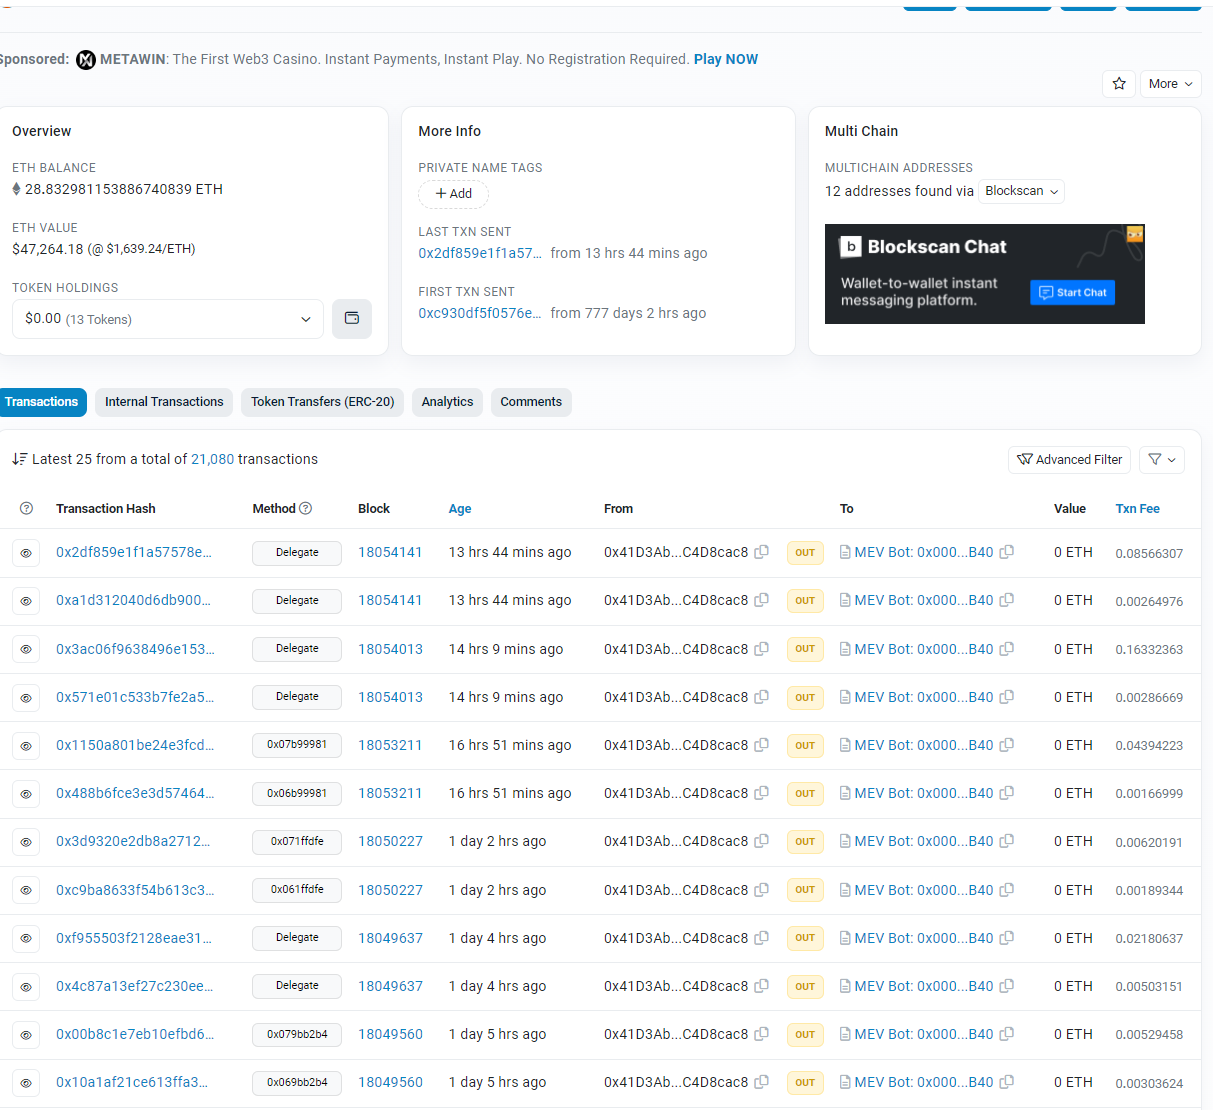

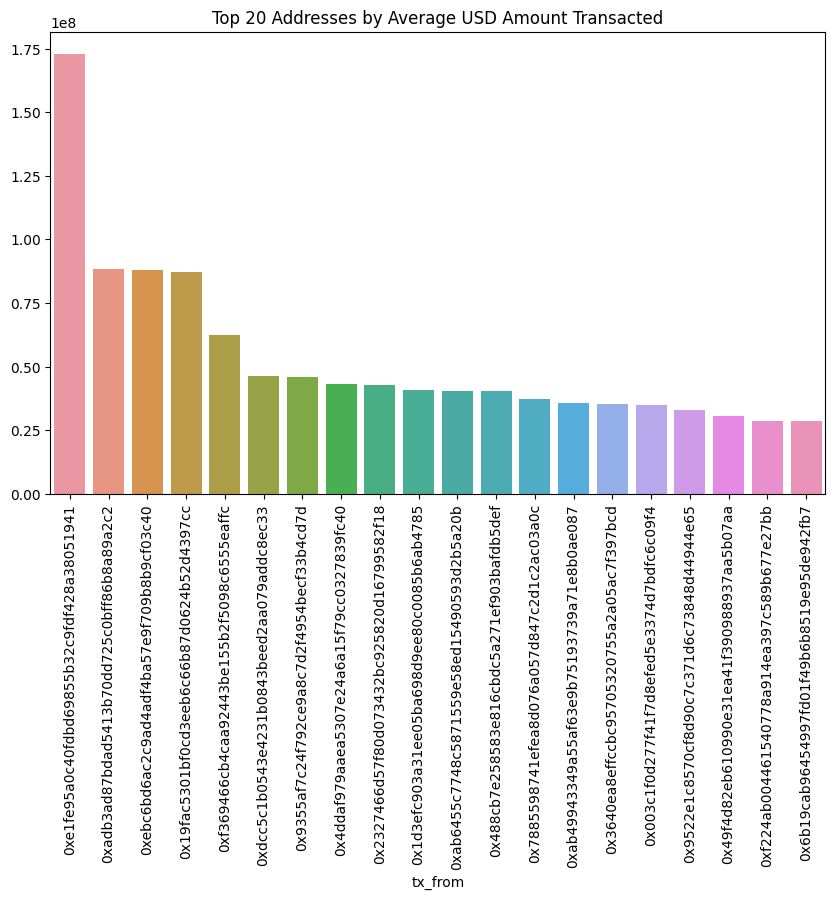

In [31]:
#Average Volume measured as value per transaction by Address -> I'm interested, which addresses had the highest average value per transaction (total value divided by amount of transactions)

top_avg_addresses = df.groupby('tx_from')['avg_usd_amount_transacted'].max().sort_values(ascending=False).head(20) #after grouping per addresses I decided to get the highest (max) value instead of the mean of the mean -> to be discussed
plt.figure(figsize=(10, 6))
sns.barplot(x=top_avg_addresses.index, y=top_avg_addresses.values)
plt.xticks(rotation=90)
plt.title('Top 20 Addresses by Average USD Amount Transacted')
plt.show()



In [32]:
top_avg_addresses

tx_from
0xe1fe95a0c40fdbd69855b32c9fdf428a38051941   172967261.45
0xadb3ad87bdad5413b70dd725c0bff86b8a89a2c2    88417497.27
0xebc6bd6ac2c9ad4adf4ba57e9f709b8b9cf03c40    87967048.53
0x19fac5301bf0cd3eeb6c66b87d0624b52d4397cc    87090039.60
0xf369466cb4caa92443be155b2f5098c6555eaffc    62453261.94
0xdcc5c1b0543e4231b0843beed2aa079addc8ec33    46408627.56
0x9355af7c24f792ce9a8c7d2f4954becf33b4cd7d    45937250.63
0x4ddaf979aaea5307e24a6a15f79cc0327839fc40    43038269.40
0x2327466d57f80d073432bc925820d16799582f18    42692577.05
0x1d3efc903a31ee05ba698d9ee80c0085b6ab4785    40675065.78
0xab6455c7748c5871559e58ed15490593d2b5a20b    40524000.00
0x488cb7e258583e816cbdc5a271ef903bafdb5def    40390367.42
0x7885598741efea8d076a057d847c2d1c2ac03a0c    37316628.98
0xab49943349a55af63e9b75193739a71e8b0ae087    35812317.34
0x3640ea8effccbc95705320755a2a05ac7f397bcd    35134229.90
0x003c1f0d277f41f7d8efed5e3374d7bdfc6c09f4    35079296.92
0x9522e1c8570cf8d90c7c371d6c73848d44944e65    32762941.19
0x49f4

In [33]:
#IMPORTANT: this df is the same as the one we created below as we do not have any address duplicates in just one protocol
df_top_20_avg_addresses = df[df["tx_from"].isin(top_avg_addresses.index.tolist())]
df_top_20_avg_addresses

tx_from  tx_count  \
56    0x19fac5301bf0cd3eeb6c66b87d0624b52d4397cc     58.00   
144   0xf224ab004461540778a914ea397c589b677e27bb     64.00   
358   0xebc6bd6ac2c9ad4adf4ba57e9f709b8b9cf03c40      5.00   
467   0x488cb7e258583e816cbdc5a271ef903bafdb5def      8.00   
788   0xadb3ad87bdad5413b70dd725c0bff86b8a89a2c2      2.00   
795   0xe1fe95a0c40fdbd69855b32c9fdf428a38051941      1.00   
1006  0x6b19cab96454997fd01f49b6b8519e95de942fb7      4.00   
1127  0x49f4d82eb610990e31ea41f390988937aa5b07aa      3.00   
1220  0x1d3efc903a31ee05ba698d9ee80c0085b6ab4785      2.00   
1298  0x7885598741efea8d076a057d847c2d1c2ac03a0c      2.00   
1490  0xf369466cb4caa92443be155b2f5098c6555eaffc      1.00   
1900  0xdcc5c1b0543e4231b0843beed2aa079addc8ec33      1.00   
1923  0x9355af7c24f792ce9a8c7d2f4954becf33b4cd7d      1.00   
2026  0x4ddaf979aaea5307e24a6a15f79cc0327839fc40      1.00   
2036  0x2327466d57f80d073432bc925820d16799582f18      1.00   
2114  0xab6455c7748c5871559e58ed15490593d2b5a20b      1.00   
2320  0xab49943349a55af63e9b75193739a71e8b0ae087      1.00   
2359  0x3640ea8effccbc95705320755a2a05ac7f397bcd      1.00   
2362  0x003c1f0d277f41f7d8efed5e3374d7bdfc6c09f4      1.00   
2483  0x9522e1c8570cf8d90c7c371d6c73848d44944e65      1.00   

      distinct_token_count_in_txs  total_usd_amount_transacted  \
56                              0                5051222296.73   
144                             3                1821887988.88   
358                             3                 439835242.67   
467                             0                 323122939.35   
788                             1                 176834994.54   
795                             0                 172967261.45   
1006                            1                 113802170.96   
1127                            2                  91291026.58   
1220                            1                  81350131.57   
1298                            1                  74633257.96   
1490                            1                  62453261.94   
1900                            1                  46408627.56   
1923                            1                  45937250.63   
2026                            1                  43038269.40   
2036                            1                  42692577.05   
2114                            1                  40524000.00   
2320                            1                  35812317.34   
2359                            1                  35134229.90   
2362                            1                  35079296.92   
2483                            1                  32762941.19   

      avg_usd_amount_transacted  active_months  monthly_txns_count  \
56                  87090039.60              5                  11   
144                 28466999.83              1                  64   
358                 87967048.53              1                   5   
467                 40390367.42              1                   8   
788                 88417497.27              1                   2   
795                172967261.45              1                   1   
1006                28450542.74              2                   2   
1127                30430342.19              2                   1   
1220                40675065.78              1                   2   
1298                37316628.98              1                   2   
1490                62453261.94              1                   1   
1900                46408627.56              1                   1   
1923                45937250.63              1                   1   
2026                43038269.40              1                   1   
2036                42692577.05              1                   1   
2114                40524000.00              1                   1   
2320                35812317.34              1                   1   
2359                35134229.90              1                   1   
2362                3

In [34]:
#IMPORTANT: this df is the same as the one we created above as we do not have any address duplicates in just one protocol
#look up values for the top 20 avg amount groupby in to the df_top_20

type(top_avg_addresses.reset_index())
#reset index so that the series becomes a dataframe!
top_avg_addresses_df = top_avg_addresses.reset_index()

merged_df = pd.merge(top_avg_addresses_df, df_top_20_avg_addresses, how = "inner", left_on = ["tx_from", "avg_usd_amount_transacted"], right_on=['tx_from', 'avg_usd_amount_transacted'])
#merged_df.tx_from.duplicated()

merged_df

tx_from  avg_usd_amount_transacted  \
0   0xe1fe95a0c40fdbd69855b32c9fdf428a38051941               172967261.45   
1   0xadb3ad87bdad5413b70dd725c0bff86b8a89a2c2                88417497.27   
2   0xebc6bd6ac2c9ad4adf4ba57e9f709b8b9cf03c40                87967048.53   
3   0x19fac5301bf0cd3eeb6c66b87d0624b52d4397cc                87090039.60   
4   0xf369466cb4caa92443be155b2f5098c6555eaffc                62453261.94   
5   0xdcc5c1b0543e4231b0843beed2aa079addc8ec33                46408627.56   
6   0x9355af7c24f792ce9a8c7d2f4954becf33b4cd7d                45937250.63   
7   0x4ddaf979aaea5307e24a6a15f79cc0327839fc40                43038269.40   
8   0x2327466d57f80d073432bc925820d16799582f18                42692577.05   
9   0x1d3efc903a31ee05ba698d9ee80c0085b6ab4785                40675065.78   
10  0xab6455c7748c5871559e58ed15490593d2b5a20b                40524000.00   
11  0x488cb7e258583e816cbdc5a271ef903bafdb5def                40390367.42   
12  0x7885598741efea8d076a057d847c2d1c2ac03a0c                37316628.98   
13  0xab49943349a55af63e9b75193739a71e8b0ae087                35812317.34   
14  0x3640ea8effccbc95705320755a2a05ac7f397bcd                35134229.90   
15  0x003c1f0d277f41f7d8efed5e3374d7bdfc6c09f4                35079296.92   
16  0x9522e1c8570cf8d90c7c371d6c73848d44944e65                32762941.19   
17  0x49f4d82eb610990e31ea41f390988937aa5b07aa                30430342.19   
18  0xf224ab004461540778a914ea397c589b677e27bb                28466999.83   
19  0x6b19cab96454997fd01f49b6b8519e95de942fb7                28450542.74   

    tx_count  distinct_token_count_in_txs  total_usd_amount_transacted  \
0       1.00                            0                 172967261.45   
1       2.00                            1                 176834994.54   
2       5.00                            3                 439835242.67   
3      58.00                            0                5051222296.73   
4       1.00                            1                  62453261.94   
5       1.00                            1                  46408627.56   
6       1.00                            1                  45937250.63   
7       1.00                            1                  43038269.40   
8       1.00                            1                  42692577.05   
9       2.00                            1                  81350131.57   
10      1.00                            1                  40524000.00   
11      8.00                            0                 323122939.35   
12      2.00                            1                  74633257.96   
13      1.00                            1                  35812317.34   
14      1.00                            1                  35134229.90   
15      1.00                            1                  35079296.92   
16      1.00                            1                  32762941.19   
17      3.00                            2                  91291026.58   
18     64.00                            3                1821887988.88   
19      4.00                            1                 113802170.96   

    active_months  monthly_txns_count  monthly_usd_amount_transacted  
0               1                   1                   172967261.45  
1               1                   2                   176834994.54  
2               1                   5                   439835242.67  
3               5                  11                  1010244459.35  
4               1                   1                    62453261.94  
5               1                   1                    46408627.56  
6               1                   1                    45937250.63  
7               1                   1                    43038269.40  
8               1                   1                    42692577.05  
9               1                   2                    81350131.57  
10              1                   1                    40524000.00  
11            

In [35]:
shared_addresses = top_avg_addresses.index.isin(top_addresses.index.tolist())
#np.argindex(shared_addresses == True)
indices = np.where(top_avg_addresses.index.isin(top_addresses.index.tolist()))
indices[0]
shared_addresses

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

**Insights highest amount per transaction (avg amount)**

* no common addresses shared between the addresses with the highest total values and the highest avg values -> could indicate a cluster/pattern!
* randomly checking on etherscan, these transactions were valid ones, yet unlabeled -> could indicate a trader pattern/cluster




###Relationships between the features:
* between numerical -> scatter plots or pair plots
* between selected categorical and numerical -> violin plots - > **will be done in a later analysis (different notebook) when I segment my data based on quantiles**

####Scatterplots

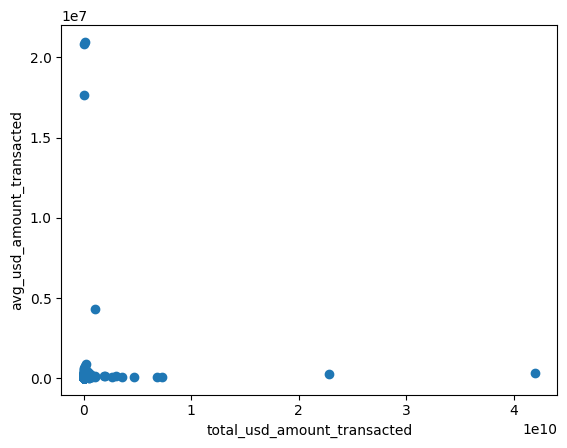

In [36]:
fig, ax = plt.subplots()
ax.scatter(sample["total_usd_amount_transacted"], sample["avg_usd_amount_transacted"])
ax.set_xlabel("total_usd_amount_transacted")
ax.set_ylabel("avg_usd_amount_transacted")
plt.show()

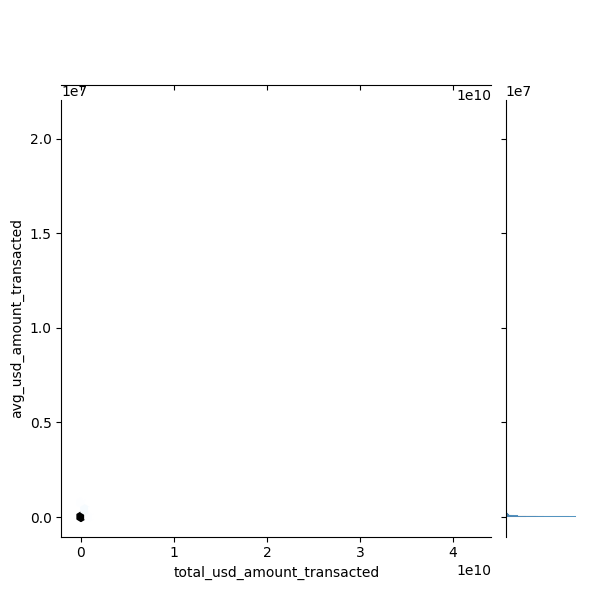

In [37]:
sns.jointplot(x=sample["total_usd_amount_transacted"], y = sample["avg_usd_amount_transacted"], kind = "hex")

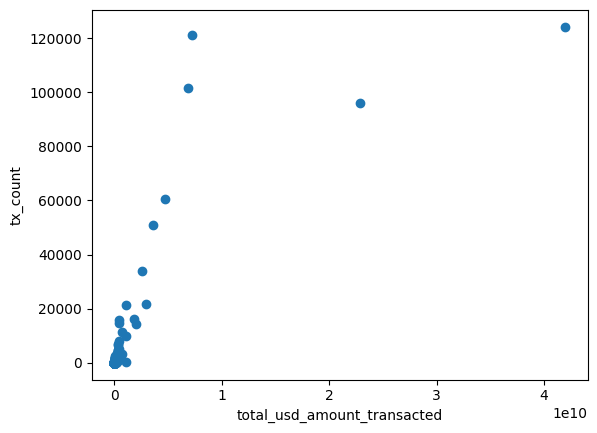

In [38]:
fig, ax = plt.subplots()
ax.scatter(sample["total_usd_amount_transacted"], sample["tx_count"])
ax.set_xlabel("total_usd_amount_transacted")
ax.set_ylabel("tx_count")
plt.show()

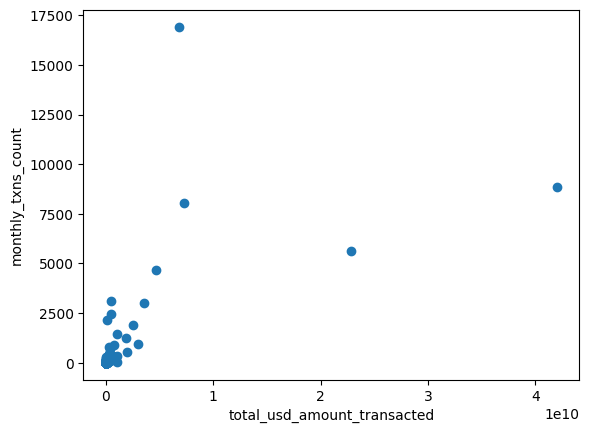

In [39]:
fig, ax = plt.subplots()
ax.scatter(sample["total_usd_amount_transacted"], sample["monthly_txns_count"])
ax.set_xlabel("total_usd_amount_transacted")
ax.set_ylabel("monthly_txns_count")
plt.show()

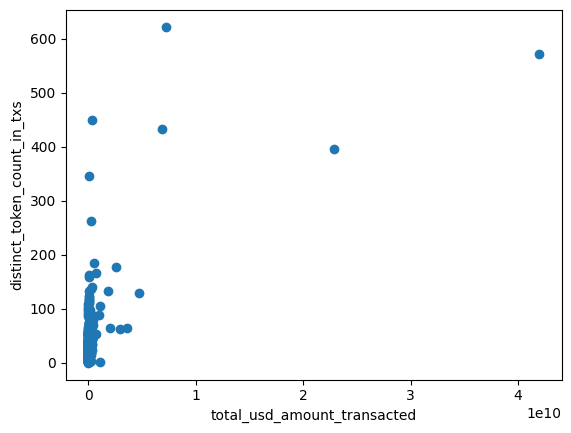

In [40]:
fig, ax = plt.subplots()
ax.scatter(sample["total_usd_amount_transacted"], sample["distinct_token_count_in_txs"])
ax.set_xlabel("total_usd_amount_transacted")
ax.set_ylabel("distinct_token_count_in_txs")
plt.show()

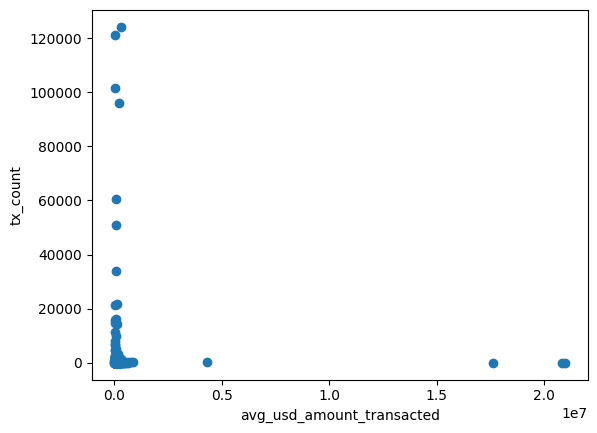

In [41]:
fig, ax = plt.subplots()
ax.scatter(sample["avg_usd_amount_transacted"], sample["tx_count"])
ax.set_xlabel("avg_usd_amount_transacted")
ax.set_ylabel("tx_count")
plt.show()

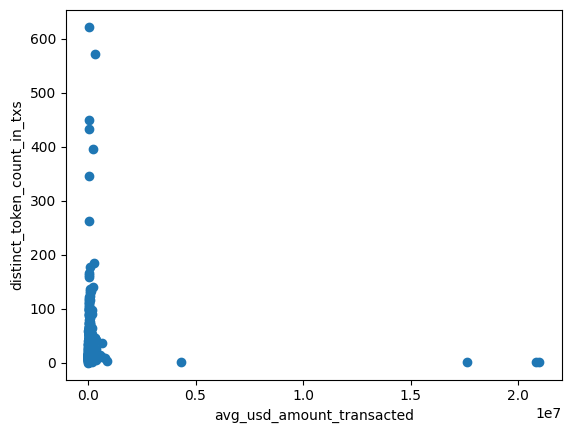

In [42]:
fig, ax = plt.subplots()
ax.scatter(sample["avg_usd_amount_transacted"], sample["distinct_token_count_in_txs"])
ax.set_xlabel("avg_usd_amount_transacted")
ax.set_ylabel("distinct_token_count_in_txs")
plt.show()

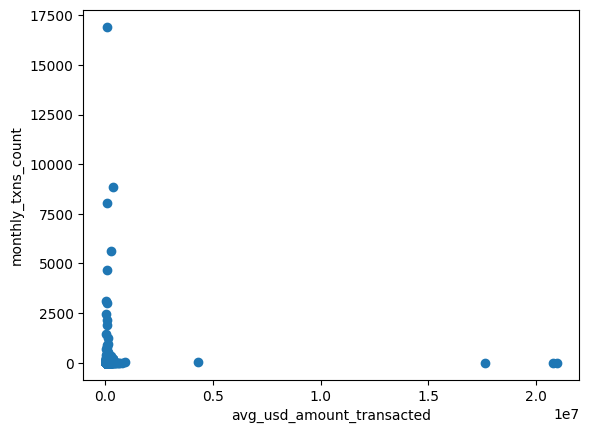

In [43]:
fig, ax = plt.subplots()
ax.scatter(sample["avg_usd_amount_transacted"], sample["monthly_txns_count"])
ax.set_xlabel("avg_usd_amount_transacted")
ax.set_ylabel("monthly_txns_count")
plt.show()

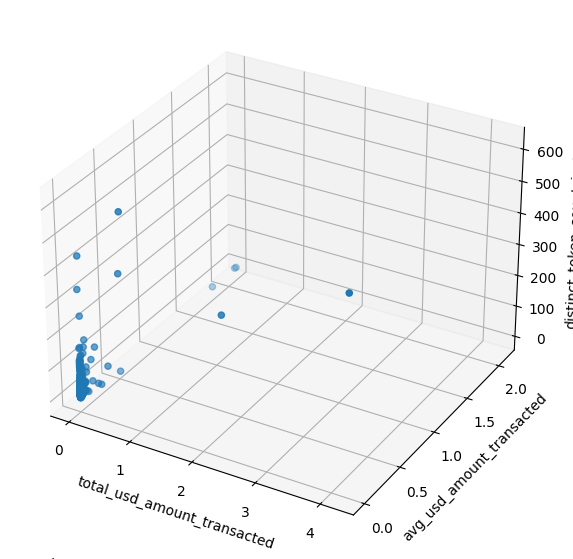

In [44]:
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure
fig = plt.figure(figsize=(10, 7))

# Add 3D subplot -> create an axis object that maps the plot-> more powerful
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sample["total_usd_amount_transacted"], sample["avg_usd_amount_transacted"], sample["distinct_token_count_in_txs"])
ax.set_xlabel("total_usd_amount_transacted")
ax.set_ylabel("avg_usd_amount_transacted")
ax.set_zlabel("distinct_token_count_in_txs")

plt.show()


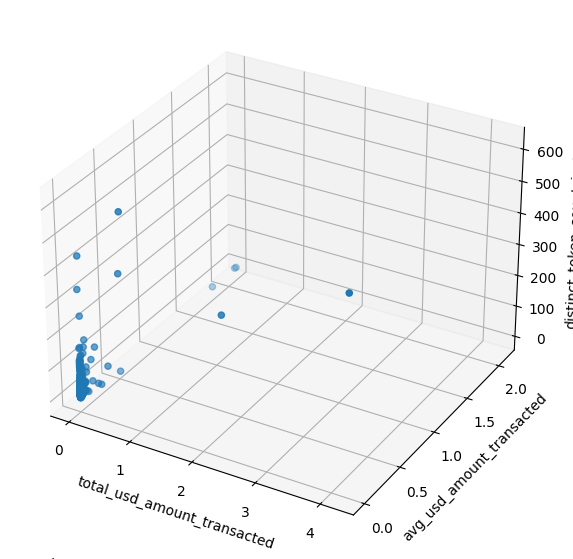

In [45]:
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure
fig = plt.figure(figsize=(10, 7))

# Add 3D subplot -> create an axis object that maps the plot-> more powerful
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sample["total_usd_amount_transacted"], sample["avg_usd_amount_transacted"], sample["distinct_token_count_in_txs"])
ax.set_xlabel("total_usd_amount_transacted")
ax.set_ylabel("avg_usd_amount_transacted")
ax.set_zlabel("distinct_token_count_in_txs")

plt.show()

####pairplots

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


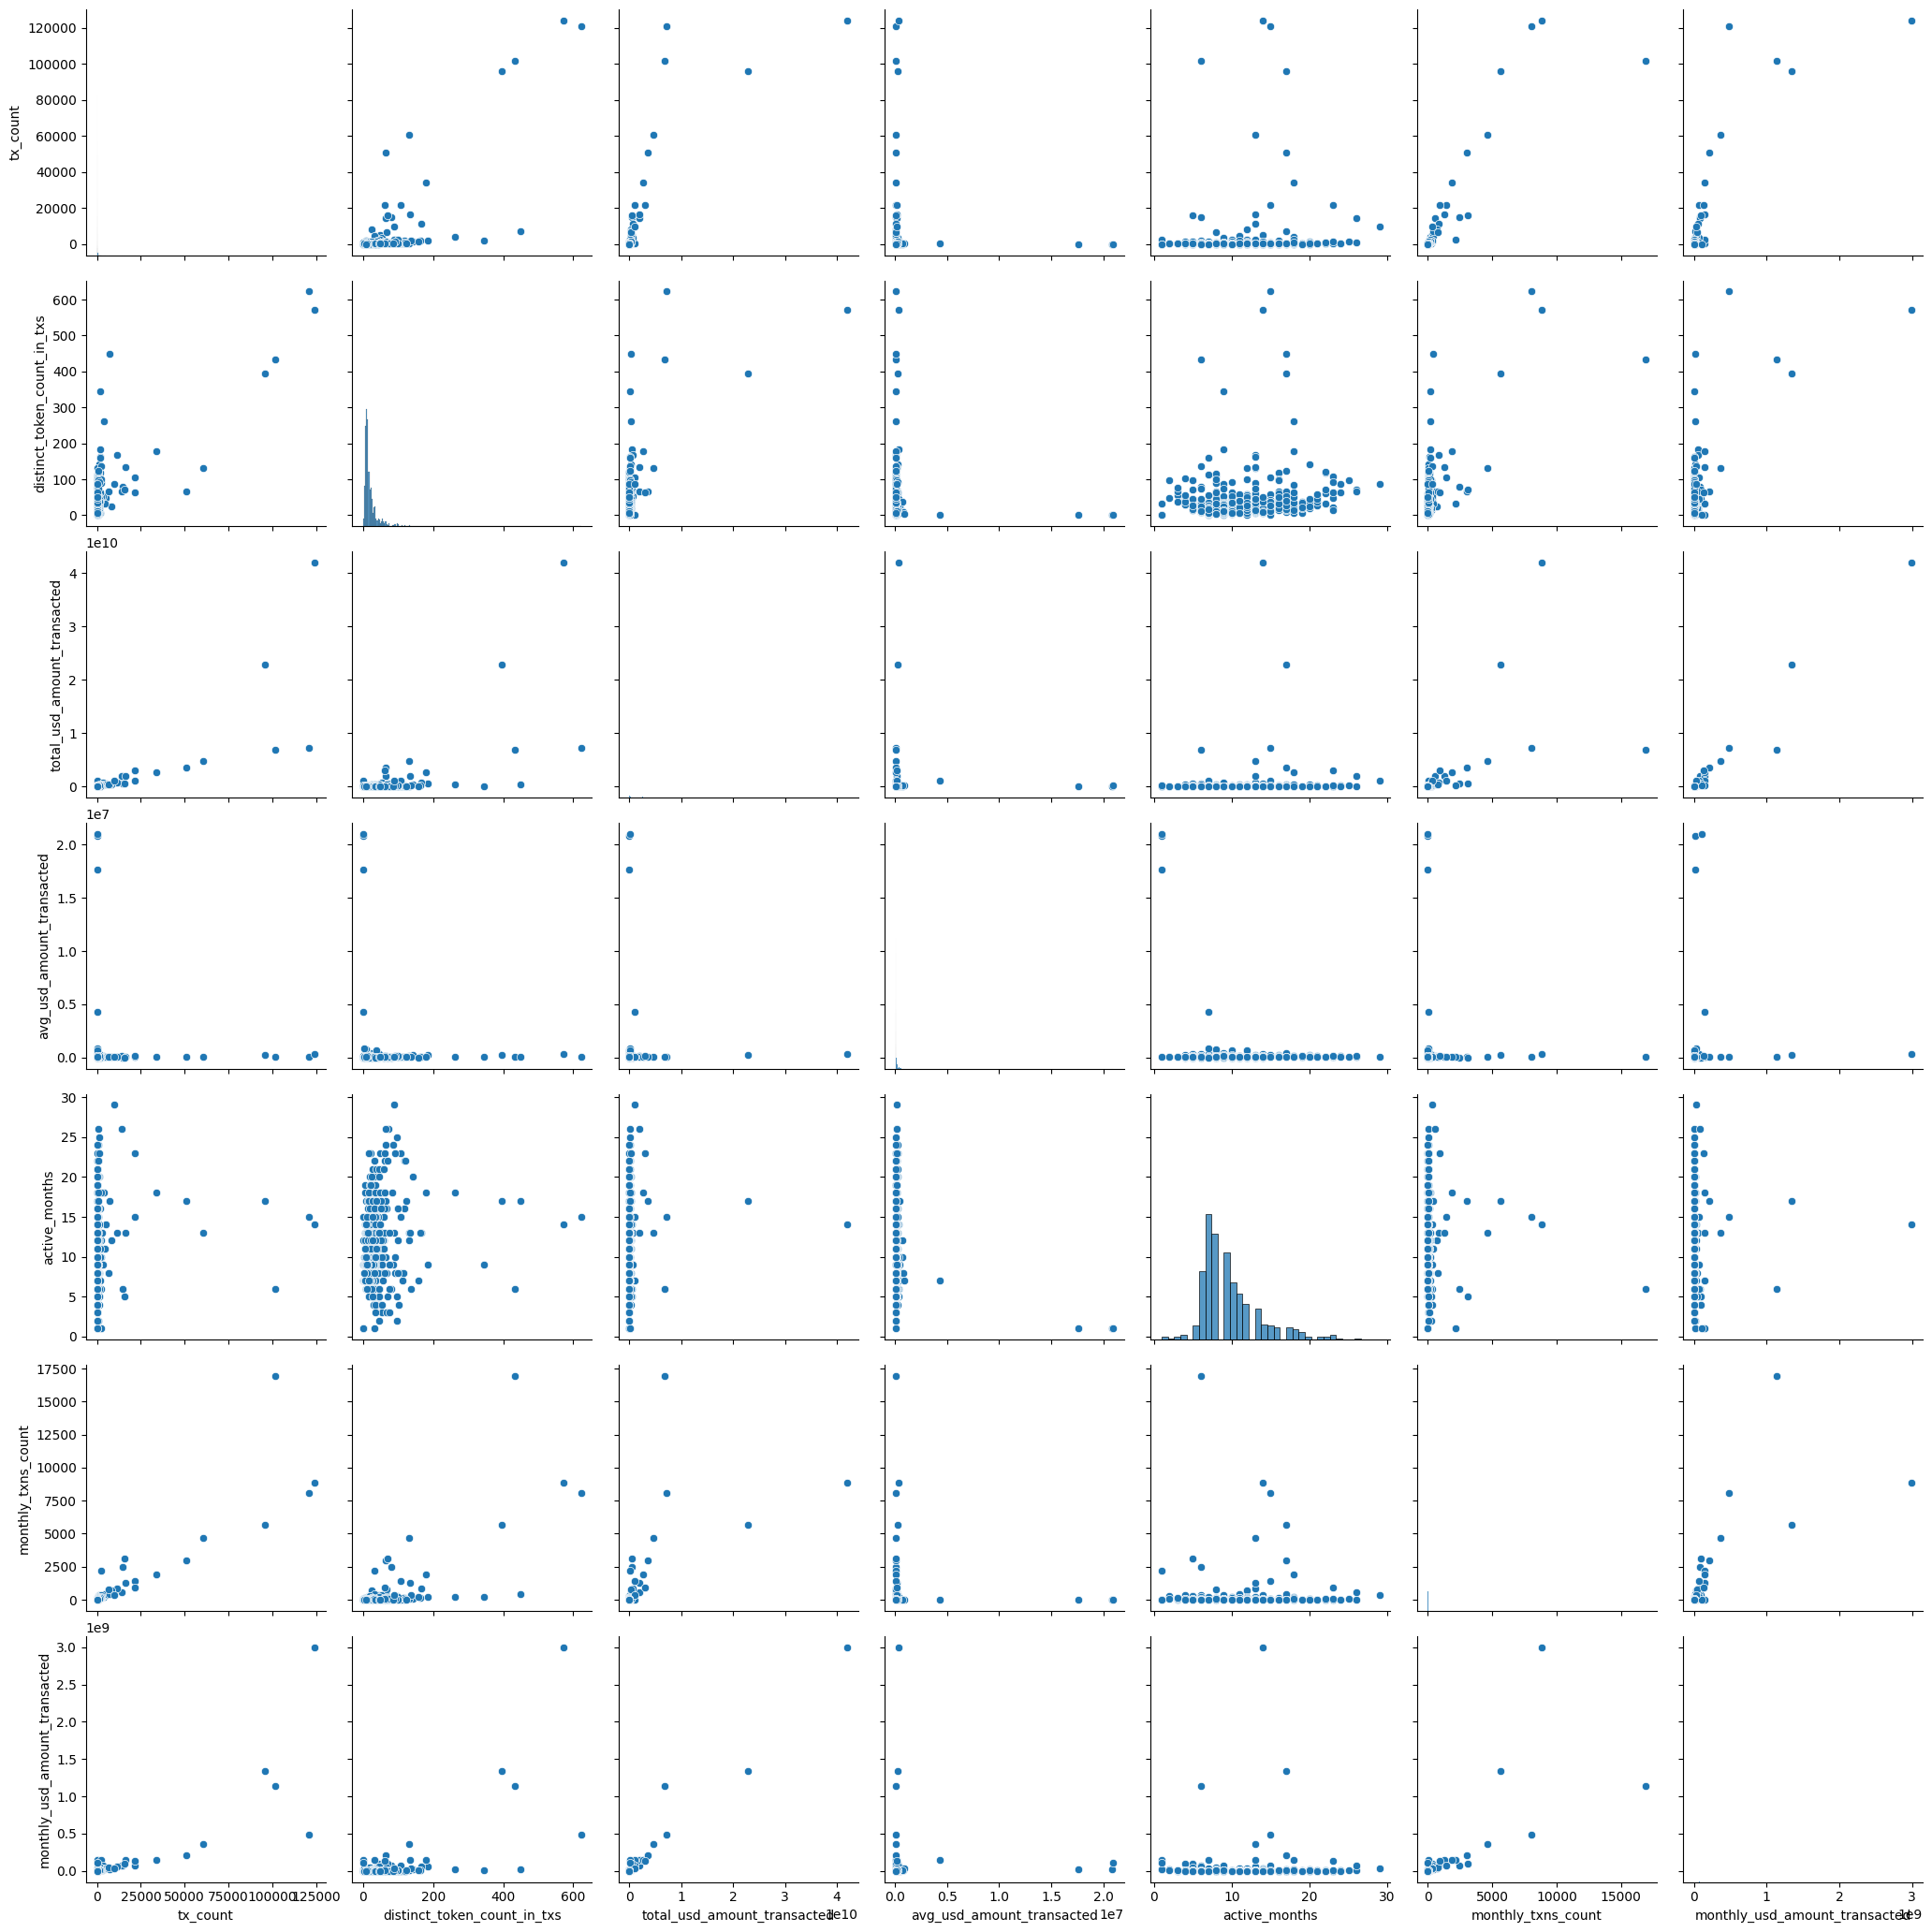

In [46]:
sns.pairplot(sample, size=3)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


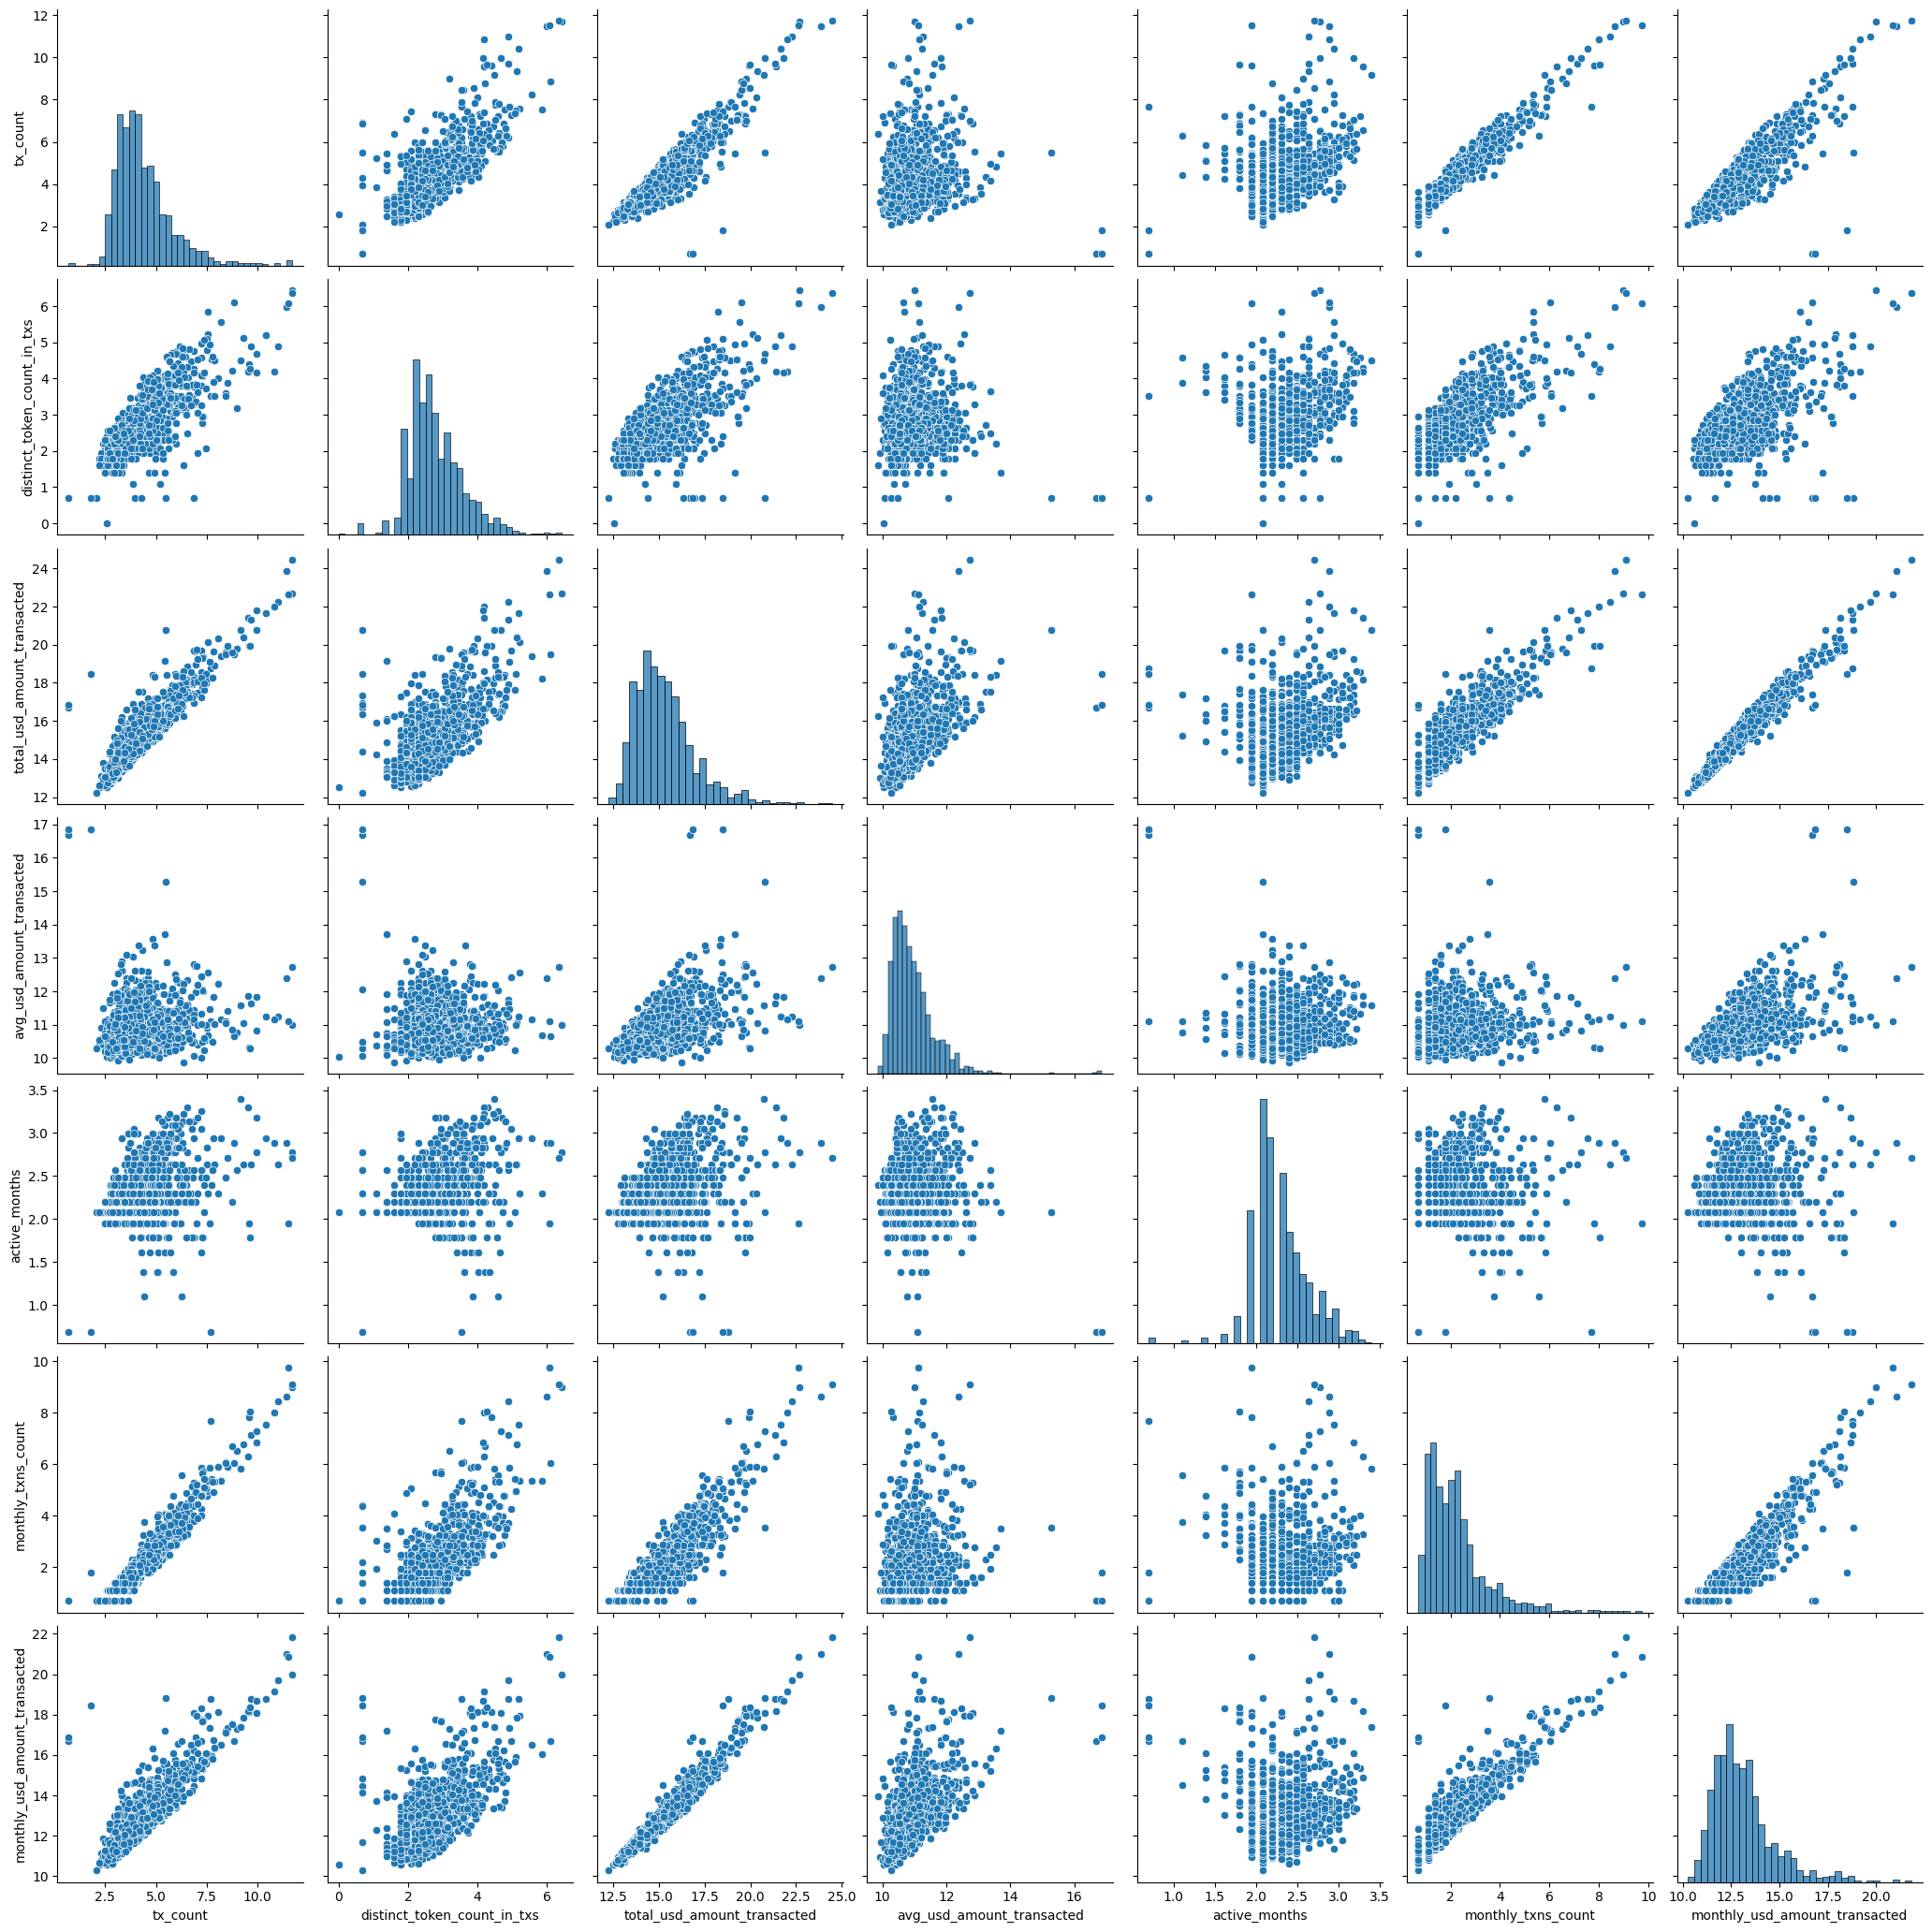

In [47]:
sns.pairplot(sample_num_log, size=3)

###Correlation (linear relationship between variables)

<ipython-input-48-35c5d440ce43>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


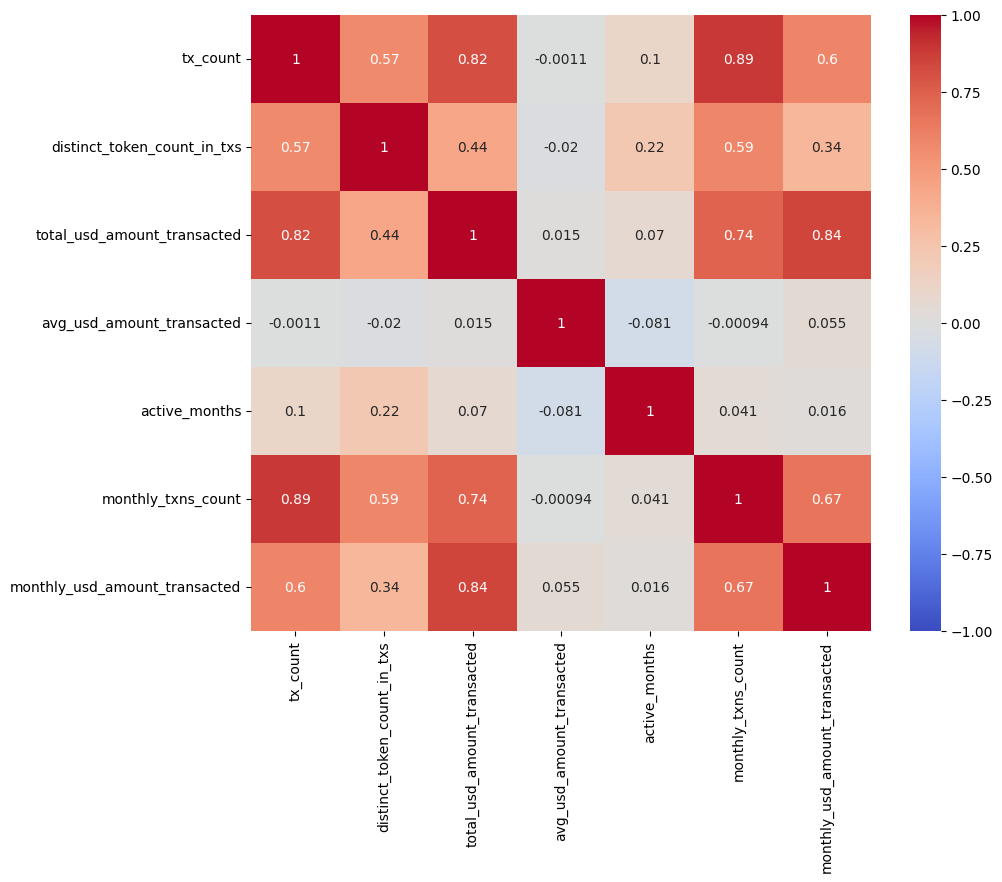

In [48]:
#heatmaps
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()


Insights on linear relationship:
* As expected we have high correlation between features and their monthly breakdowns such as (tx_count, monthly_txns_count), (total_usd_amount, monthly usd_amount)
* low correlation between average usd amount and the other features which shows that we should use this in our analysis.
* also interesting that we have a quite linear relationship between total usd amount and tx count suggesting that the higher the toal usd amount the more transaction is executed. this does not to be straightforward as there are different trader types that could act differently. it suggests that most traders fall into a type that transacts a lot and with each transaction we do not have very high transactions values


###Anomaly detection

####Mathematically

In [49]:
# 1. Select only numerical columns. Assuming 'tx_from' is the categorical column you were referring to.
numerical_df = df.drop(columns=['tx_from'])

# 2. Calculate Q1, Q3, IQR, lower_bound, and upper_bound for numerical columns.
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Get a boolean dataframe indicating where the outliers are.
outliers_mask = (numerical_df < lower_bound) | (numerical_df > upper_bound)

# 4. Create mask to get rows with any outliers
outliers_rows_mask = outliers_mask.any(axis=1)

# Extracting dataframe with rows containing at least one outlier
df_outliers = df[outliers_rows_mask].copy()

# Extracting dataframe with rows without any outliers
df_no_outliers = df[~outliers_rows_mask].copy()

In [50]:
df_no_outliers.describe()

tx_count  distinct_token_count_in_txs  total_usd_amount_transacted  \
count  17834.00                     17834.00                     17834.00   
mean      55.01                        13.11                   2958987.46   
std       42.11                         6.98                   2875289.52   
min        7.00                         0.00                    173833.44   
25%       25.00                         8.00                   1078175.50   
50%       42.00                        11.00                   1986034.09   
75%       70.00                        16.00                   3734222.34   
max      270.00                        39.00                  19751527.45   

       avg_usd_amount_transacted  active_months  monthly_txns_count  \
count                   17834.00       17834.00            17834.00   
mean                    52321.09           8.75                5.82   
std                     25725.93           2.55                4.36   
min                     19074.51           3.00                1.00   
25%                     33564.74           7.00                3.00   
50%                     44006.64           8.00                4.00   
75%                     63274.32          10.00                7.00   
max                    145667.73          17.00               25.00   

       monthly_usd_amount_transacted  
count                       17834.00  
mean                       330292.74  
std                        289810.06  
min                         21729.18  
25%                        135340.27  
50%                        235261.00  
75%                        421251.91  
max                       1961907.42

####Visually

with mathematically defined outliers

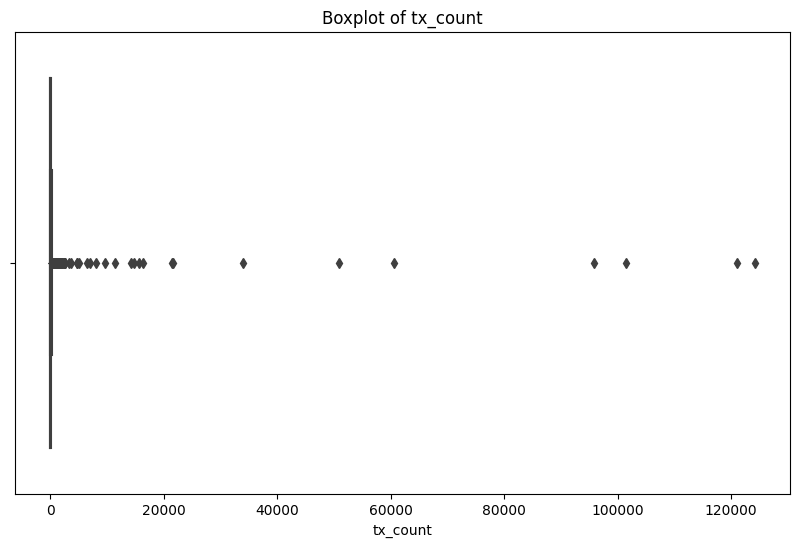

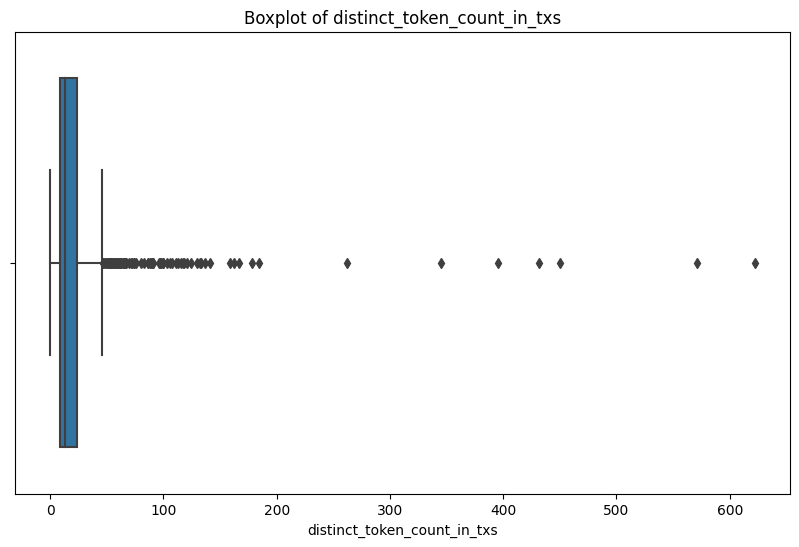

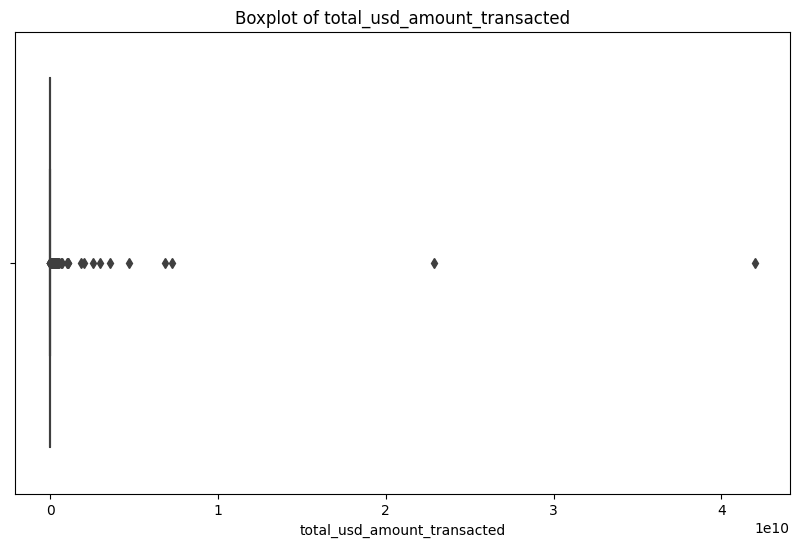

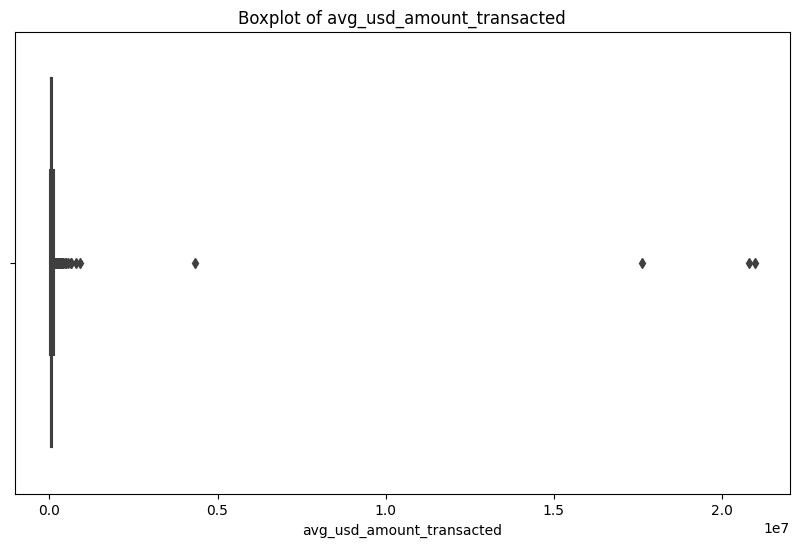

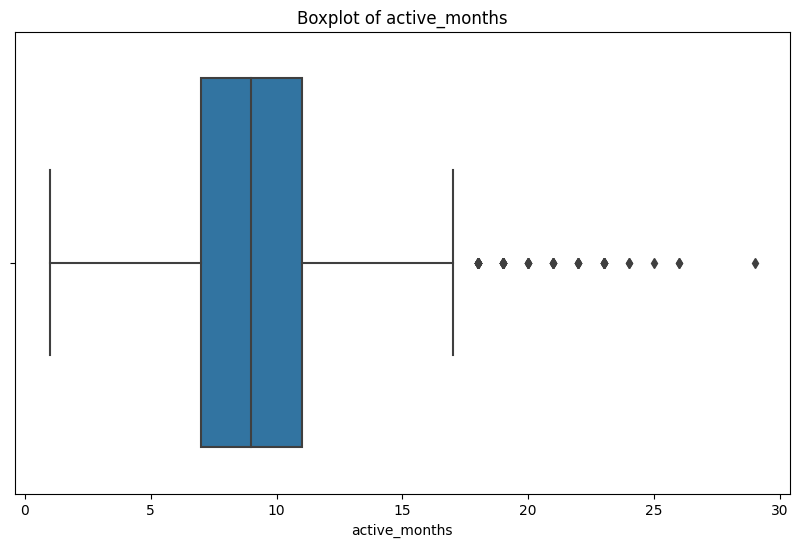

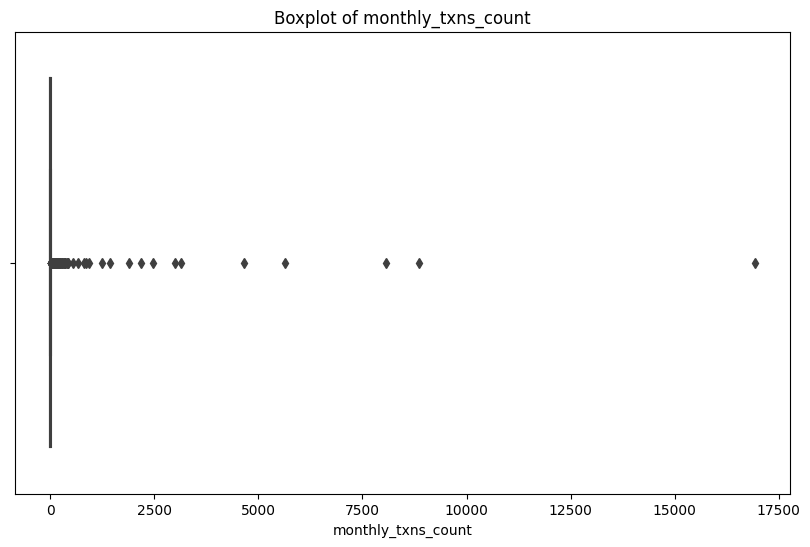

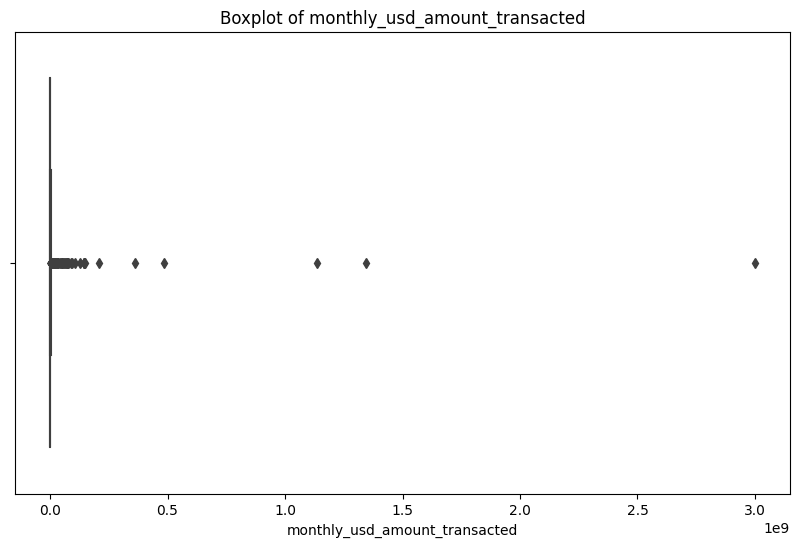

In [51]:
for feature in sample_num.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=sample_num[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


without mathematically defined outliers

In [52]:
#sample from df without outliers above
sample = df_no_outliers.sample(n=1000)
sample_num = sample.select_dtypes(exclude="object")

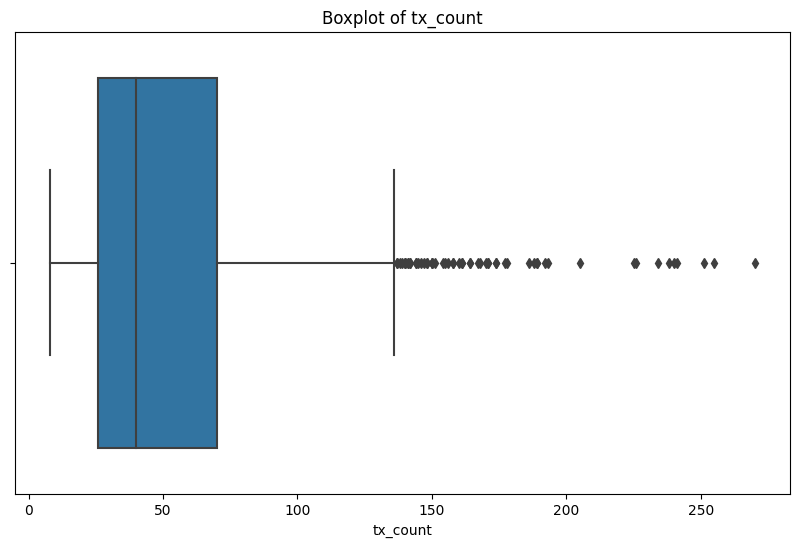

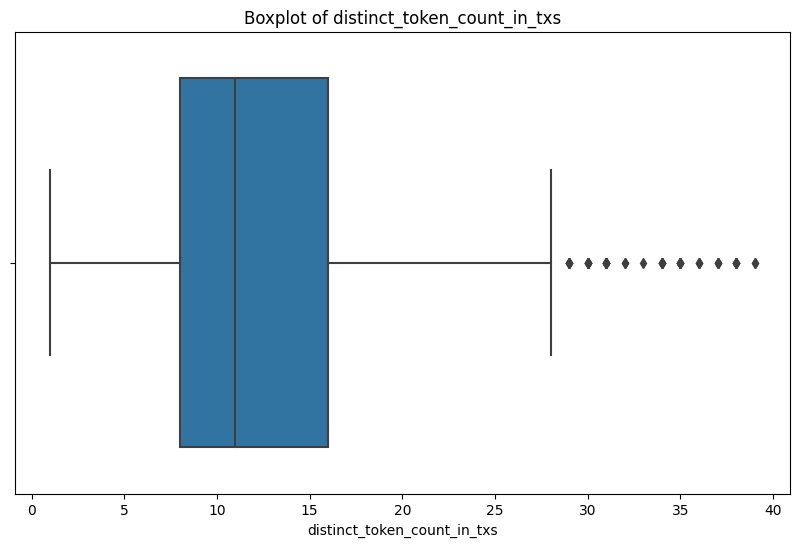

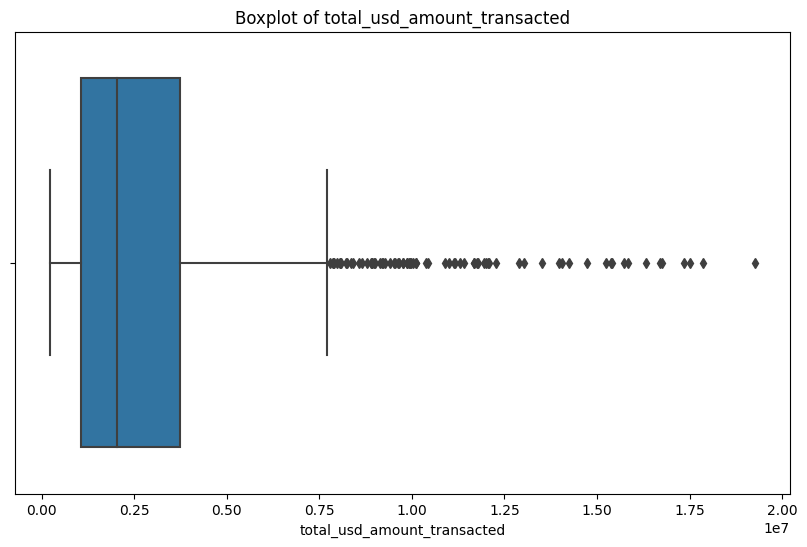

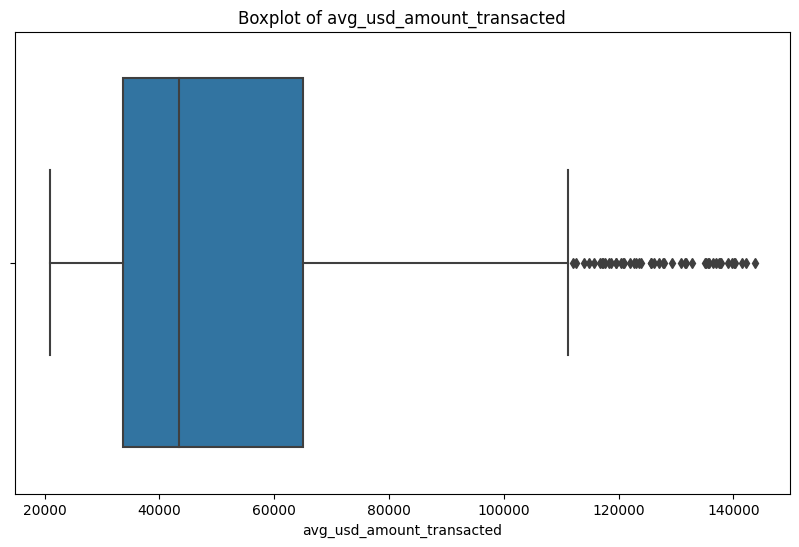

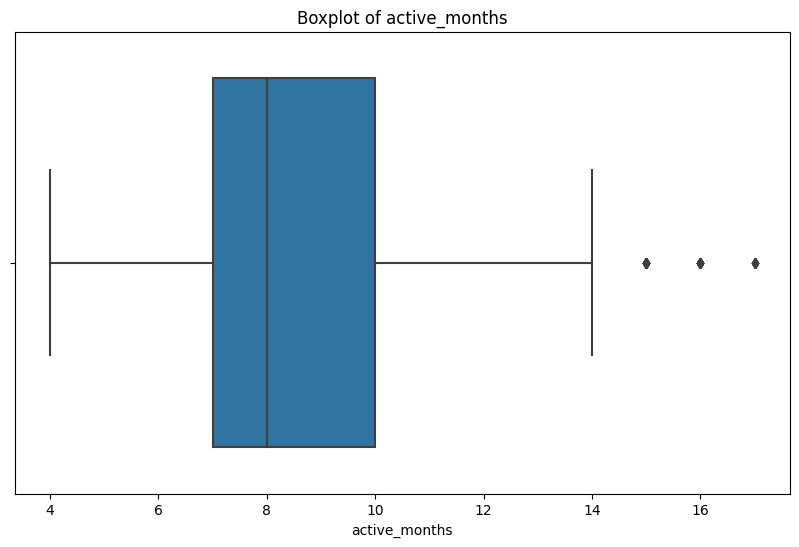

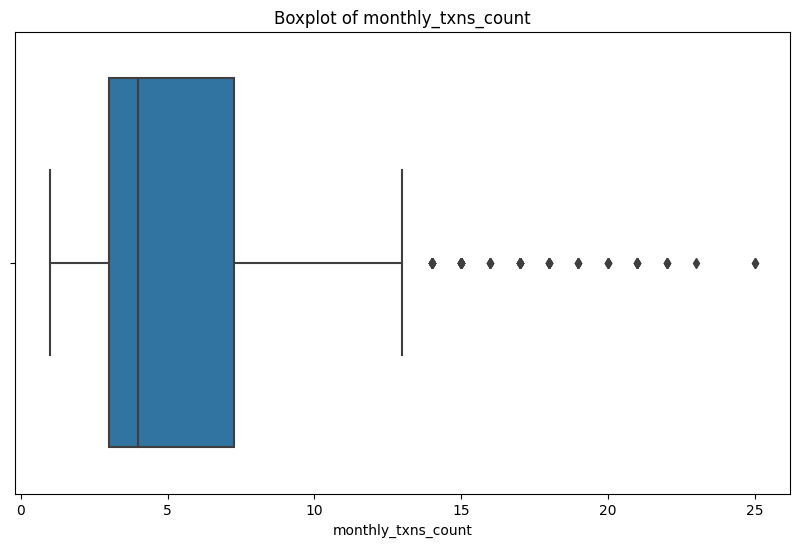

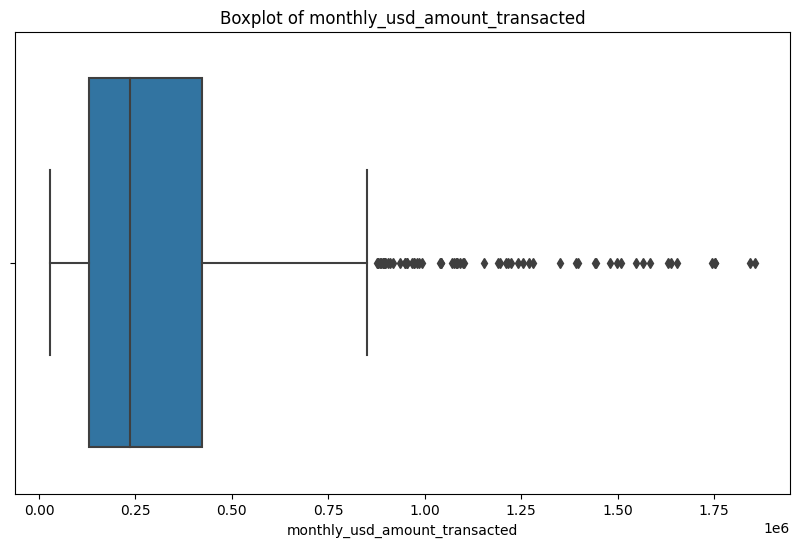

In [53]:
#boxplot and or scatterplots
for feature in sample_num.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=sample_num[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()





#maybe also looking into anomaly detection algorithms (after deadline, won't be part of initial presentation)

### **Insights from EDA**
There are several paths to pursue from here:

* Baseline model: Build a basic clustering model (k-means) and visualizations (t-sne, Umap). My hypothesis is that it does not yield much insights besides the noise we encounter when including different protocols. I expect sightly less noise though.This baseline model contains outliers as defined above.

* Rerun the models on the log data, as it could help the linear clusterin algorithms and pca to better seperate data

* Create a new notebook and focus on the outliers, some might be outliers, others I would like to include. Re run modelling.

* Create a new notebook (first with outliers, then without outliers) that segments the dataframe based on quantiles. Include the eda with pairplots segmented on different combinations of average transaction value and total transaction value. Also, bear in mind if you would discard the 25th quantile of the whole data set, if there is too much noise for very low traders to get some insights.  

**always keep track on insights, the goal ultimately is to create a story on our presentation, not to find the perfect method to go through the case - that would be analysis paralysis! if you are up to something, dwelve into it!"**

##To Do before Modelling to speed up the data loading process -> in case modelling breaks down to computational problems


reload the next cell for modelling purposes

In [54]:

# Exclude the 'tx_from' column for clustering
X = df.drop('tx_from', axis=1)

X.head()

tx_count  distinct_token_count_in_txs  total_usd_amount_transacted  \
1 544010.00                         1114               93413356007.42   
2 225383.00                          385               82797756346.90   
3 282253.00                          871               75558529891.35   
4 320112.00                          530               67199860810.47   
5  67556.00                           78               64551757781.87   

   avg_usd_amount_transacted  active_months  monthly_txns_count  \
1                  171712.57             19               28632   
2                  367364.69             16               14086   
3                  267697.88             19               14855   
4                  209926.09             16               20007   
5                  955529.60              8                8444   

   monthly_usd_amount_transacted  
1                  4916492421.44  
2                  5174859771.68  
3                  3976764731.12  
4                  4199991300.65  
5                  8068969722.73

In [55]:
X.shape

(24130, 7)

#Modelling on original whole data set

##K-Mediods


In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [60]:
!pip install scikit-learn-extra


In [61]:
from sklearn_extra.cluster import KMedoids

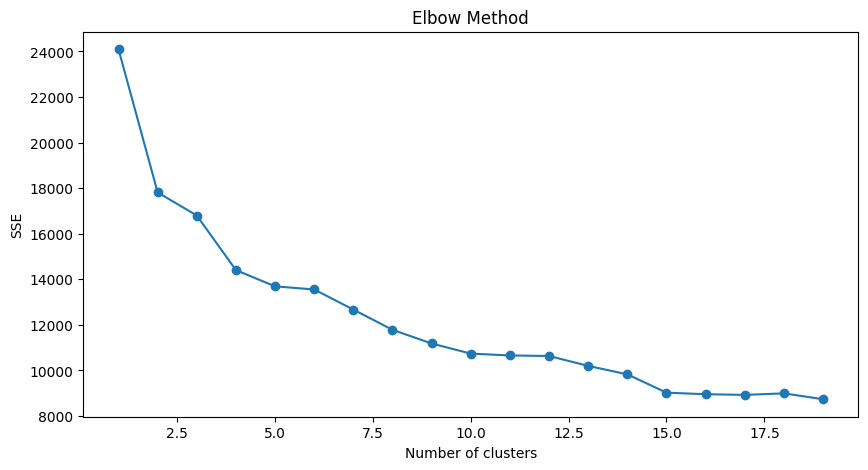

In [63]:


r_seed = 23 # random seed to use during modeling for reproducability purposes


# List to hold the SSE for each number of clusters
sse = []
# List to hold the silhouette score for each number of clusters
silhouette = []

# Iterate over possible number of clusters
for k in range(1, 20):
    # Set the number of clusters
    n_clusters = k
    kmeans_pipeline = Pipeline([("scaler", StandardScaler()),("cluster", KMedoids(n_clusters = n_clusters, random_state = r_seed))])
    # Fit the data
    kmeans_pipeline.fit(X)
    cluster_labels = kmeans_pipeline.predict(X)
    # Append the SSE for k clusters to sse list
    sse.append(kmeans_pipeline.named_steps["cluster"].inertia_)
    # Append the silhouette score for k clusters to silhouette list
    #silhouette.append(silhouette_score(X, cluster_labels)) #ignore silhouette score for now as its too computationally expensive for the large data set

# Plot the SSE for each number of clusters
plt.figure(figsize=(10, 5))
plt.plot(range(1, 20), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

# Plot the silhouette score for each number of clusters
#plt.figure(figsize=(10, 5))
#plt.plot(range(1, 15), silhouette, marker='o')
#plt.xlabel('Number of clusters')
#plt.ylabel('Silhouette Score')
#plt.title('Silhouette Method')
#plt.show()


After cluster 12, the descend is less steep. Lets select 12 clusters

In [78]:
#cluster my data
kmeans_pipeline = Pipeline([("scaler", StandardScaler()),("cluster", KMedoids(n_clusters = 3, random_state = 42))]) # change this first
# Fit the data
kmeans_pipeline.fit(X)
cluster_labels = kmeans_pipeline.predict(X)

df["cluster_labels"] = cluster_labels
df_sorted_desc =df.sort_values(by="total_usd_amount_transacted", ascending = False)
df_sorted_desc.head()

tx_from  tx_count  \
1  0x26ce7c1976c5eec83ea6ac22d83cb341b08850af 544010.00   
2  0x7aa0426f10c7603bbfb8ceb8afb8d8c329ccfe8b 225383.00   
3  0xa6ae57b1da8238cd149bc718c40578e4620b752c 282253.00   
4  0x52b86a86e4d764e8275391c436127e60340a0e6a 320112.00   
5  0x83b294466fe88cf8d4e73fd69b36e904d5db9133  67556.00   

   distinct_token_count_in_txs  total_usd_amount_transacted  \
1                         1114               93413356007.42   
2                          385               82797756346.90   
3                          871               75558529891.35   
4                          530               67199860810.47   
5                           78               64551757781.87   

   avg_usd_amount_transacted  active_months  monthly_txns_count  \
1                  171712.57             19               28632   
2                  367364.69             16               14086   
3                  267697.88             19               14855   
4                  209926.09             16               20007   
5                  955529.60              8                8444   

   monthly_usd_amount_transacted  cluster_labels  
1                  4916492421.44               2  
2                  5174859771.68               2  
3                  3976764731.12               2  
4                  4199991300.65               2  
5                  8068969722.73               2

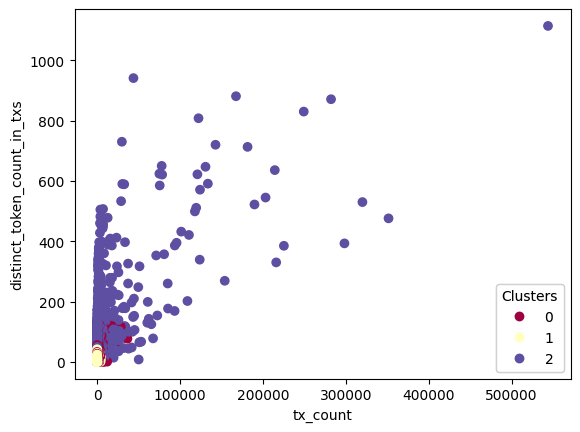

In [79]:
# Create the scatter plot
scatter = plt.scatter(
    df_sorted_desc.iloc[:, 1],
    df_sorted_desc.iloc[:, 2],
    c=df_sorted_desc['cluster_labels'],
    cmap=plt.cm.Spectral
)

# Create the legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

# Set the x-label and display the plot
plt.xlabel(df_sorted_desc.iloc[:, 1].name)
plt.ylabel(df_sorted_desc.iloc[:, 2].name)
plt.show()


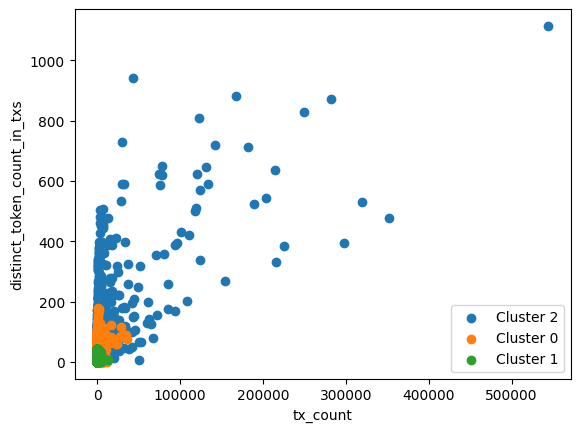

In [80]:
unique_labels = df_sorted_desc['cluster_labels'].unique()

# Plot each cluster with a unique color and label
for label in unique_labels:
    # Filter data for the current cluster label
    cluster_data = df_sorted_desc[df_sorted_desc['cluster_labels'] == label]

    # Plot the data for the current cluster
    plt.scatter(cluster_data.iloc[:, 1], cluster_data.iloc[:, 2], label=f'Cluster {label}')

# Display the legend
plt.legend()
plt.xlabel(f"{cluster_data.iloc[:, 1].name}")
plt.ylabel(f"{cluster_data.iloc[:, 2].name}")
# Show the plot
plt.show()

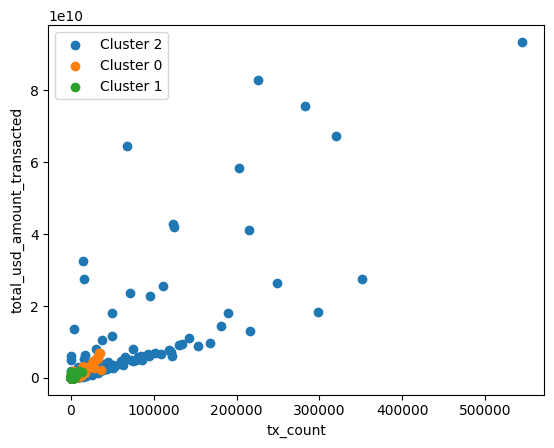

In [81]:
unique_labels = df_sorted_desc['cluster_labels'].unique()

# Plot each cluster with a unique color and label
for label in unique_labels:
    # Filter data for the current cluster label
    cluster_data = df_sorted_desc[df_sorted_desc['cluster_labels'] == label]

    # Plot the data for the current cluster
    plt.scatter(cluster_data.iloc[:, 1], cluster_data.iloc[:, 3], label=f'Cluster {label}')

# Display the legend
plt.legend()
plt.xlabel(f"{cluster_data.iloc[:, 1].name}")
plt.ylabel(f"{cluster_data.iloc[:, 3].name}")
# Show the plot
plt.show()

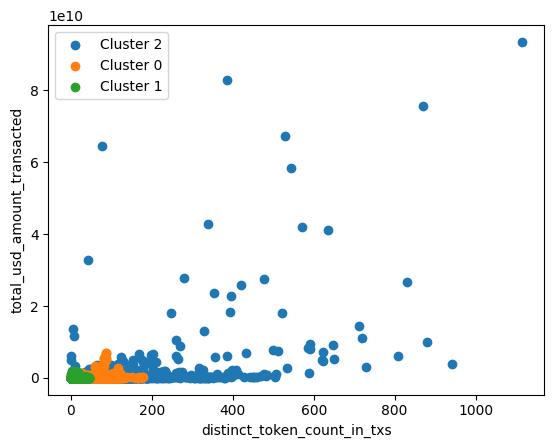

In [82]:
unique_labels = df_sorted_desc['cluster_labels'].unique()

# Plot each cluster with a unique color and label
for label in unique_labels:
    # Filter data for the current cluster label
    cluster_data = df_sorted_desc[df_sorted_desc['cluster_labels'] == label]

    # Plot the data for the current cluster
    plt.scatter(cluster_data.iloc[:, 2], cluster_data.iloc[:, 3], label=f'Cluster {label}')

# Display the legend
plt.legend()
plt.xlabel(f"{cluster_data.iloc[:, 2].name}")
plt.ylabel(f"{cluster_data.iloc[:, 3].name}")
# Show the plot
plt.show()

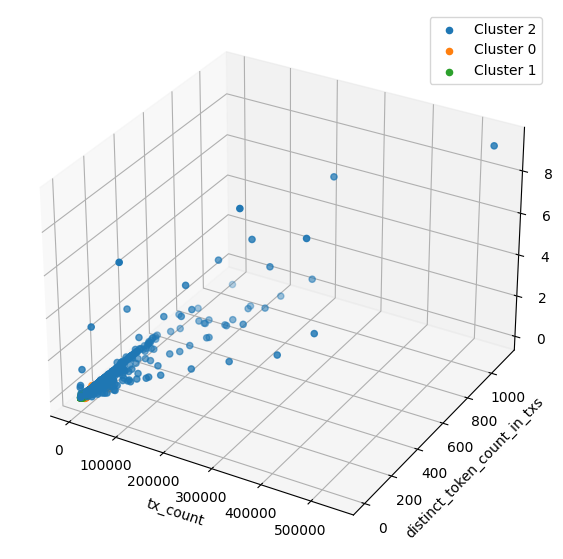

In [83]:
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure
fig = plt.figure(figsize=(10, 7))

# Add 3D subplot -> create an axis object that maps the plot-> more powerful
ax = fig.add_subplot(111, projection='3d')

for label in unique_labels:
  cluster_data = df_sorted_desc[df_sorted_desc["cluster_labels"] == label]
  ax.scatter(cluster_data.iloc[:, 1], cluster_data.iloc[:, 2],cluster_data.iloc[:, 3] , label=f'Cluster {label}')

ax.legend()
ax.set_xlabel(f"{cluster_data.iloc[:, 1].name}")
ax.set_ylabel(f"{cluster_data.iloc[:, 2].name}")
ax.set_zlabel(f"{cluster_data.iloc[:, 3].name}")

plt.show()


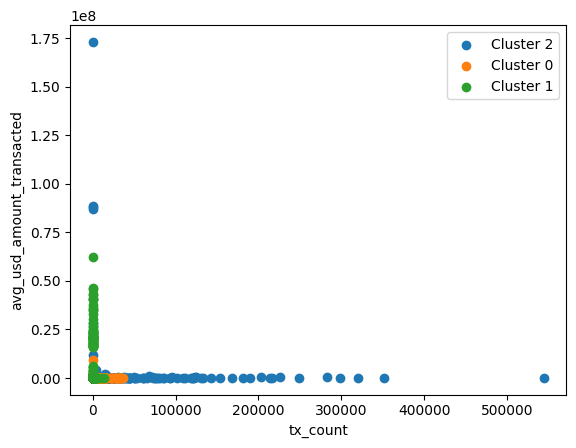

In [84]:
unique_labels = df_sorted_desc['cluster_labels'].unique()

# Plot each cluster with a unique color and label
for label in unique_labels:
    # Filter data for the current cluster label
    cluster_data = df_sorted_desc[df_sorted_desc['cluster_labels'] == label]

    # Plot the data for the current cluster
    plt.scatter(cluster_data.iloc[:, 1], cluster_data.iloc[:, 4], label=f'Cluster {label}')

# Display the legend
plt.legend()
plt.xlabel(f"{cluster_data.iloc[:, 1].name}")
plt.ylabel(f"{cluster_data.iloc[:, 4].name}")
# Show the plot
plt.show()

##Big insights on how to divide up the dataset in the end

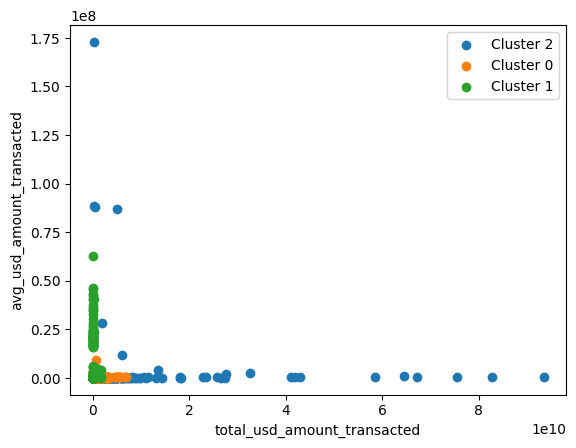

In [95]:
unique_labels = df_sorted_desc['cluster_labels'].unique()

# Plot each cluster with a unique color and label
for label in unique_labels:
    # Filter data for the current cluster label
    cluster_data = df_sorted_desc[df_sorted_desc['cluster_labels'] == label]

    # Plot the data for the current cluster
    plt.scatter(cluster_data.iloc[:, 3], cluster_data.iloc[:, 4], label=f'Cluster {label}')

# Display the legend
plt.legend()
plt.xlabel(f"{cluster_data.iloc[:, 3].name}")
plt.ylabel(f"{cluster_data.iloc[:, 4].name}")
# Show the plot
plt.show()

In [96]:
df_sorted_desc.groupby('cluster_labels').size().sort_values( ascending = False)

cluster_labels
1    14502
0     8335
2     1293
dtype: int64

In [97]:
df_sorted_desc.describe()

tx_count  distinct_token_count_in_txs  total_usd_amount_transacted  \
count  24130.00                     24130.00                     24130.00   
mean     602.93                        21.81                  77058513.52   
std     7704.31                        38.09                1408760615.08   
min        1.00                         0.00                    173833.44   
25%       29.00                         9.00                   1356519.85   
50%       54.00                        13.00                   2999216.90   
75%      126.00                        21.00                   8744061.70   
max   544010.00                      1114.00               93413356007.42   

       avg_usd_amount_transacted  active_months  monthly_txns_count  \
count                   24130.00       24130.00            24130.00   
mean                   155862.03           9.47               53.41   
std                   1997147.47           3.83              586.97   
min                     19020.68           1.00                1.00   
25%                     35417.43           7.00                3.00   
50%                     49336.70           8.00                6.00   
75%                     79541.69          11.00               12.00   
max                 172967261.45          32.00            29036.00   

       monthly_usd_amount_transacted  cluster_labels  
count                       24130.00        24130.00  
mean                      7261727.29            0.71  
std                     133162516.09            0.56  
min                         21729.18            0.00  
25%                        165966.39            0.00  
50%                        337970.46            1.00  
75%                        884789.71            1.00  
max                   10873527847.09            2.00

In [98]:
df_sorted_desc[df_sorted_desc["cluster_labels"] == 0].describe()

tx_count  distinct_token_count_in_txs  total_usd_amount_transacted  \
count   8335.00                      8335.00                      8335.00   
mean     376.30                        23.27                  42056228.74   
std     1824.80                        17.63                 281351615.67   
min       10.00                         1.00                    339879.59   
25%       53.00                        12.00                   2723684.20   
50%       96.00                        19.00                   5899293.03   
75%      196.00                        29.00                  15103104.72   
max    36563.00                       178.00                6884703948.35   

       avg_usd_amount_transacted  active_months  monthly_txns_count  \
count                    8335.00        8335.00             8335.00   
mean                    82410.39          13.40               21.97   
std                    133856.38           3.60               80.83   
min                     19484.51          10.00                1.00   
25%                     39633.30          11.00                4.00   
50%                     56510.23          12.00                7.00   
75%                     90204.03          15.00               14.00   
max                   8992386.12          32.00             1741.00   

       monthly_usd_amount_transacted  cluster_labels  
count                        8335.00         8335.00  
mean                      2253710.85            0.00  
std                      11202794.72            0.00  
min                         33987.96            0.00  
25%                        228824.17            0.00  
50%                        452247.09            0.00  
75%                       1102140.97            0.00  
max                     236207048.46            0.00

In [99]:
df_sorted_desc[df_sorted_desc["cluster_labels"] == 1].describe()

tx_count  distinct_token_count_in_txs  total_usd_amount_transacted  \
count  14502.00                     14502.00                     14502.00   
mean      77.16                        12.14                   6706600.11   
std      237.37                         6.88                  36245483.27   
min        1.00                         0.00                    173833.44   
25%       23.00                         8.00                    978652.42   
50%       37.00                        11.00                   1849239.75   
75%       64.00                        15.00                   4001836.15   
max    13631.00                        44.00                1819035059.36   

       avg_usd_amount_transacted  active_months  monthly_txns_count  \
count                   14502.00       14502.00            14502.00   
mean                   169208.90           7.29               10.73   
std                   1704916.54           1.19               33.46   
min                     19020.68           1.00                1.00   
25%                     33224.11           7.00                3.00   
50%                     44635.89           7.00                5.00   
75%                     70071.86           8.00                8.00   
max                  62453261.94           9.00             1514.00   

       monthly_usd_amount_transacted  cluster_labels  
count                       14502.00        14502.00  
mean                      1118276.41            1.00  
std                       6380366.55            0.00  
min                         21729.18            1.00  
25%                        135161.86            1.00  
50%                        252546.10            1.00  
75%                        556946.04            1.00  
max                     323122939.35            1.00

cluster 1 strongly skewed towards total usd amount than 4 and 0, but just slightly higher on the avg median

In [100]:
df_sorted_desc[df_sorted_desc["cluster_labels"] == 2].describe()

tx_count  distinct_token_count_in_txs  total_usd_amount_transacted  \
count   1293.00                      1293.00                      1293.00   
mean    7960.77                       120.92                1091743348.79   
std    32074.88                       116.91                5953546214.64   
min        1.00                         0.00                   1847409.03   
25%      403.00                        53.00                  23136545.78   
50%      956.00                        83.00                  77523587.01   
75%     3361.00                       135.00                 327312779.31   
max   544010.00                      1114.00               93413356007.42   

       avg_usd_amount_transacted  active_months  monthly_txns_count  \
count                    1293.00        1293.00             1293.00   
mean                   479654.16           8.63              734.69   
std                   6450442.35           4.44             2426.59   
min                     19218.26           1.00                1.00   
25%                     43965.70           5.00               54.00   
50%                     66922.46           8.00              152.00   
75%                    126112.97          11.00              391.00   
max                 172967261.45          31.00            29036.00   

       monthly_usd_amount_transacted  cluster_labels  
count                        1293.00         1293.00  
mean                    108448225.16            2.00  
std                     564857245.07            0.00  
min                        205267.67            2.00  
25%                       3256458.89            2.00  
50%                       9667088.06            2.00  
75%                      63788132.68            2.00  
max                   10873527847.09            2.00

cluster 2 more on the total than 4 and zero, less than 1 ofc. Avg amount beats everything!

**Insights from k means and focusing on the two features of interest: avg and total**:

* Cluster 2 is the Avg amount king!

* cluster 3 would be an outlier. That we could still have a look into on etherscan

* cluster 1 is the king of the total amount

* cluster 0 and 4 are closer together, but cluster 0 is a more conservative form of the whole data set that eventually didnt lead to nice visualization.

* Cluster 4 is a more conservative version of a dataframe made up of clusters 2,1 and 4. Cluster 0 is its own dataframe

* the bulk of the data 250K rows lies in cluster 0. However, cluster 4 still make up 25K rows, also we can supplement cluster 4 with cluster 0 as cluster 0 is a more conservative form of the overall dataset in case we need more insights.

* next steps: investigate if we see this pattern when we trimm the original dataframe of outliers and also log version with and without outliers

* if we see this pattern but less pronounced, focus on the dataframe of cluster 4, 2,1 -> splitting up the whole dataframe on k means is more "professional" than just splitting it on overall summary statistics

* the selection of 5 clusters is based upon the dbscan insight but also relative good k means sample results for majority of selection criteria


##PCA & K-means


###Clustering on Original Data, then Visualizing with UNSCALED PCA (code 1):



In [85]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

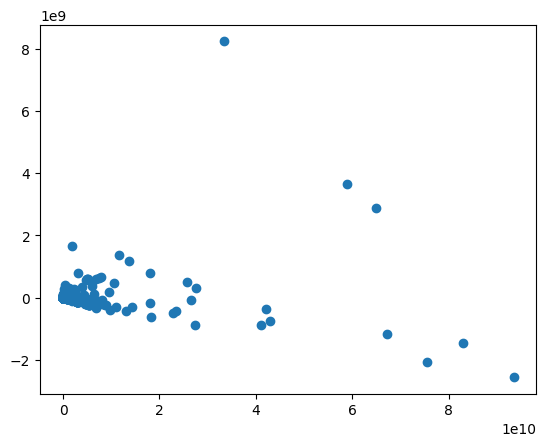

In [86]:
#we do pca with 2 principal components first for visualization

#without standard sclaer I get a different image
X_pca_unscaled = PCA(n_components =2).fit_transform(X)
plt.scatter(X_pca_unscaled[:,0], X_pca_unscaled[:,1])


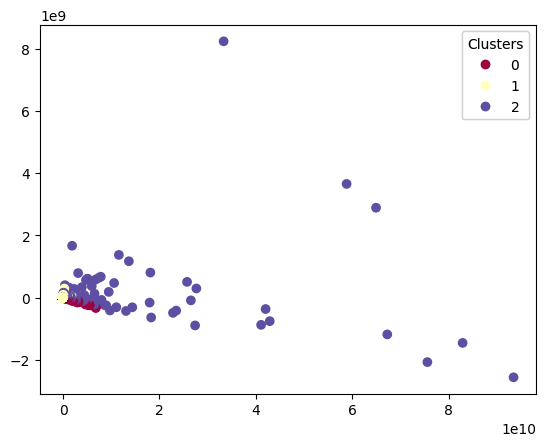

In [87]:
#color code the initial clusters above to check if result is same as below
# Create the scatter plot
scatter = plt.scatter(
    X_pca_unscaled[:,0],
    X_pca_unscaled[:,1],
    c=df_sorted_desc['cluster_labels'],
    cmap=plt.cm.Spectral
)

# Create the legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

# Set the x-label and display the plot

plt.show()

This method gives you a visualization of high-dimensional clusters in a PCA space derived from the unscaled data.

If this visualization looks similar to when you simply use the first two columns of the dataset, it suggests that the majority of the variance in your data might be captured by these two columns. In other words, these two features heavily influence the PCA transformation when the data isn't scaled.

###Clustering on Original Data, then Visualizing with SCALED PCA (code 1):

primarily interested in clustering the data based on its original features (in the high-dimensional space) but want a 2D visualization to understand the cluster separations and distributions.


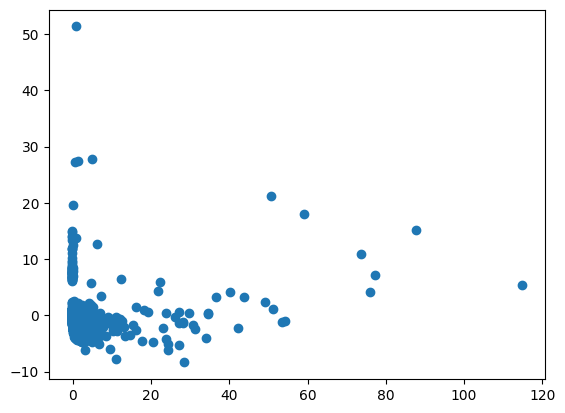

In [88]:
pipeline_pca = Pipeline([("scaler", StandardScaler()),("pca", PCA(n_components = 2))])

X_pca_scaled = pipeline_pca.fit_transform(X)

plt.scatter(X_pca_scaled[:,0],X_pca_scaled[:,1])

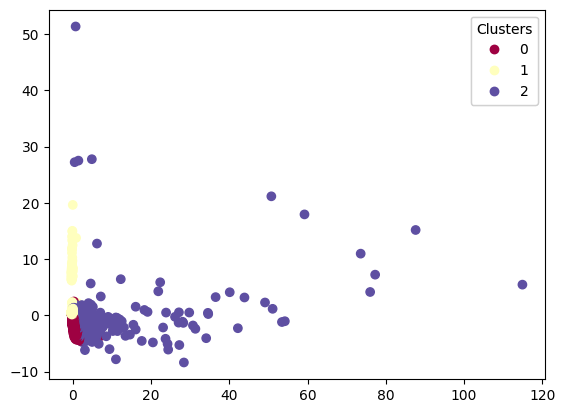

In [89]:
#color code the initial clusters above to check if result is same as below
# Create the scatter plot
scatter = plt.scatter(
    X_pca_scaled[:,0],
    X_pca_scaled[:,1],
    c=df_sorted_desc['cluster_labels'],
    cmap=plt.cm.Spectral
)

# Create the legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

# Set the x-label and display the plot

plt.show()



Advantages: The clustering captures the nuances of the high-dimensional data.

Disadvantages: The 2D PCA representation might not always reflect the true separations of the clusters formed in the high-dimensional space. Clusters that look overlapped or mixed in the PCA plot might be well-separated in the original space.

The blurred visualization indicates that clusters formed in the high-dimensional space might not be well-separated in the 2D PCA space. This can happen when clusters are defined by nuances in the high-dimensional space that the 2D PCA representation can't capture.

###Optimal Number of PCA components

In [116]:
from sklearn.decomposition import PCA
import numpy as np

pca_pipe = Pipeline([("sclaer", StandardScaler()),("pca", PCA())])

X_pca = pca_pipe.fit_transform(X)

cum_sum_explained_variance_ratio_pca = np.cumsum(pca_pipe.named_steps["pca"].explained_variance_ratio_)

cum_sum_explained_variance_ratio_pca

array([0.52270251, 0.6850007 , 0.81881153, 0.91581598, 0.96844102,
       0.99401715, 1.        ])

In [117]:
#index in the cumsum array (above) that explains more than 95% of variance, used
location_ncomp = np.argmax(cum_sum_explained_variance_ratio_pca > 0.95) #In case of multiple occurrences of the maximum values, the indices corresponding to the first occurrence are returned. First True value is the max value.
location_ncomp

4

In [118]:
cum_sum_explained_variance_ratio_pca[4]

0.9684410152355077

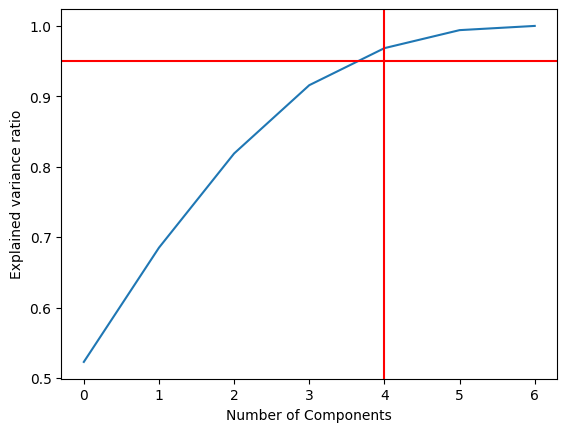

In [119]:
plt.plot(cum_sum_explained_variance_ratio_pca)
plt.xlabel("Number of Components")
plt.ylabel("Explained variance ratio")
plt.axvline(x=location_ncomp, color = "red")
plt.axhline(y=0.95, color = "red")

###Clustering on PCA-Transformed Data (code 2):

When computational efficiency is a concern or when you believe the main variance (captured by the first few principal components) is sufficient to define the clusters. It's also useful when you want the 2D visualization to closely match the clustering results.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


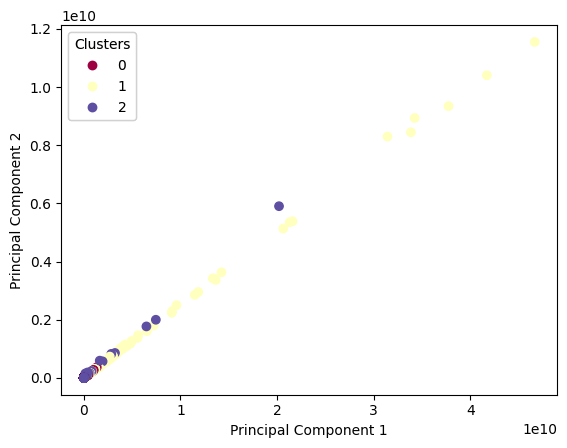

In [120]:
#Lets redo K-means for the whole dataset!
pipeline_pca_kmeans  = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components =4)),#learned below from the sample pca cumsum
     ("cluster", KMedoids(n_clusters=3))])

#the fit method for KMeans during the pipeline process automatically assigns cluster labels to the samples,
#which is why we can directly access the labels_ attribute without explicitly calling predict.

pipeline_pca_kmeans.fit(X)
X_pca = pipeline_pca_kmeans.named_steps["pca"].transform(X)  # Get the PCA-transformed data
cluster_labels = pipeline_pca_kmeans.named_steps["cluster"].labels_  # Get the cluster labels


scatter = plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=cluster_labels,
    cmap=plt.cm.Spectral
)

# Create the legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

# Set the x-label and display the plot
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()



Advantages: Faster than clustering in high-dimensional space. The 2D visualization directly represents how the clustering algorithm saw the data.

Disadvantages: You're clustering based on a reduced representation of the data, so some nuances from the original data might be lost.

This approach gives you a clearer visualization because you're clustering directly on the 2D PCA representation, ensuring that the clustering results align with the visualization.

The more discernible clusters in this visualization suggest that the primary patterns (captured by the top principal components) are sufficient to form distinct clusters.

IMHO: we would need more principal components to be able to seperate the clusters

#Modelling on samples of original Dataset due to computational inefficiency

In [90]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans


###Sampling

In [91]:
X_sample = X.sample(n=2500) #start with large sample (plus minus 10% of original dataset)

In [92]:
X_sample.describe()

tx_count  distinct_token_count_in_txs  total_usd_amount_transacted  \
count   2500.00                      2500.00                      2500.00   
mean     658.64                        21.63                  87116628.87   
std     7711.76                        42.92                1149842776.69   
min        1.00                         1.00                    221640.27   
25%       29.00                         9.00                   1333765.17   
50%       53.00                        13.00                   2847889.71   
75%      122.25                        21.00                   8034967.74   
max   249327.00                       941.00               32620583541.26   

       avg_usd_amount_transacted  active_months  monthly_txns_count  \
count                    2500.00        2500.00             2500.00   
mean                    87654.38           9.49               69.46   
std                    536245.63           3.72              839.74   
min                     20264.09           1.00                1.00   
25%                     35269.73           7.00                3.00   
50%                     48107.93           8.00                6.00   
75%                     77924.51          11.00               11.00   
max                  21000386.03          31.00            23733.00   

       monthly_usd_amount_transacted  
count                        2500.00  
mean                     11575930.54  
std                     233686010.64  
min                         31662.90  
25%                        159721.20  
50%                        327222.59  
75%                        801187.48  
max                   10873527847.09

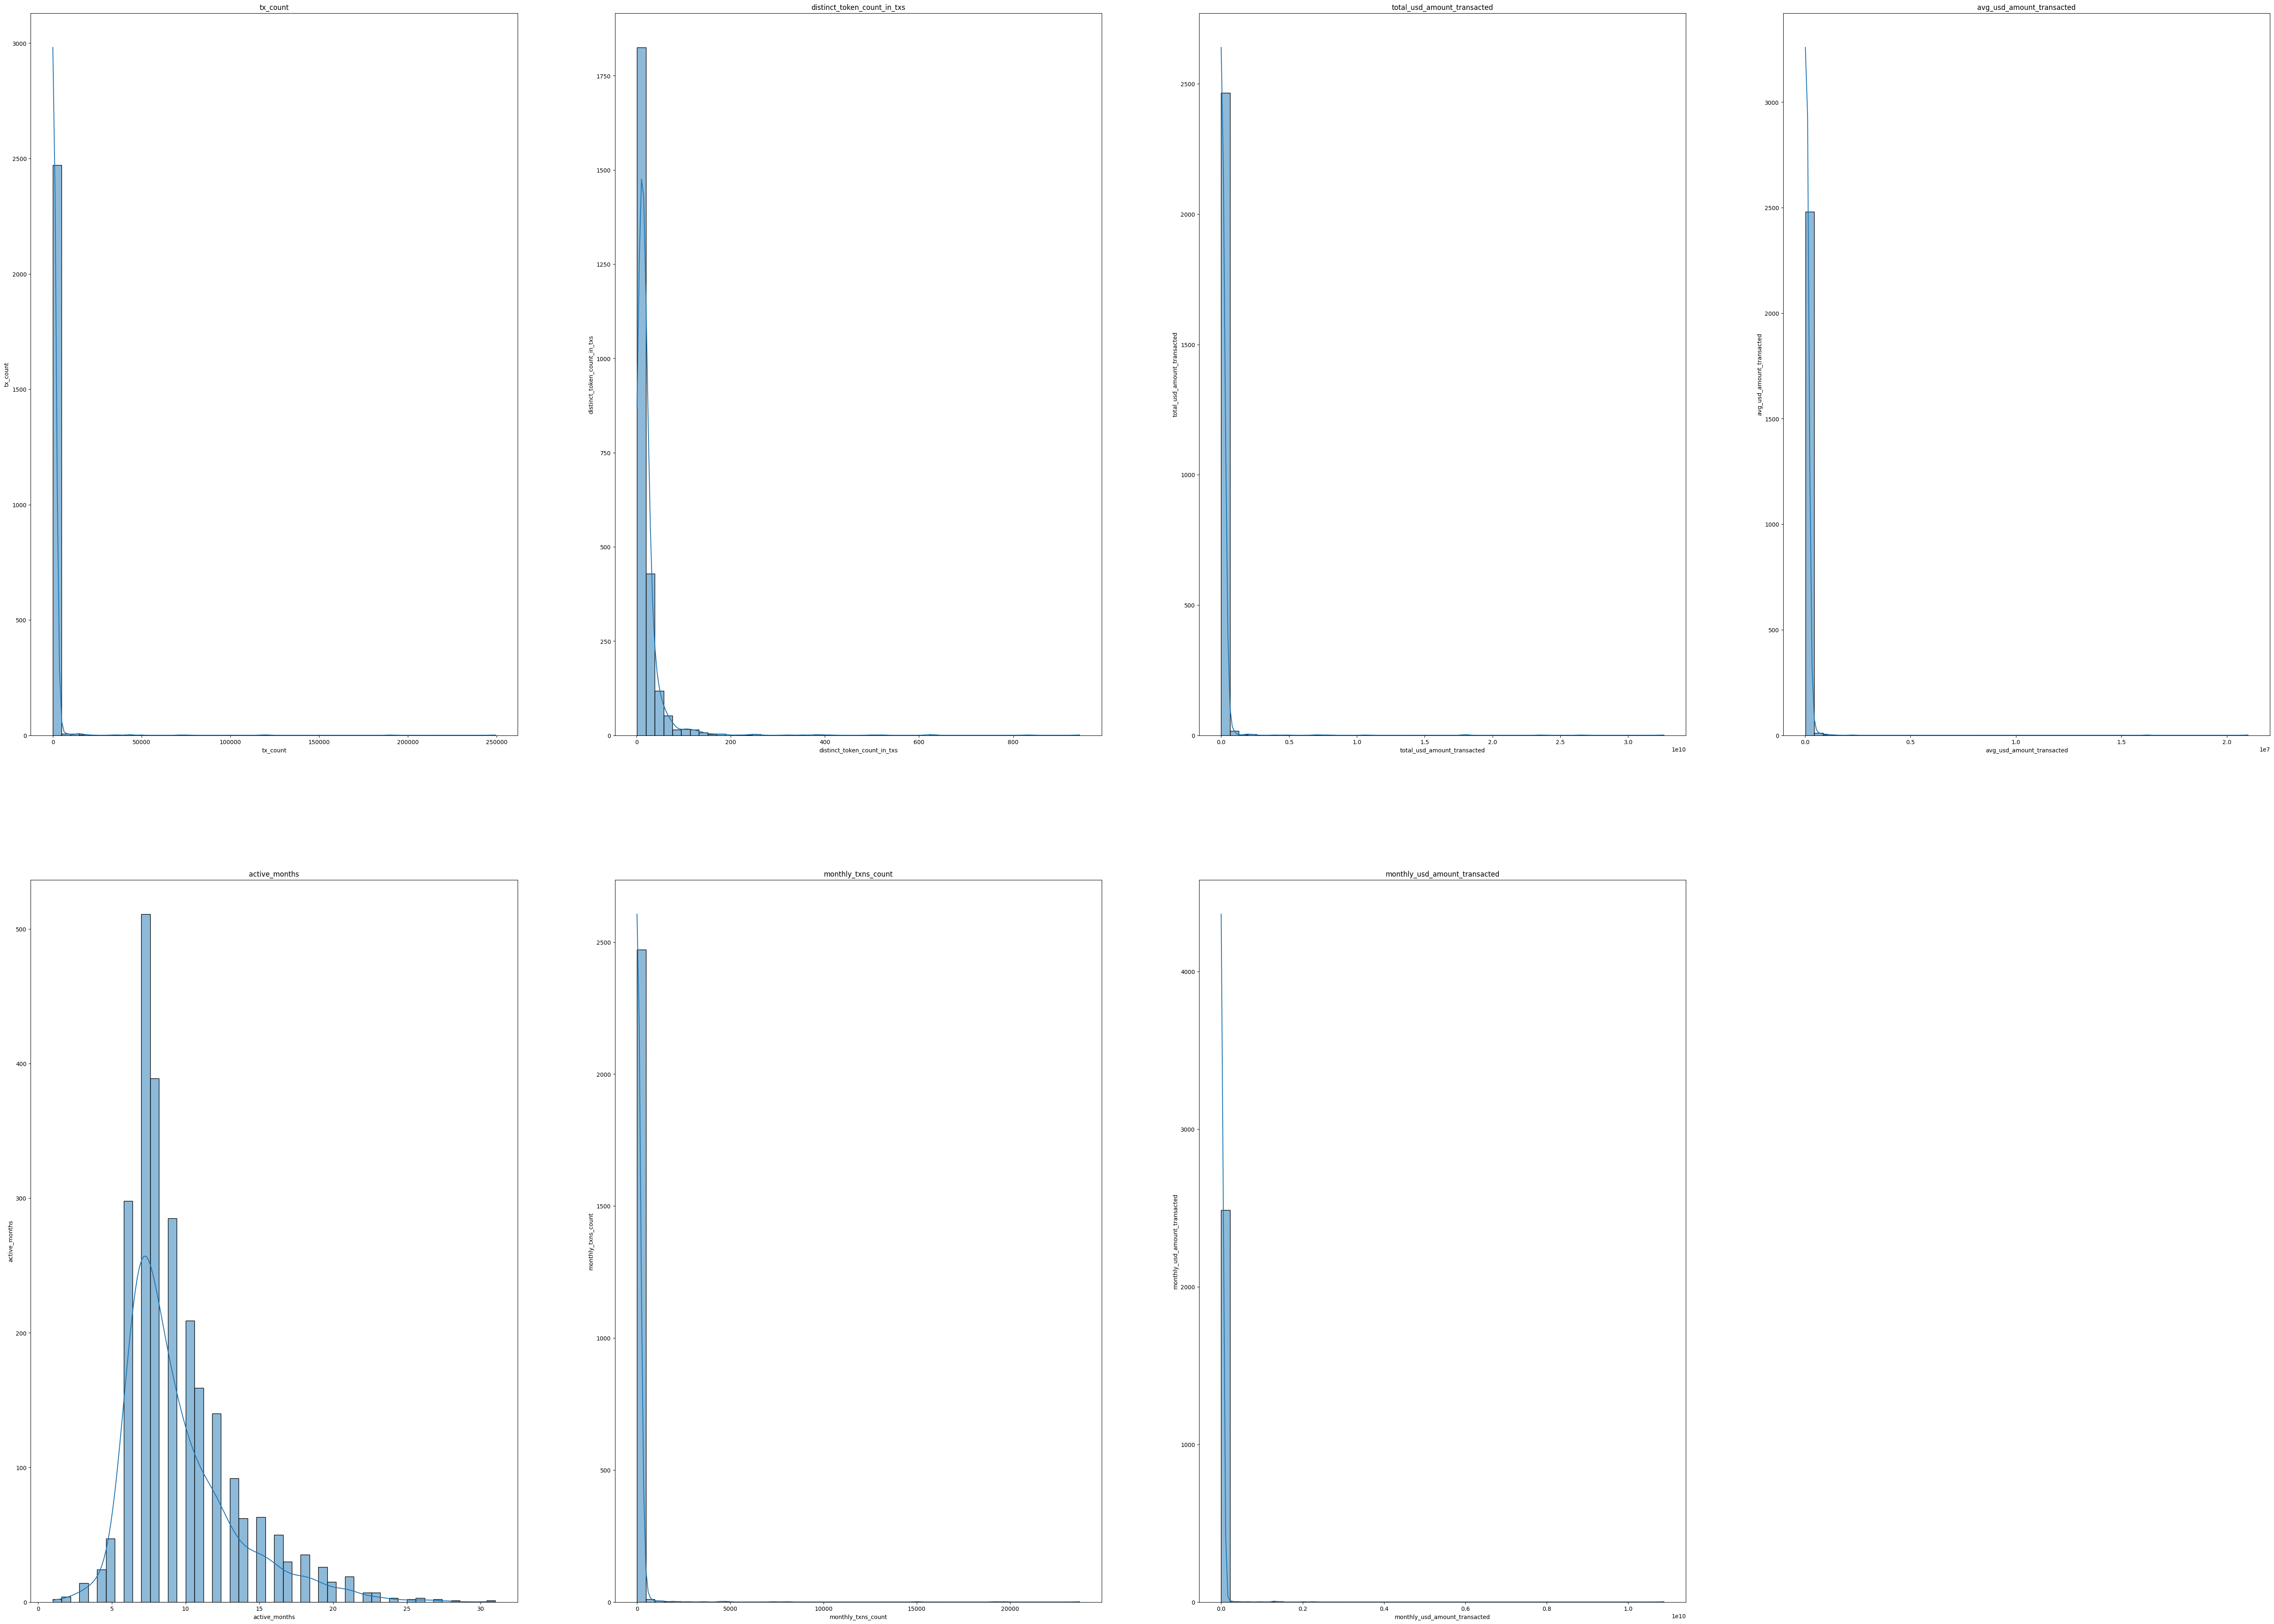

In [93]:
#quick validation of sample chosen
plot_distrib(X_sample)

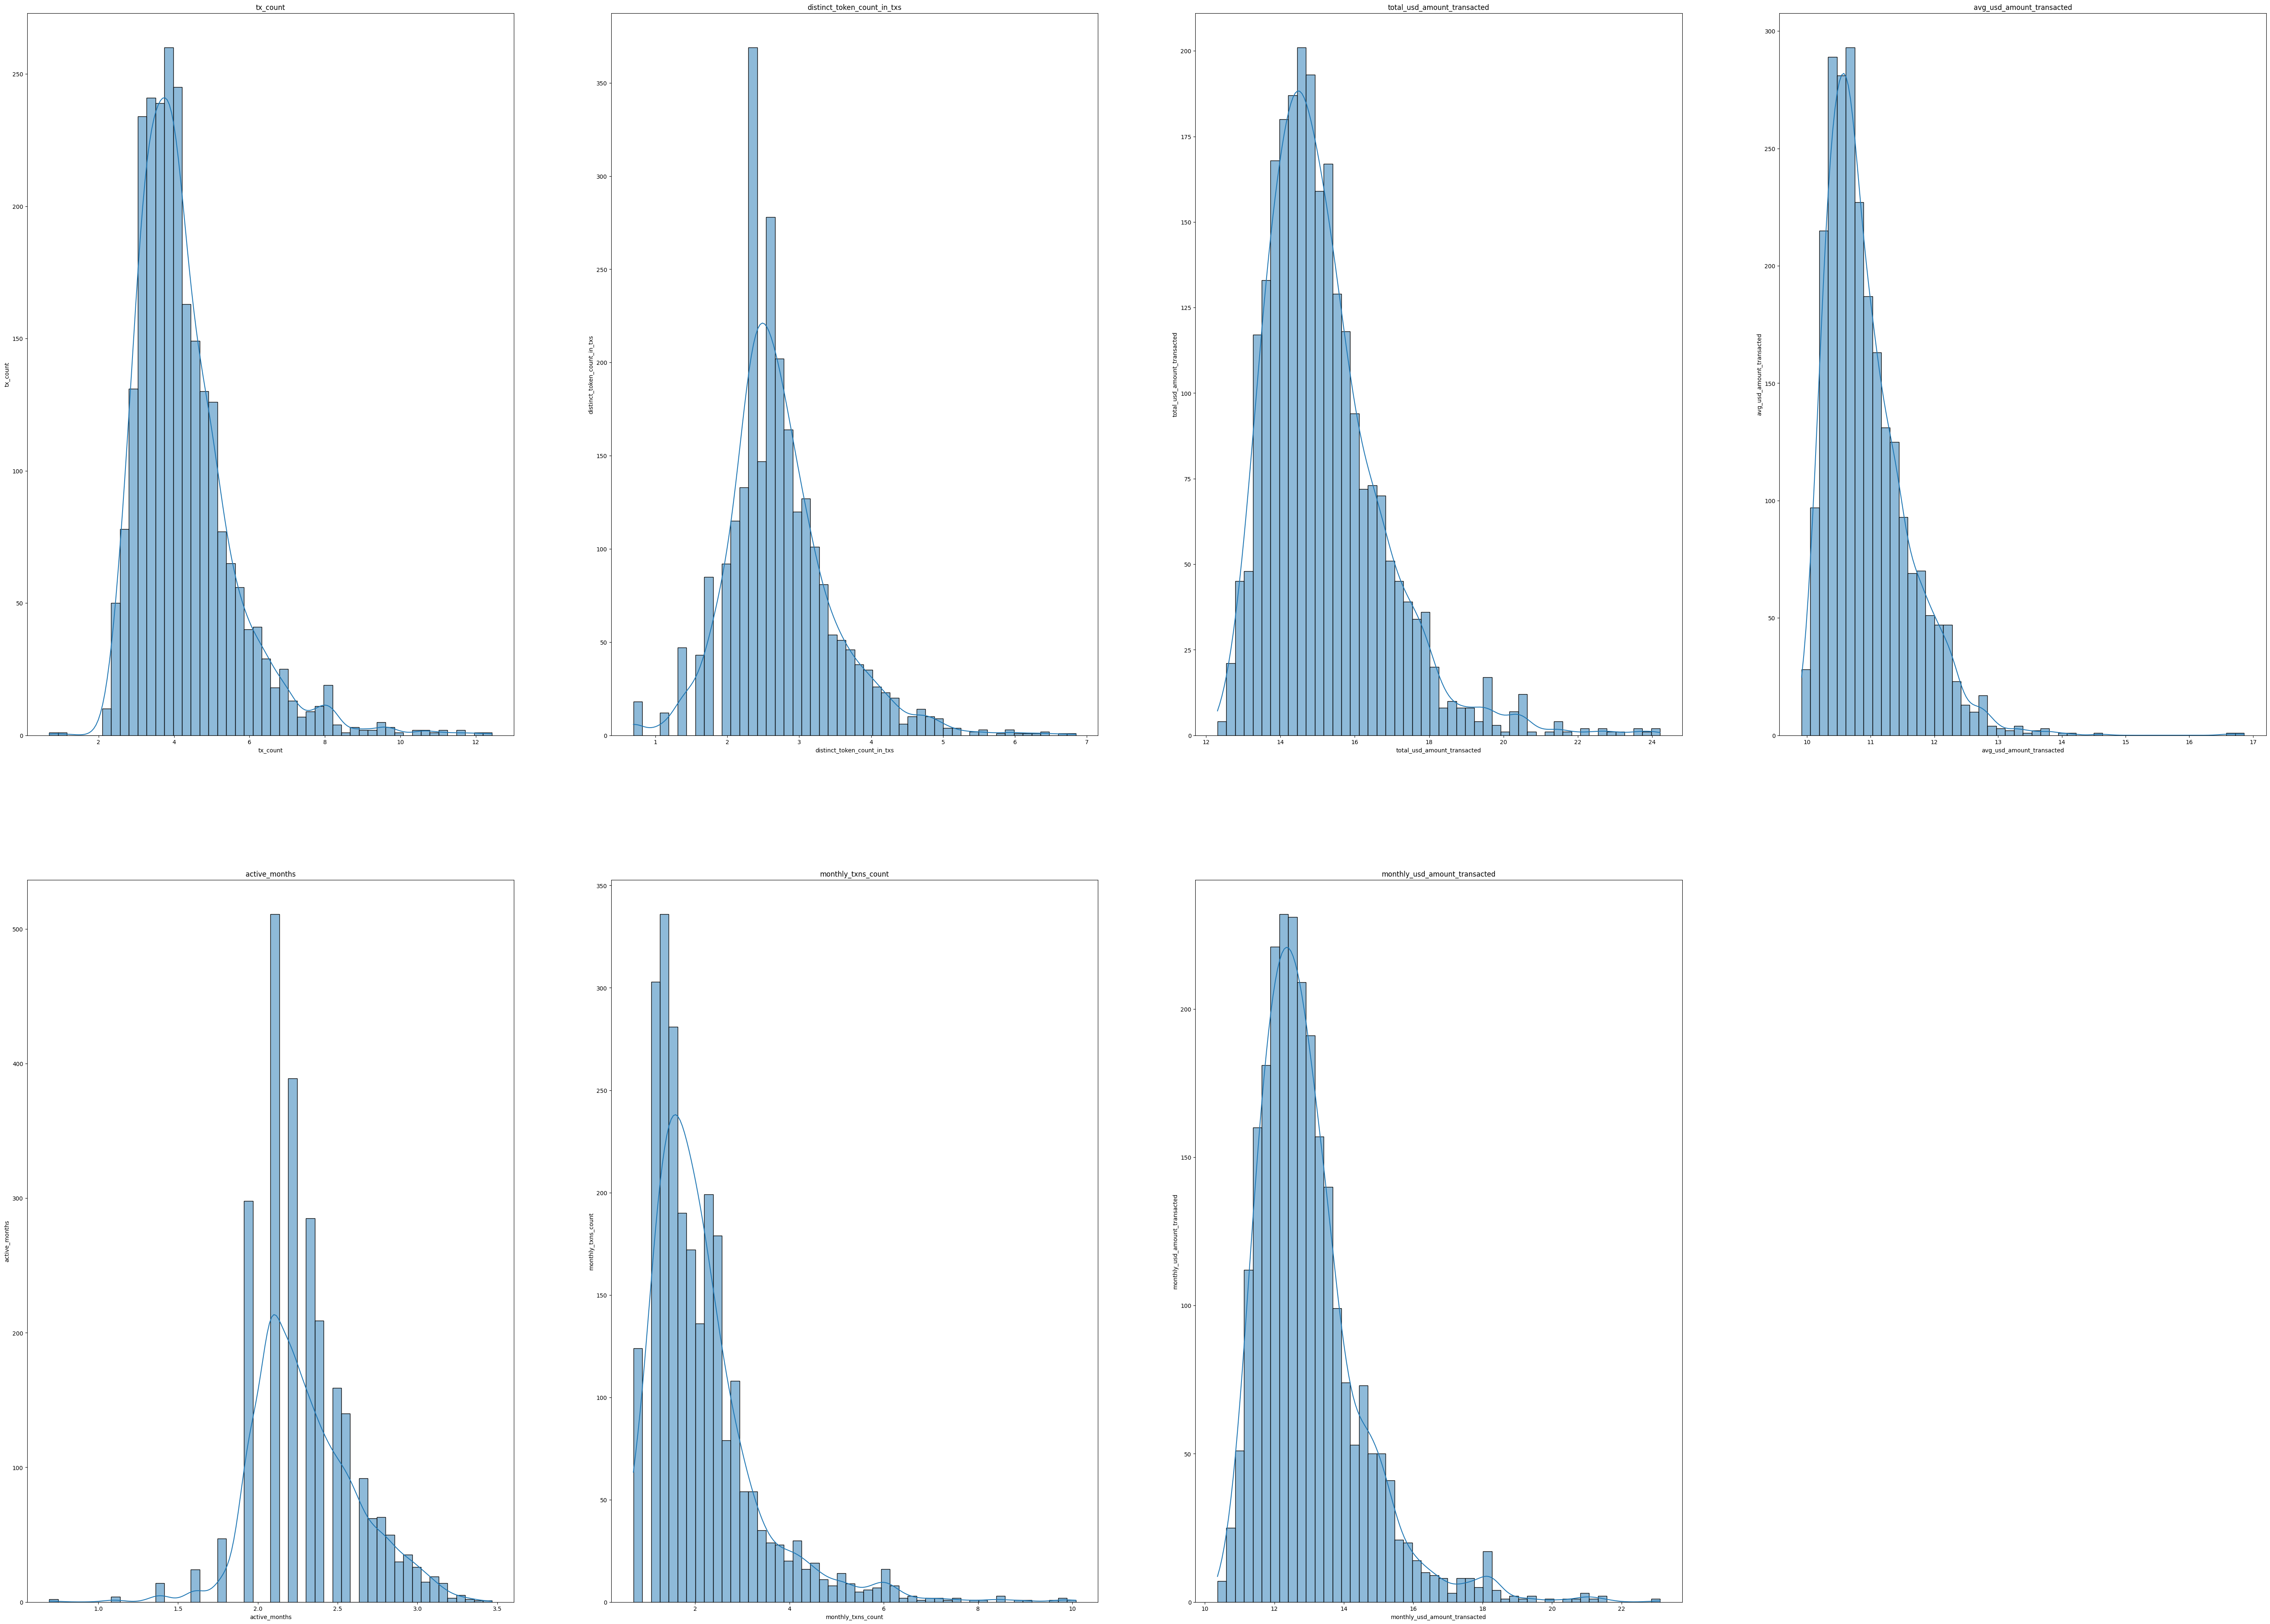

In [94]:
plot_distrib(X_sample.apply(lambda x: np.log(x+ 1)))

##K-means complete evaluation metrics (ellbow, silhouette)

[]

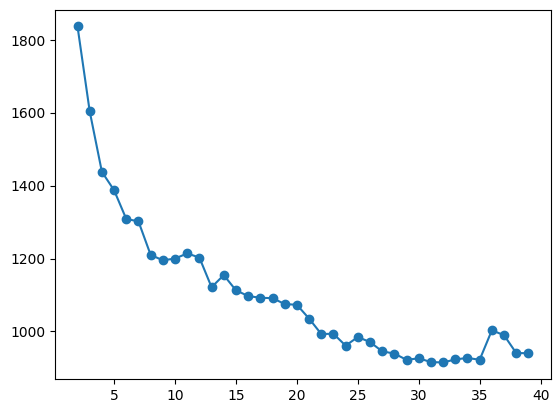

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

#ellbow method
ss = [] #the sum of squares
clusters = 40

for cluster_number in range(2, clusters):
    kmeans_sample_pipeline = Pipeline([("scaler", StandardScaler()),("cluster", KMedoids(n_clusters =cluster_number, random_state = 42))])
    kmeans_sample_pipeline.fit(X_sample)
    ss.append(kmeans_sample_pipeline.named_steps["cluster"].inertia_)

plt.plot(range(2,clusters), ss, marker = "o")
plt.plot()

[]

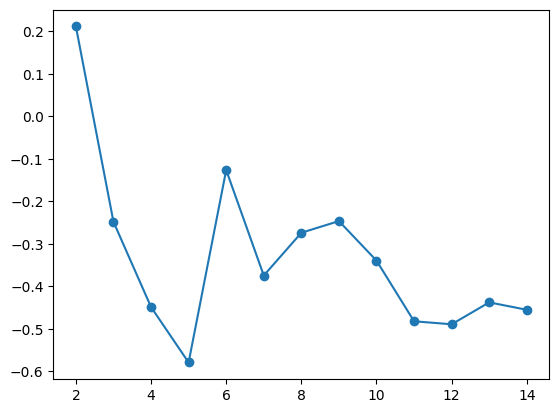

In [123]:
#silhouette score
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette = [] #the sum of squares
clusters = 15

for cluster_number in range(2, clusters):
    kmeans_sample_pipeline = Pipeline([("scaler", StandardScaler()),("cluster", KMedoids(n_clusters =cluster_number, random_state = 42))])
    kmeans_sample_pipeline.fit(X_sample)
    cluster_labels = kmeans_sample_pipeline.predict(X_sample)
    silhouette.append(silhouette_score(X_sample,cluster_labels))


plt.plot(range(2,clusters), silhouette, marker = "o")
plt.plot()



[]

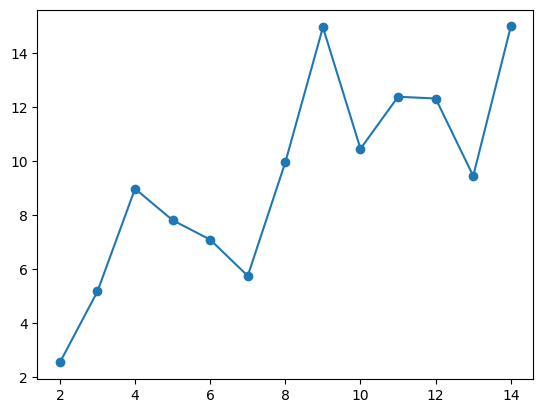

In [124]:
# davies_bouldin_score

from sklearn.metrics import davies_bouldin_score

dbi = []
for k in range(2,15):
    kmeans_sample_pipeline = Pipeline([("scaler", StandardScaler()),("cluster", KMedoids(n_clusters =k, random_state = 42))])
    kmeans_sample_pipeline.fit(X_sample)
    cluster_labels = kmeans_sample_pipeline.predict(X_sample)
    dbi.append(davies_bouldin_score(X_sample, cluster_labels))

plt.plot(range(2,15), dbi, marker = "o")
plt.plot()


[]

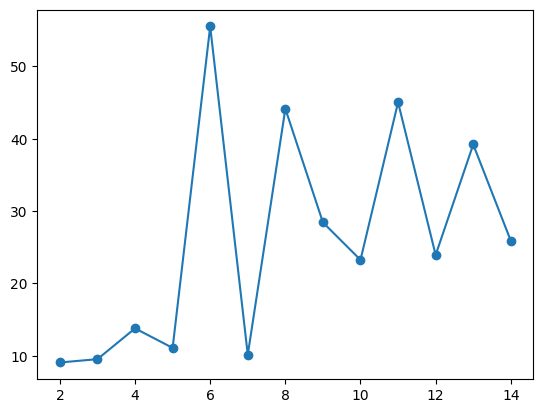

In [125]:
from sklearn.metrics import calinski_harabasz_score

chi = []

for k in range(2,15):
    kmeans_sample_pipeline = Pipeline([("scaler", StandardScaler()),("cluster", KMedoids(n_clusters =k, random_state = 42))])
    kmeans_sample_pipeline.fit(X_sample)
    cluster_labels = kmeans_sample_pipeline.predict(X_sample)
    chi.append(calinski_harabasz_score(X_sample, cluster_labels))

plt.plot(range(2,15), chi, marker = "o")
plt.plot()



For n_clusters = 2 The average silhouette_score is : 0.2114
For n_clusters = 3 The average silhouette_score is : -0.2481
For n_clusters = 4 The average silhouette_score is : -0.4486
For n_clusters = 5 The average silhouette_score is : -0.5789
For n_clusters = 6 The average silhouette_score is : -0.1262
For n_clusters = 7 The average silhouette_score is : -0.3744
For n_clusters = 8 The average silhouette_score is : -0.2738
For n_clusters = 9 The average silhouette_score is : -0.2463
For n_clusters = 10 The average silhouette_score is : -0.3394
For n_clusters = 11 The average silhouette_score is : -0.4821
For n_clusters = 12 The average silhouette_score is : -0.4891
For n_clusters = 13 The average silhouette_score is : -0.4376
For n_clusters = 14 The average silhouette_score is : -0.455




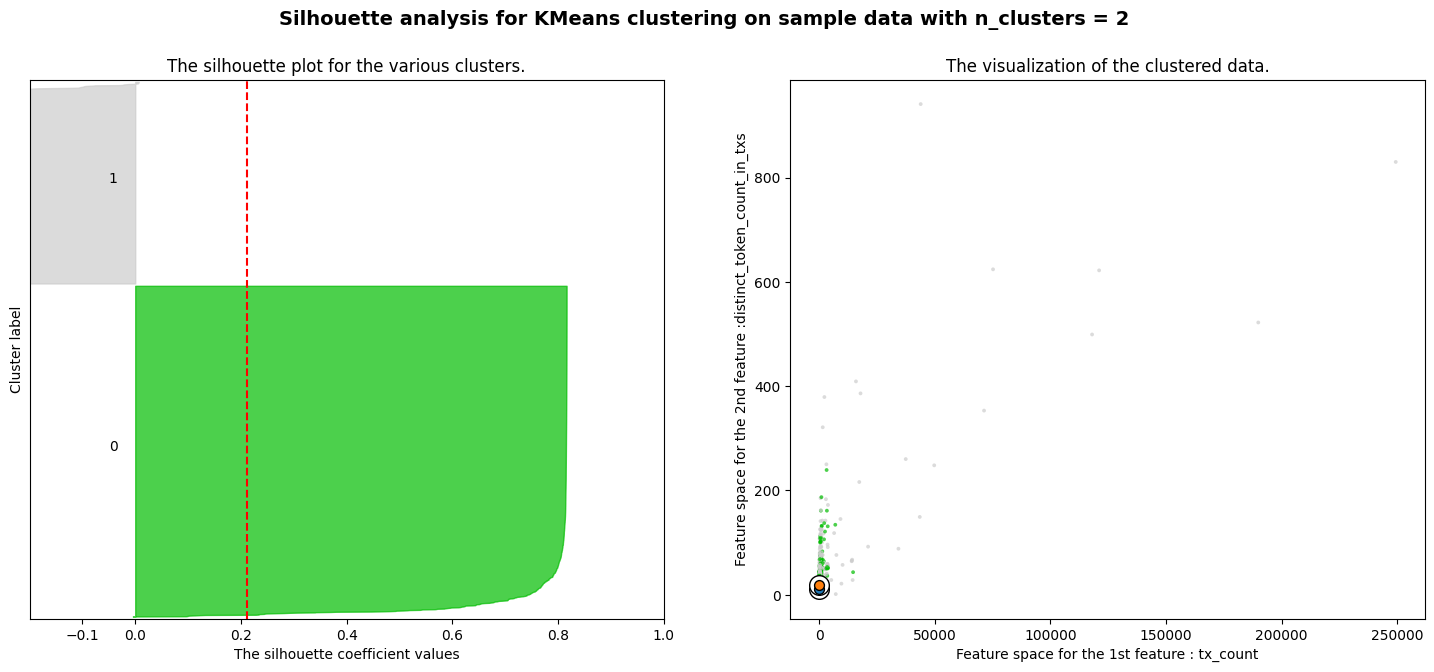

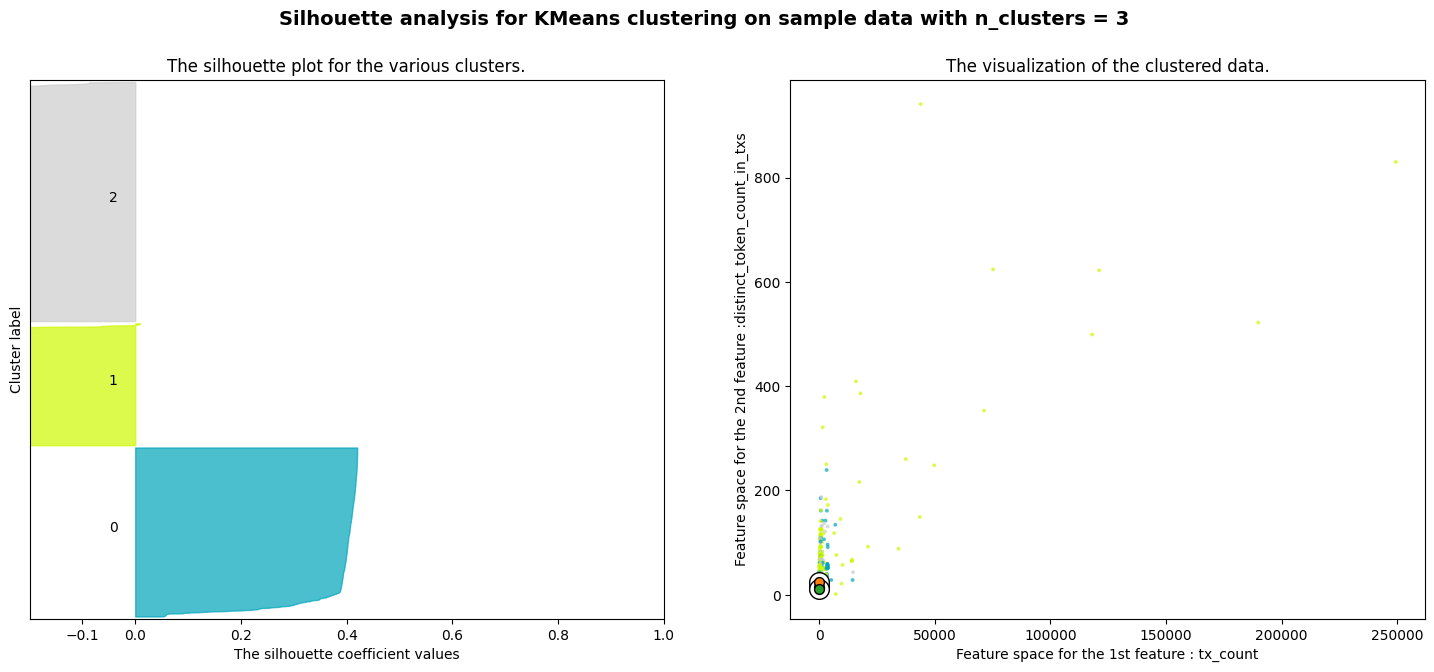

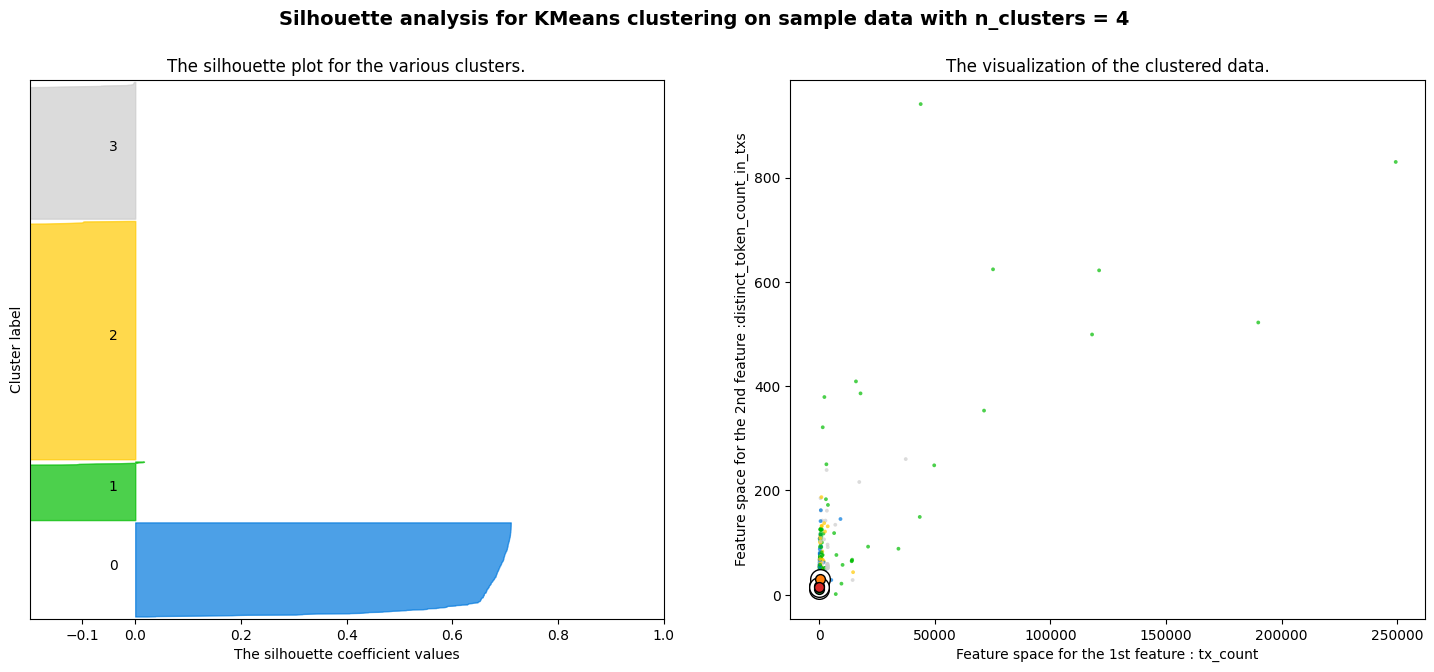

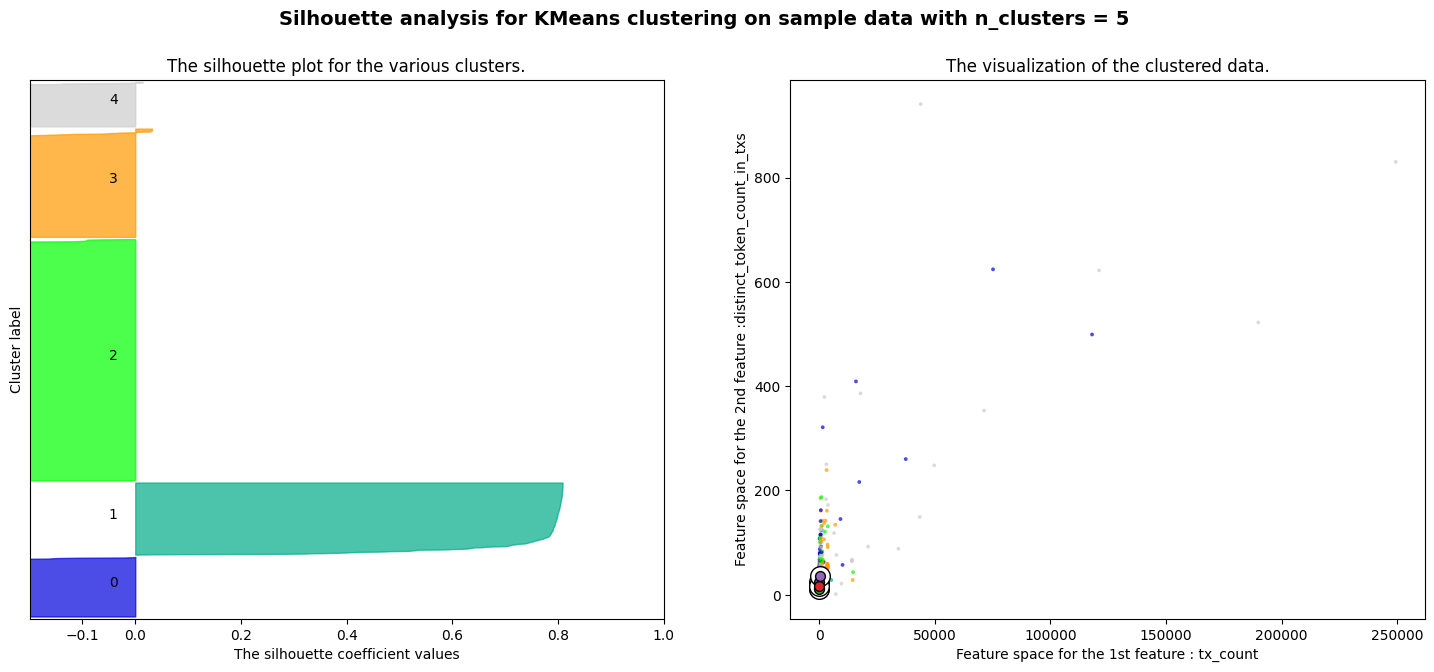

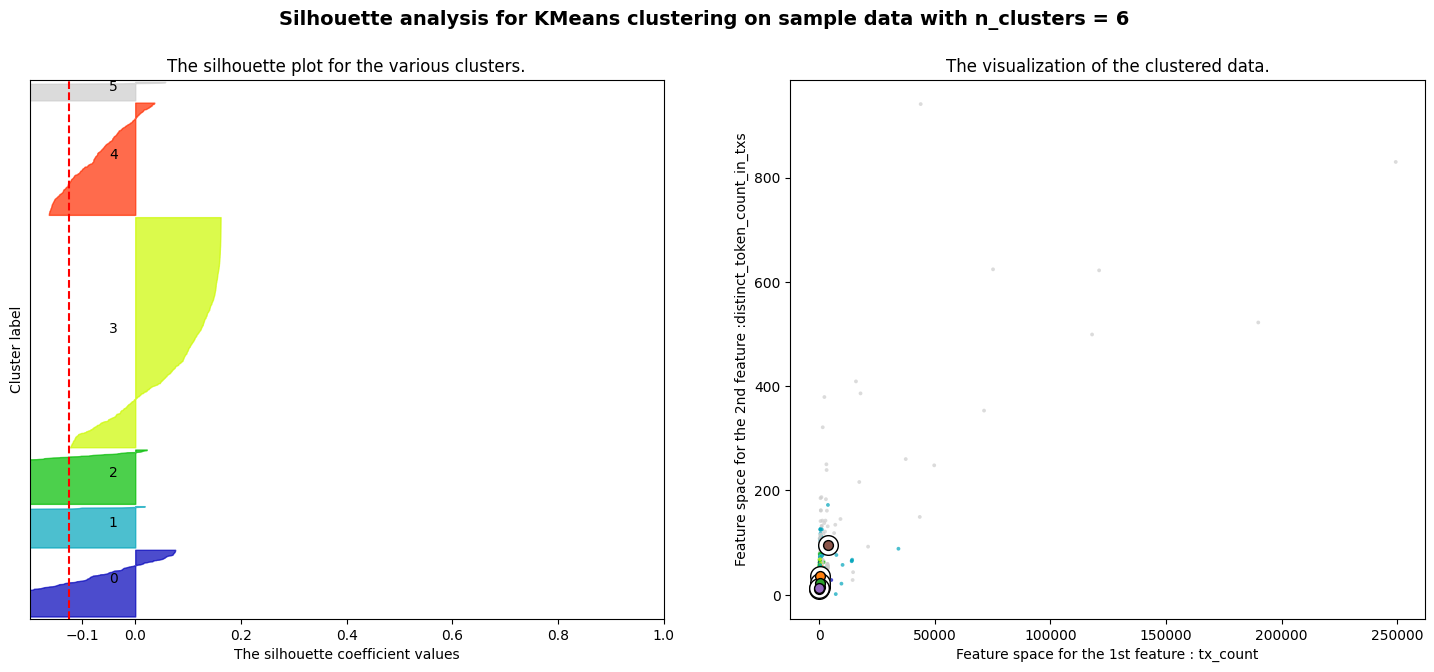

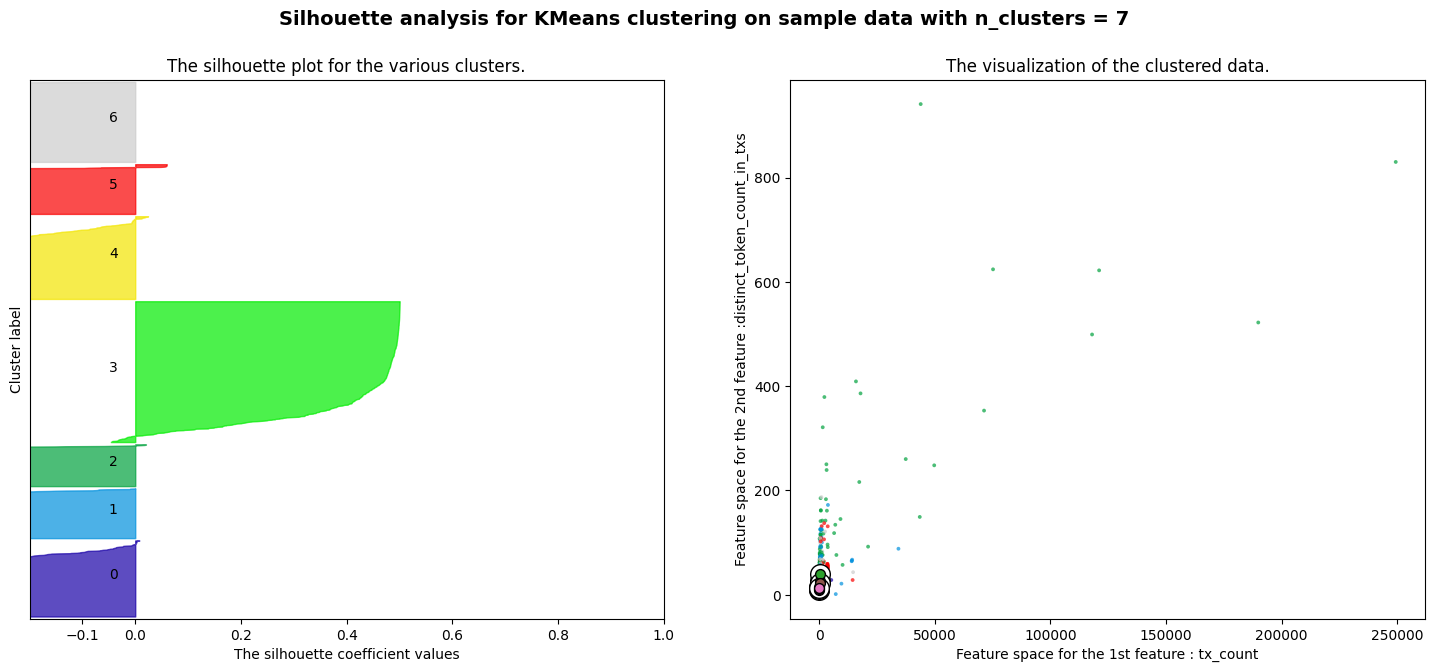

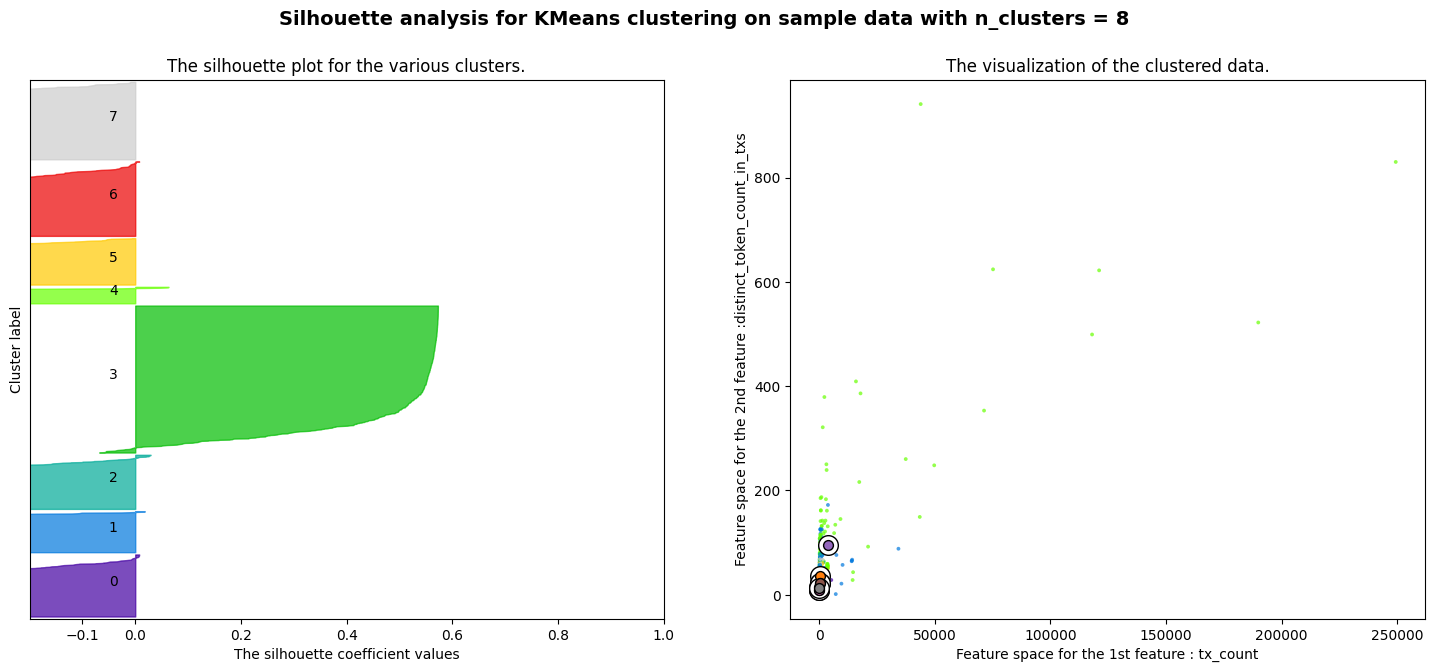

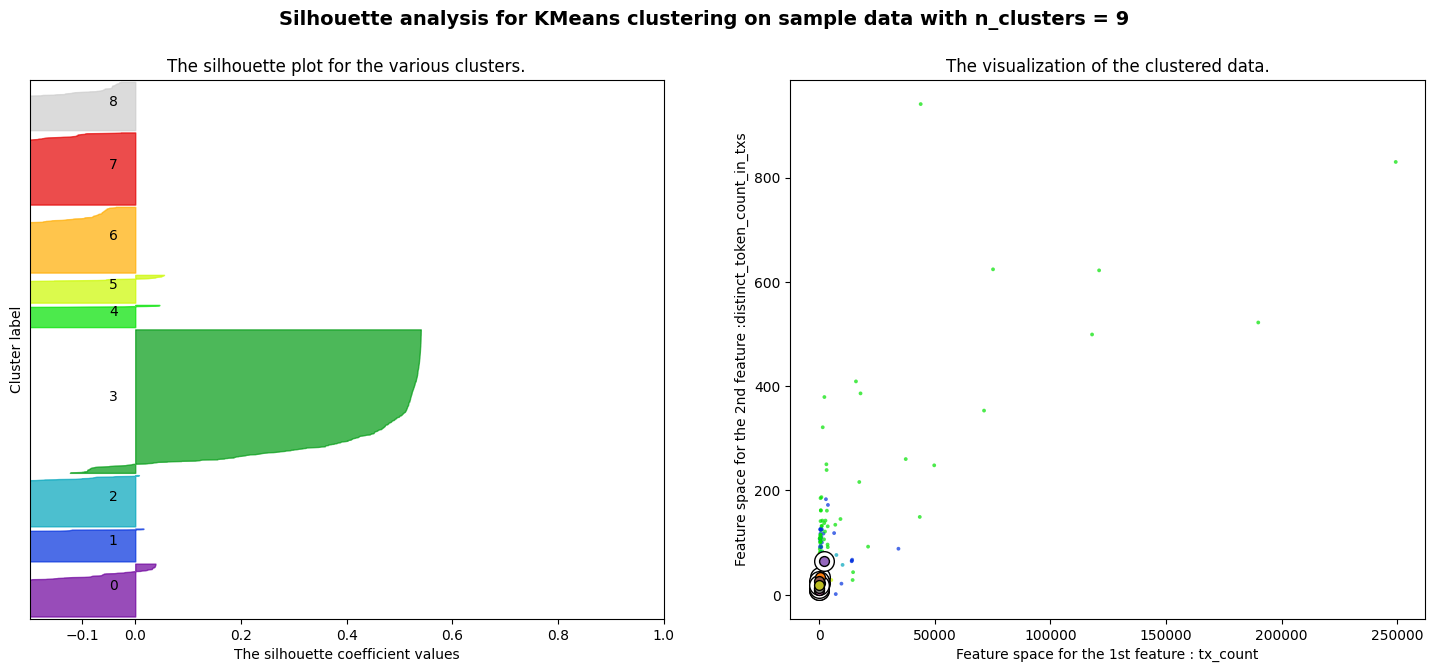

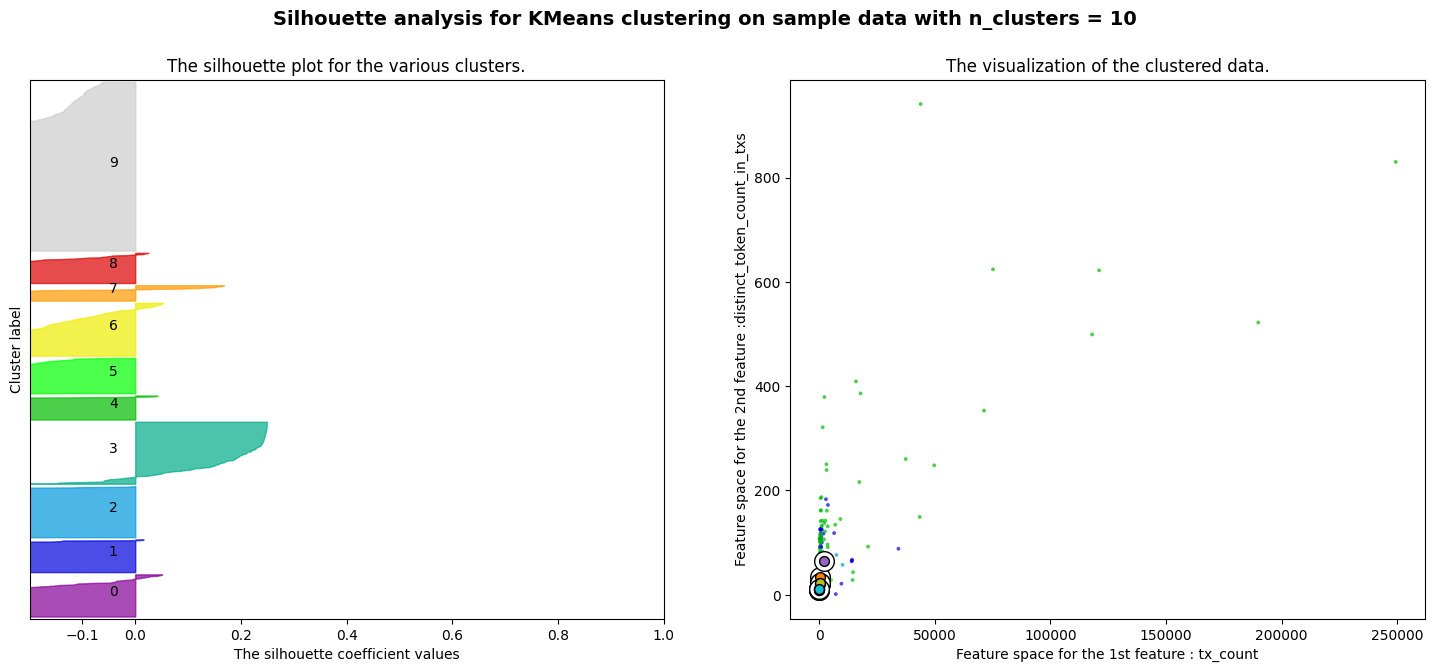

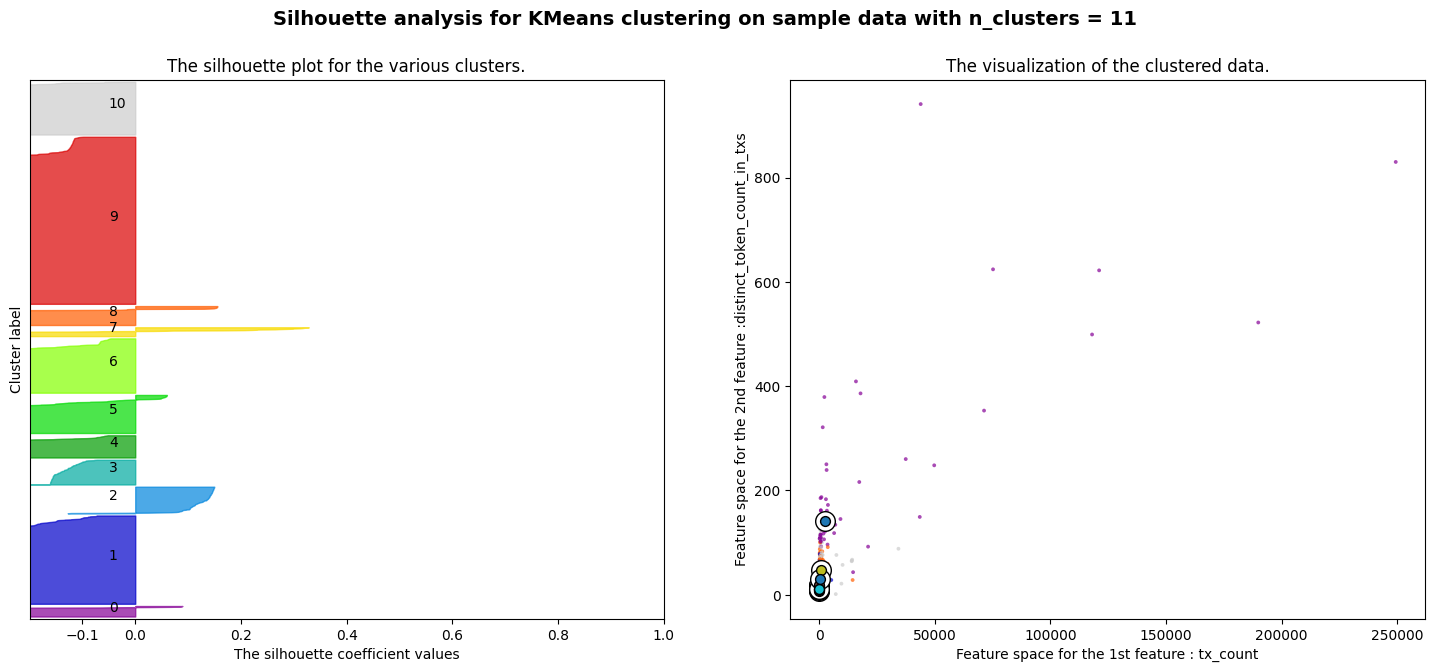

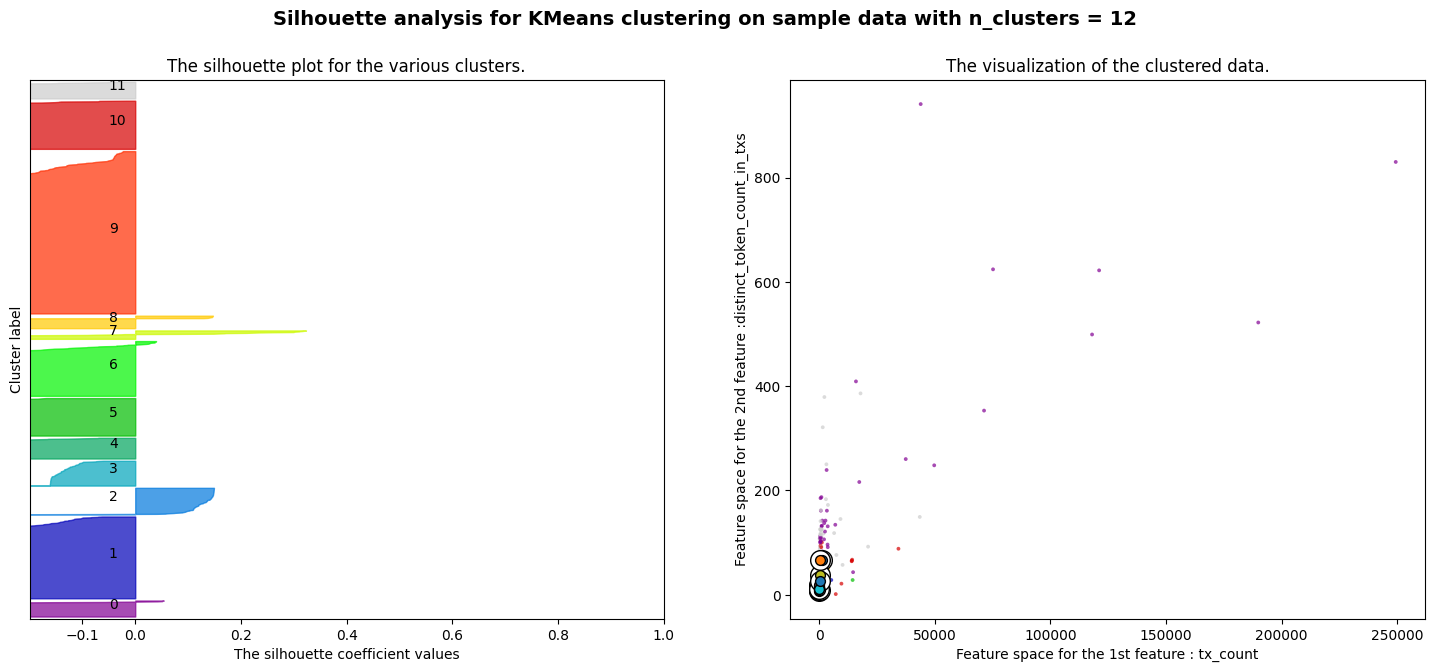

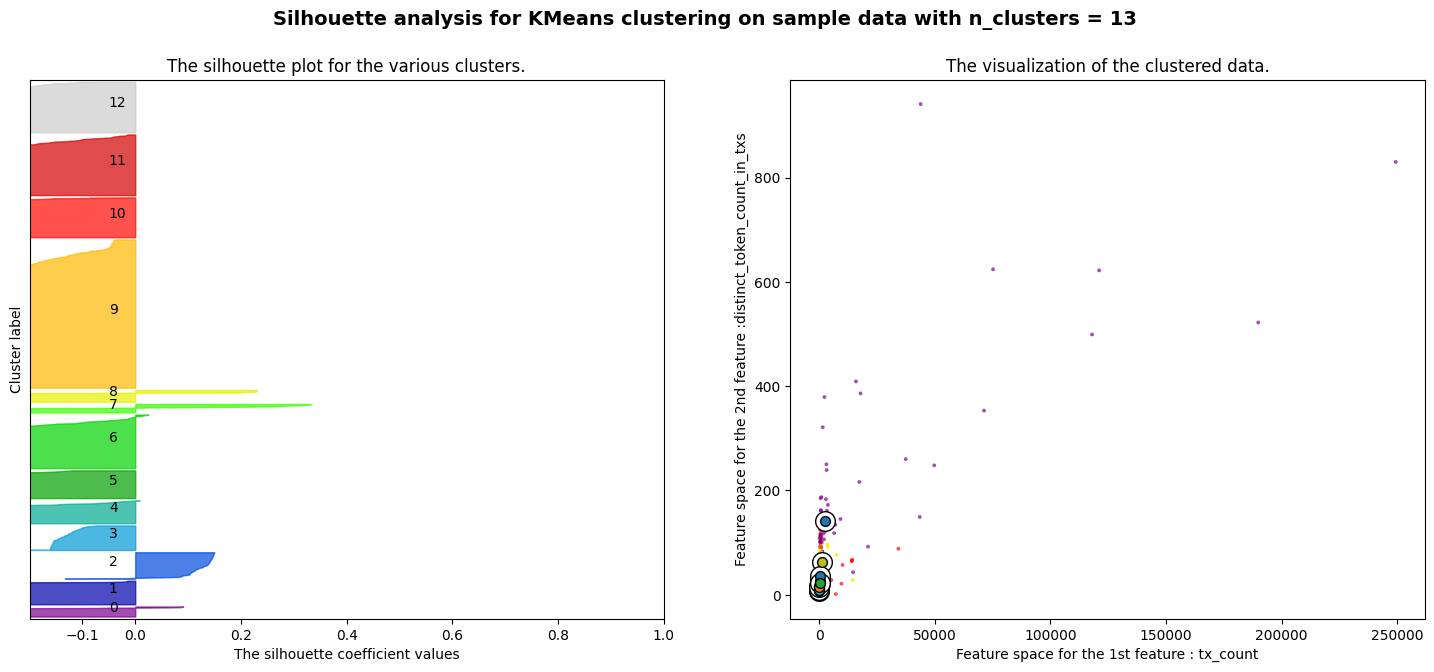

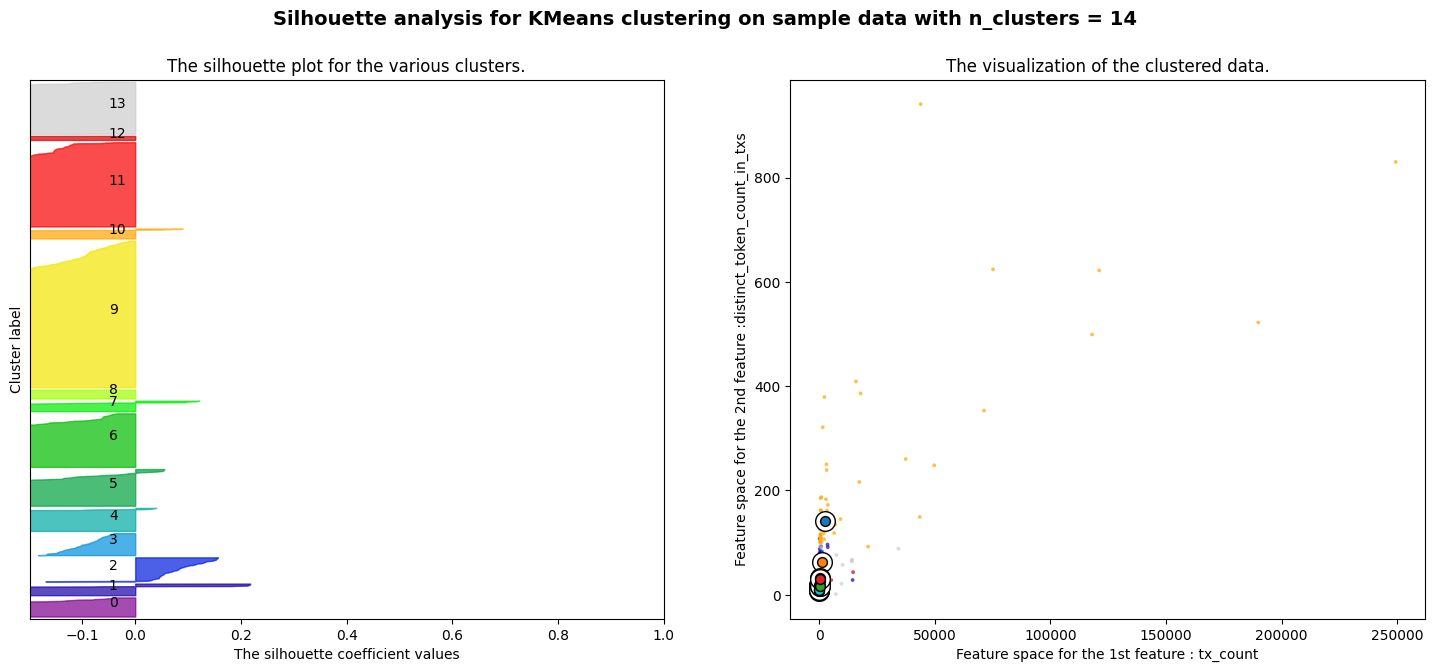

In [126]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm


range_n_clusters = range(2, 15)

r_seed = 17

cols = X_sample.columns

for n_clusters in range_n_clusters:

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.2, 1]
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_sample) + (n_clusters + 1) * 10])

    # Initialize the Pipeline with n_clusters value and a random generator seed for reproducibility.
    kmeans_pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("cluster", KMedoids(n_clusters=n_clusters, random_state=r_seed))])

    cluster_labels = kmeans_pipeline.fit_predict(X_sample)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X_sample, cluster_labels)
    print("For n_clusters =",
          n_clusters,
          "The average silhouette_score is :",
          silhouette_avg.round(4))

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_sample, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i + 1) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0,
                          ith_cluster_silhouette_values,
                          facecolor=color,
                          edgecolor=color,
                          alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral((cluster_labels.astype(float) + 1) / n_clusters)
    ax2.scatter(X_sample.iloc[:, 0],
                X_sample.iloc[:, 1],
                marker=".",
                s=30,
                lw=0,
                alpha=0.7,
                c=colors,
                edgecolor="k")

    # Labeling the clusters
    pipeline_centers = kmeans_pipeline.named_steps["cluster"].cluster_centers_
    centers = kmeans_pipeline.named_steps["scaler"].inverse_transform(pipeline_centers)
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature : " + cols[0])
    ax2.set_ylabel("Feature space for the 2nd feature :" + cols[1])

    plt.suptitle(
        (
            "Silhouette analysis for KMeans clustering on sample data "
            "with n_clusters = %d" % n_clusters
        ),
        fontsize=14,
        fontweight="bold",
    )
print("\n")
plt.show()

**Insights**:

*   Either cluster sizes of around 3 or 10 across the different scores perform well in K-means.



##T-SNE

consider pca before t-sne before. try different perplexity levels, try to increase exageration, do eda and look at correlation of features, consider just looking at one protocol.

In [127]:
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

medium perplexity value

In [128]:
t_sne_pipeline = Pipeline([("scaler", StandardScaler()),("tsne", TSNE(n_components=2, perplexity=50, n_iter=5000))])

X_tsne = t_sne_pipeline.fit_transform(X_sample)

<ipython-input-129-a53af4348cd6>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap=plt.cm.Spectral)


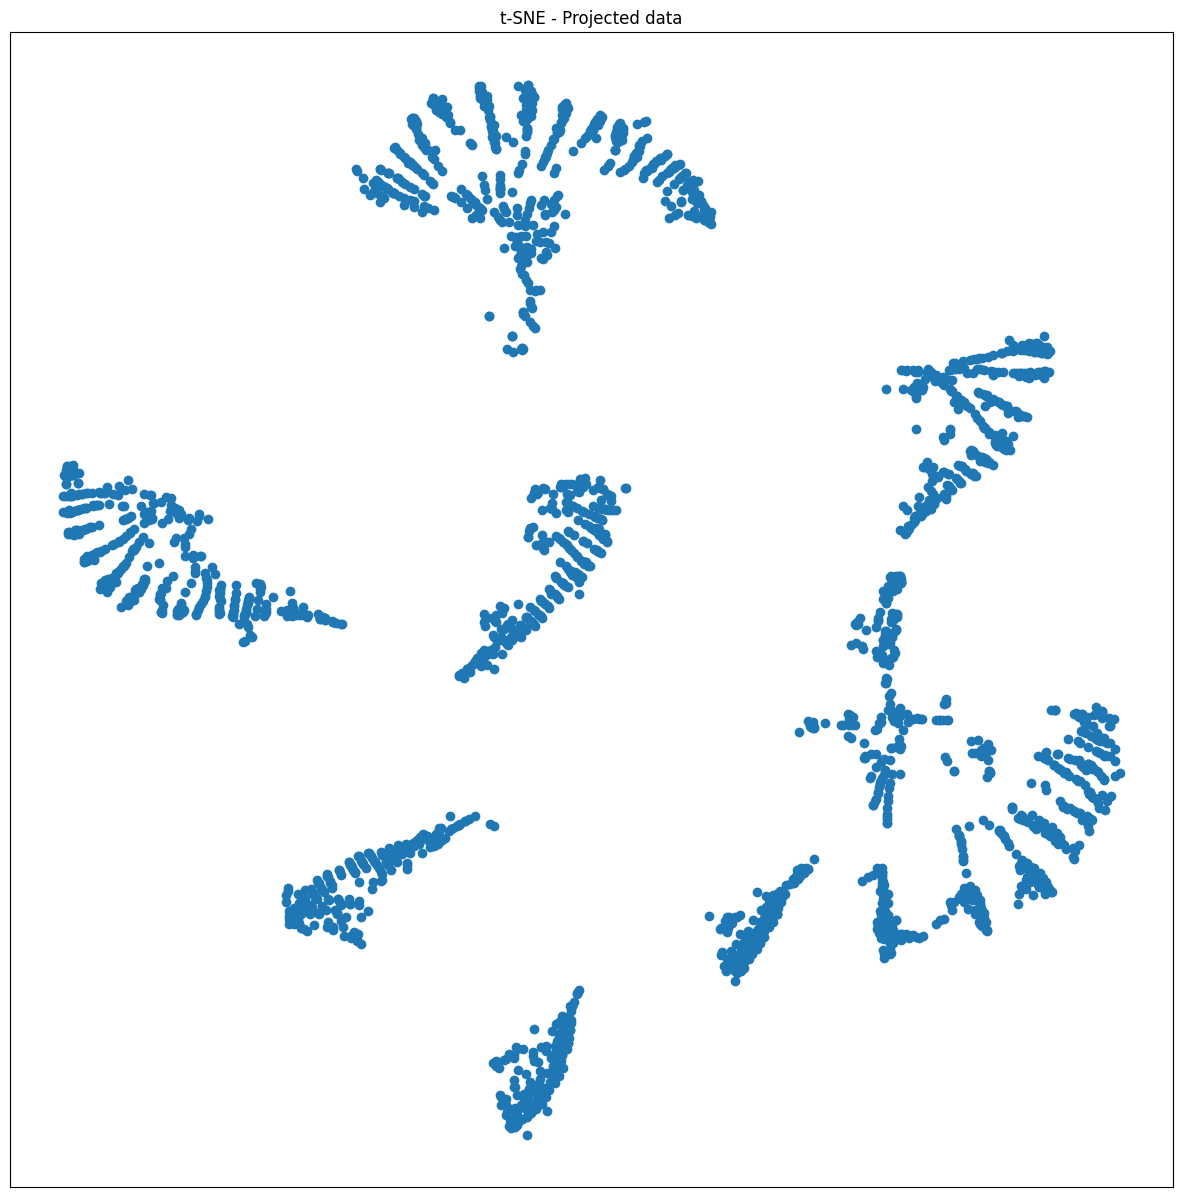

In [129]:
fig = plt.figure(figsize =(15, 15))

# plot projected roll
ax = fig.add_subplot()
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('t-SNE - Projected data')
plt.show()

In [130]:
#med high

t_sne_pipeline = Pipeline([("scaler", StandardScaler()),("tsne", TSNE(n_components=2, perplexity=100, n_iter=5000))])

X_tsne = t_sne_pipeline.fit_transform(X_sample)



<ipython-input-131-05a80bce6429>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap=plt.cm.Spectral)


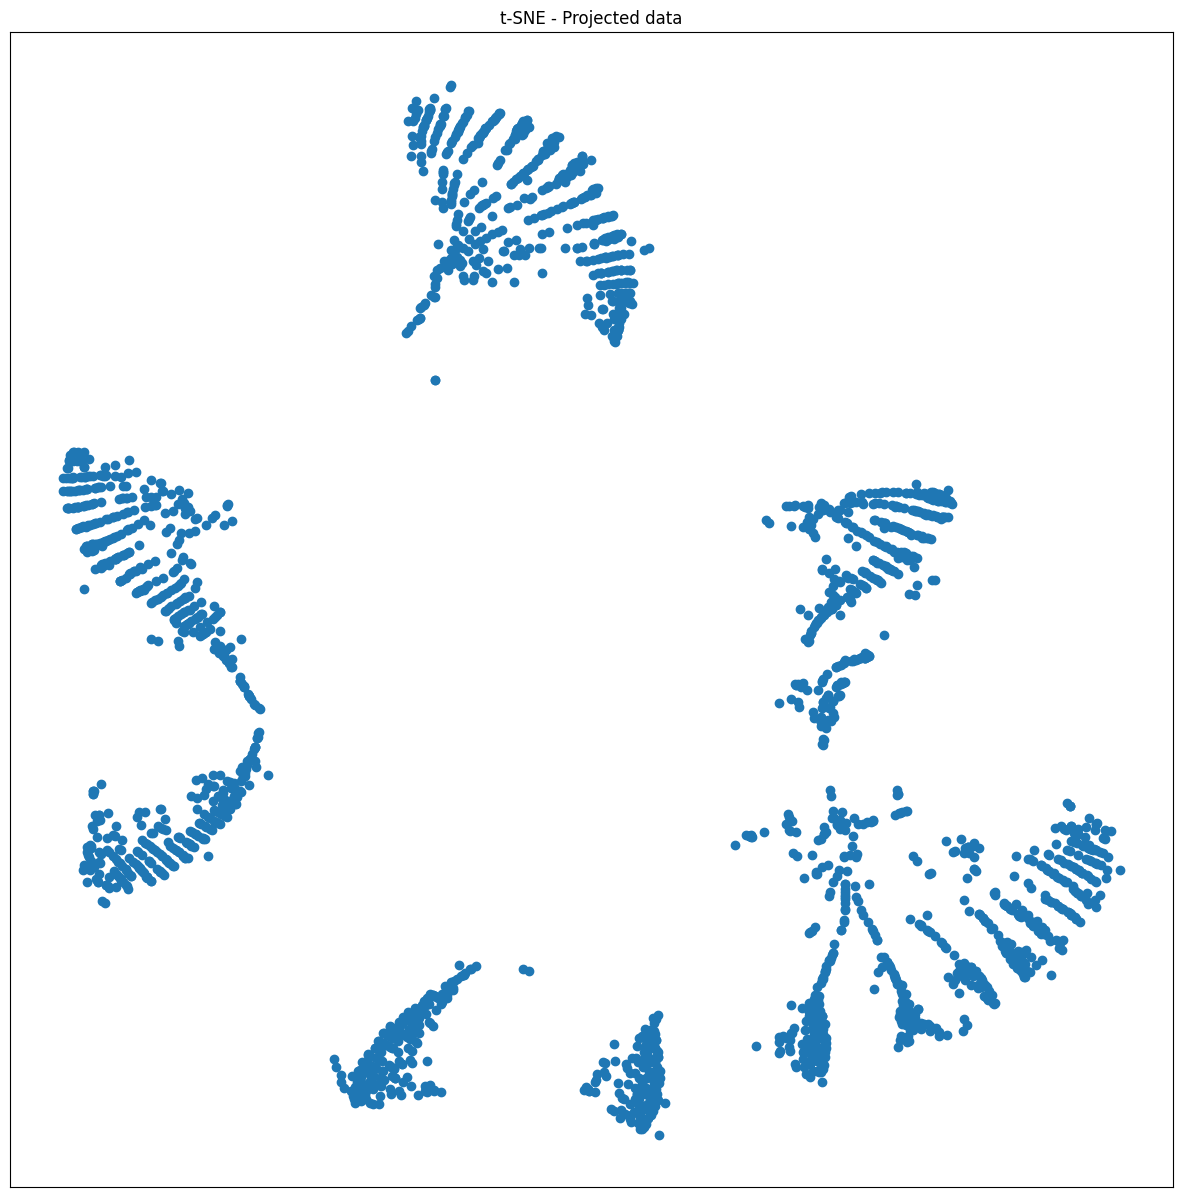

In [131]:
fig = plt.figure(figsize =(15, 15))

# plot original roll
# ax = fig.add_subplot(211, projection='3d')
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
# ax.set_title("Original data")

# plot projected roll
ax = fig.add_subplot()
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('t-SNE - Projected data')
plt.show()

High perplexity value

In [132]:


#p = 200

t_sne_pipeline = Pipeline([("scaler", StandardScaler()),("tsne", TSNE(n_components=2, perplexity=200, n_iter=5000))])

X_tsne = t_sne_pipeline.fit_transform(X_sample)


<ipython-input-133-05a80bce6429>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap=plt.cm.Spectral)


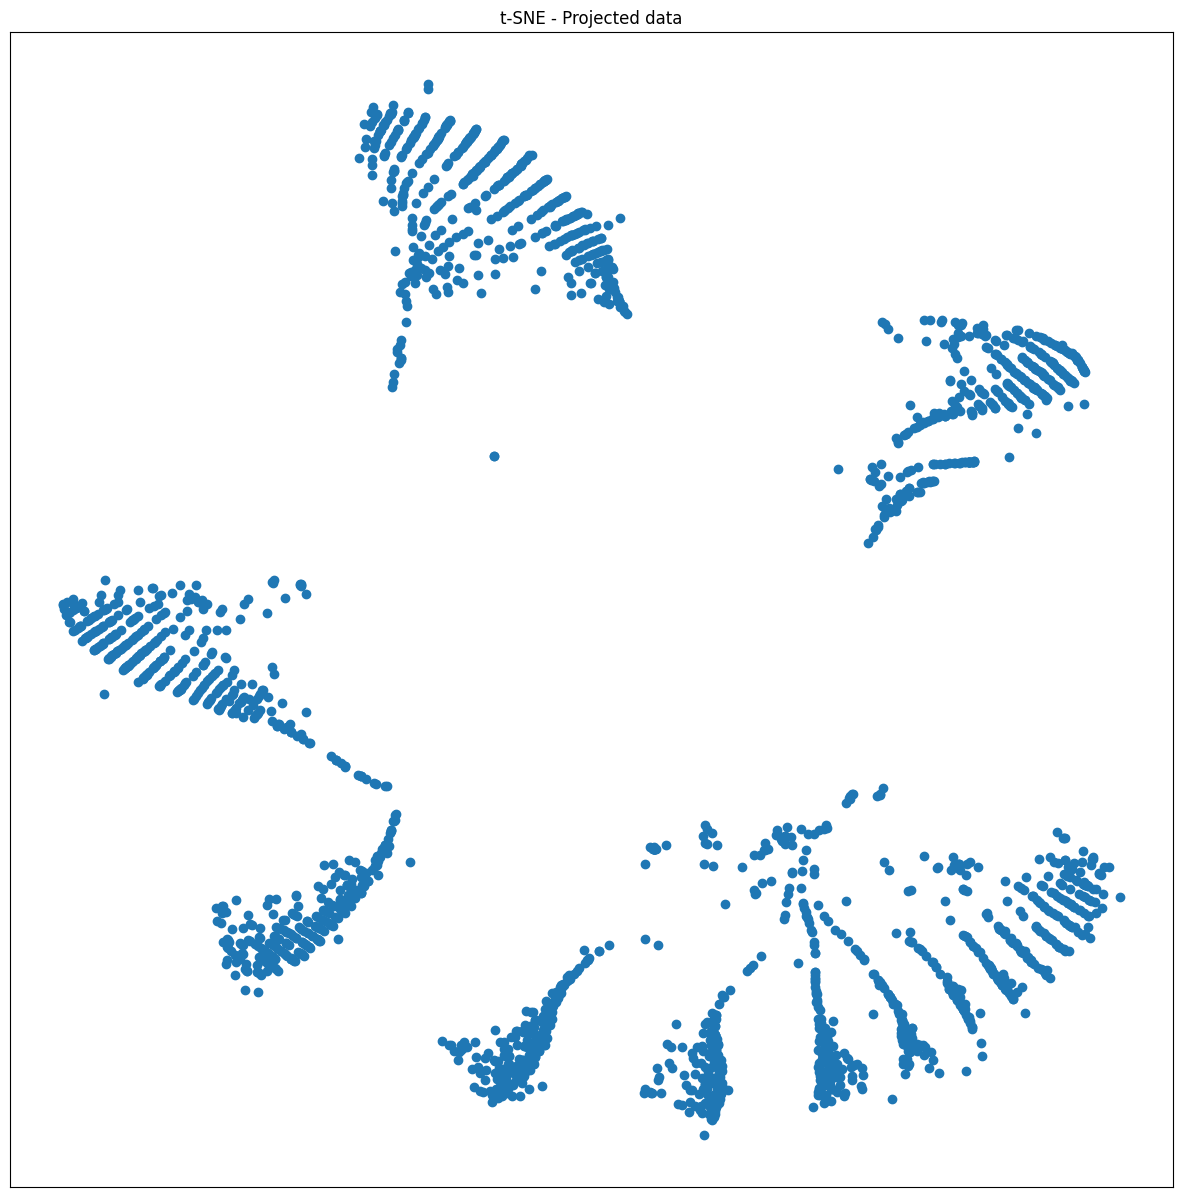

In [133]:


fig = plt.figure(figsize =(15, 15))

# plot original roll
# ax = fig.add_subplot(211, projection='3d')
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
# ax.set_title("Original data")

# plot projected roll
ax = fig.add_subplot()
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('t-SNE - Projected data')
plt.show()


###PCA to reduce sample on the main principal components and then visualize it using perplexity 200 -> this seems to be valid with dbscan cluster amounts of 130+ clusters


In [134]:
#tsne and pca with n_princ_comp = 10

tsne_pca_pipeline = Pipeline([("scaler", StandardScaler()),("pca", PCA(n_components = 4)), ("tsne",TSNE(n_components=2, perplexity=200, n_iter=5000))])

tsne_pca = tsne_pca_pipeline.fit_transform(X_sample)

<ipython-input-135-27c12eecb773>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(tsne_pca[:, 0], tsne_pca[:, 1], cmap=plt.cm.Spectral)


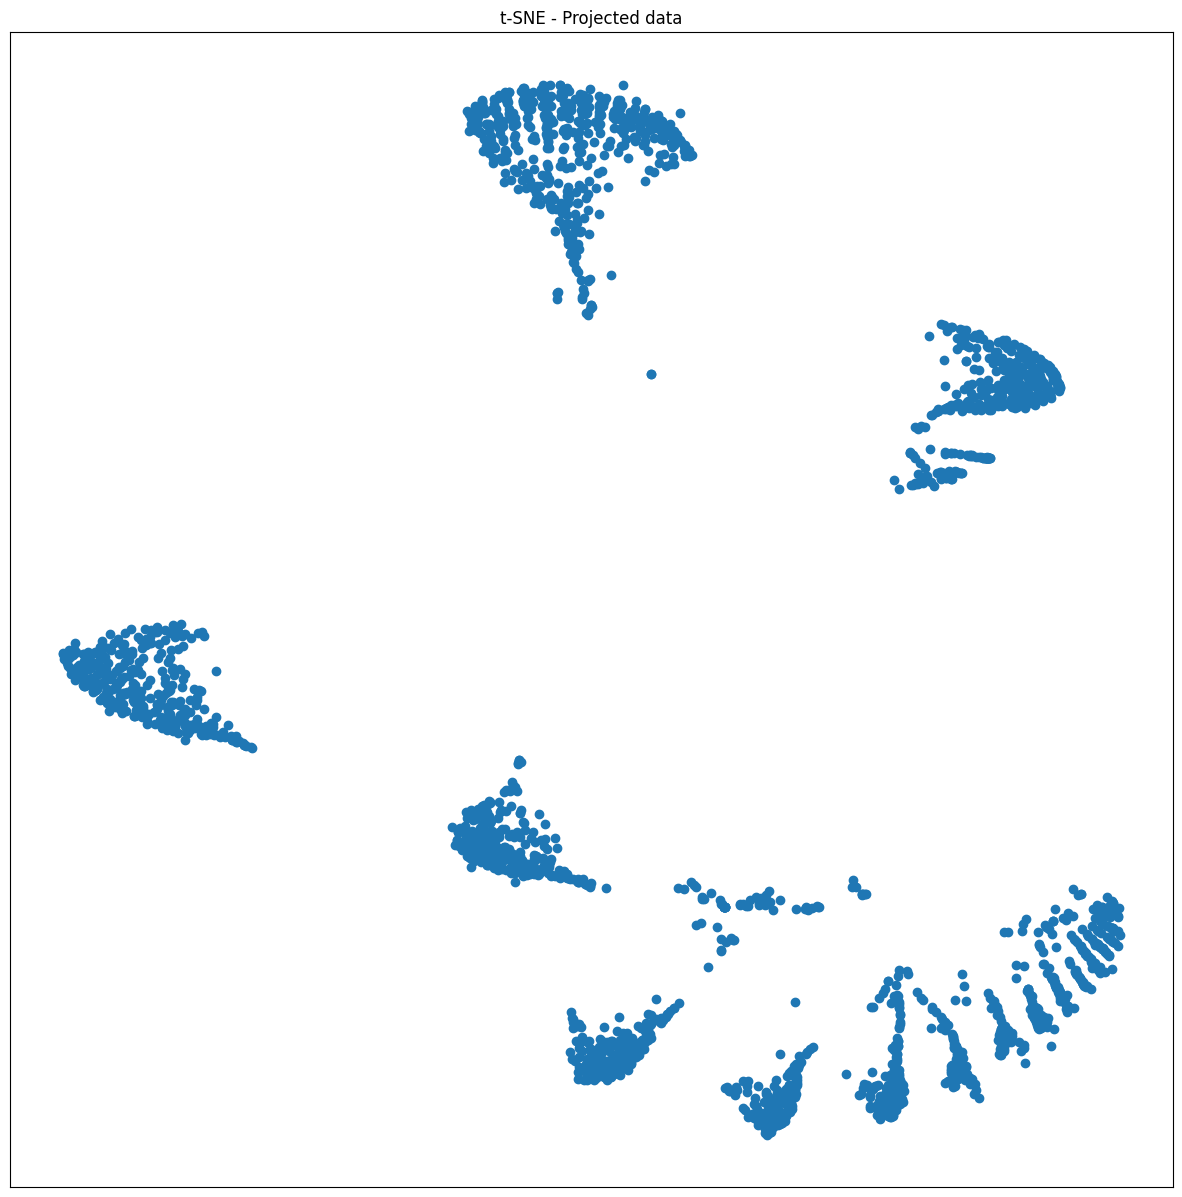

In [135]:
fig = plt.figure(figsize =(15, 15))

# plot original roll
# ax = fig.add_subplot(211, projection='3d')
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
# ax.set_title("Original data")

# plot projected roll
ax = fig.add_subplot()
ax.scatter(tsne_pca[:, 0], tsne_pca[:, 1], cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('t-SNE - Projected data')
plt.show()

In [142]:
tsne_pca_pipeline = Pipeline([("scaler", StandardScaler()),("pca", PCA(n_components = 4)), ("tsne",TSNE(n_components=2, perplexity=500, n_iter=5000))])

tsne_pca = tsne_pca_pipeline.fit_transform(X_sample)

<ipython-input-143-27c12eecb773>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(tsne_pca[:, 0], tsne_pca[:, 1], cmap=plt.cm.Spectral)


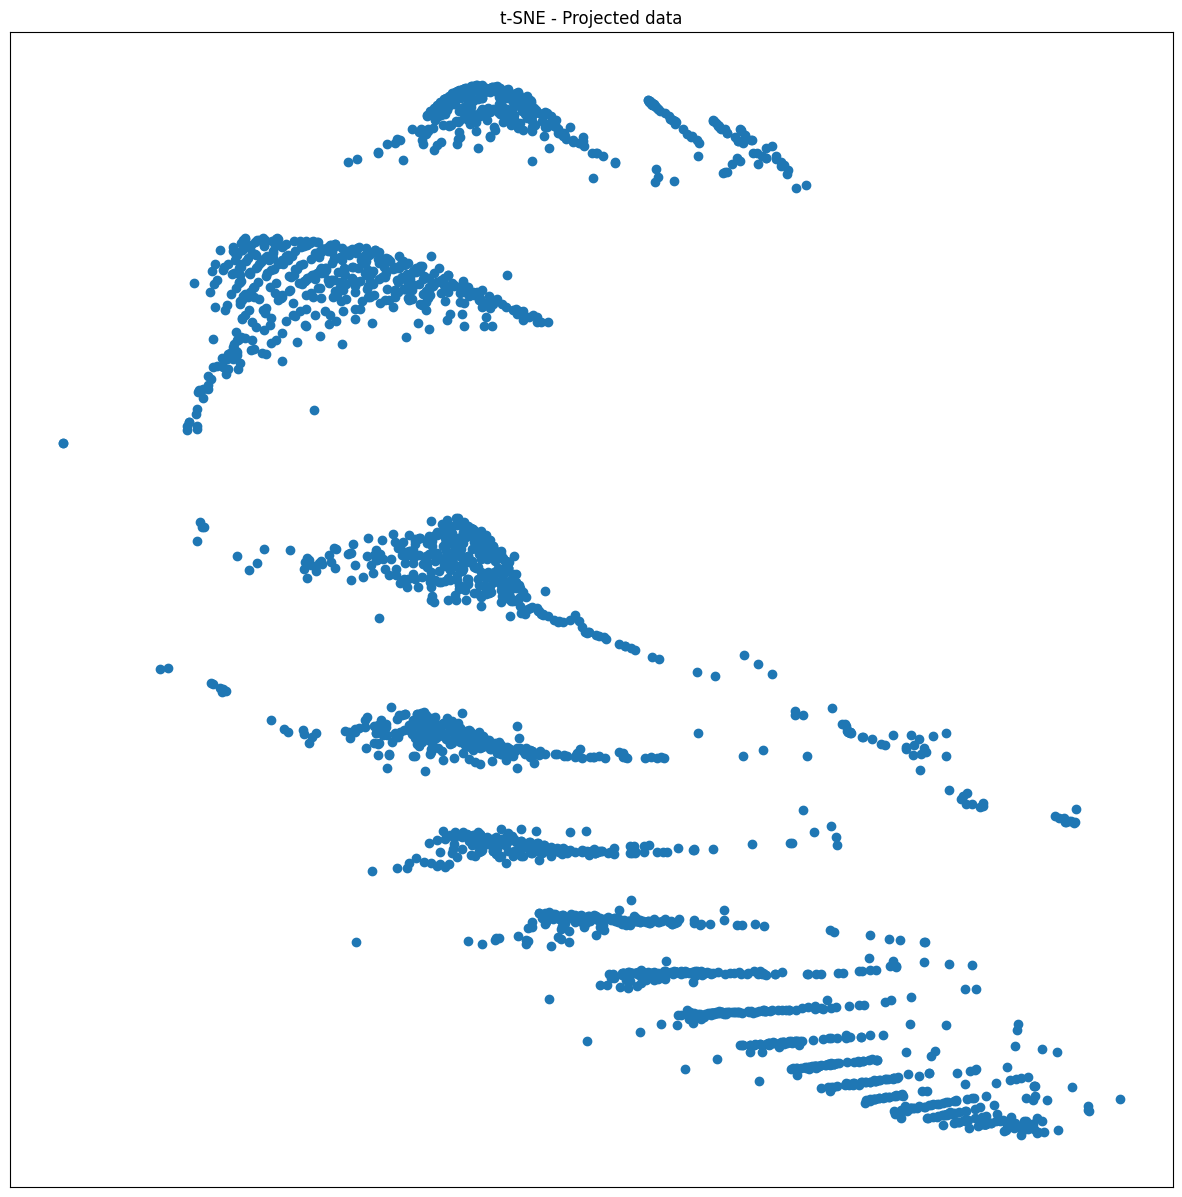

In [143]:
fig = plt.figure(figsize =(15, 15))

# plot original roll
# ax = fig.add_subplot(211, projection='3d')
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
# ax.set_title("Original data")

# plot projected roll
ax = fig.add_subplot()
ax.scatter(tsne_pca[:, 0], tsne_pca[:, 1], cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('t-SNE - Projected data')
plt.show()

##UMAP

###UMAP for visualization

In [137]:
!pip install umap-learn



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82807 sha256=cfa269e55ebf7fa5c3f6fc169ae6104068653b6e5d5e0a9b7829b9116aa32929
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=4c42ca5f9ac418b7de9c0390d7a45f2f1be3932e4e23825c2daf162256b342e9
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [138]:
from sklearn.manifold import TSNE
from umap import UMAP



#### Use pca to reduce noise and keep most of the variance

In [139]:

umap_local_pca_embeddings = Pipeline([("scaler", StandardScaler()),("pca", PCA(n_components = 4)), ("umap",UMAP(n_neighbors=15, n_components=2,  min_dist= 0.01))])

umap_global_pca_embeddings =  Pipeline([("scaler", StandardScaler()),("pca", PCA(n_components = 4)), ("umap", UMAP(n_neighbors=100, n_components=2,  min_dist= 0.5))])


#fit transform data set
X_umap_pca_local = umap_local_pca_embeddings.fit_transform(X_sample)
X_umap_pca_global = umap_global_pca_embeddings.fit_transform(X_sample)



<ipython-input-140-36e632b8430a>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_pca_local[:, 0], X_umap_pca_local[:, 1],cmap=plt.cm.Spectral)


Text(0.5, 1.0, 'Local Focus UMAP after pca - Projected data')

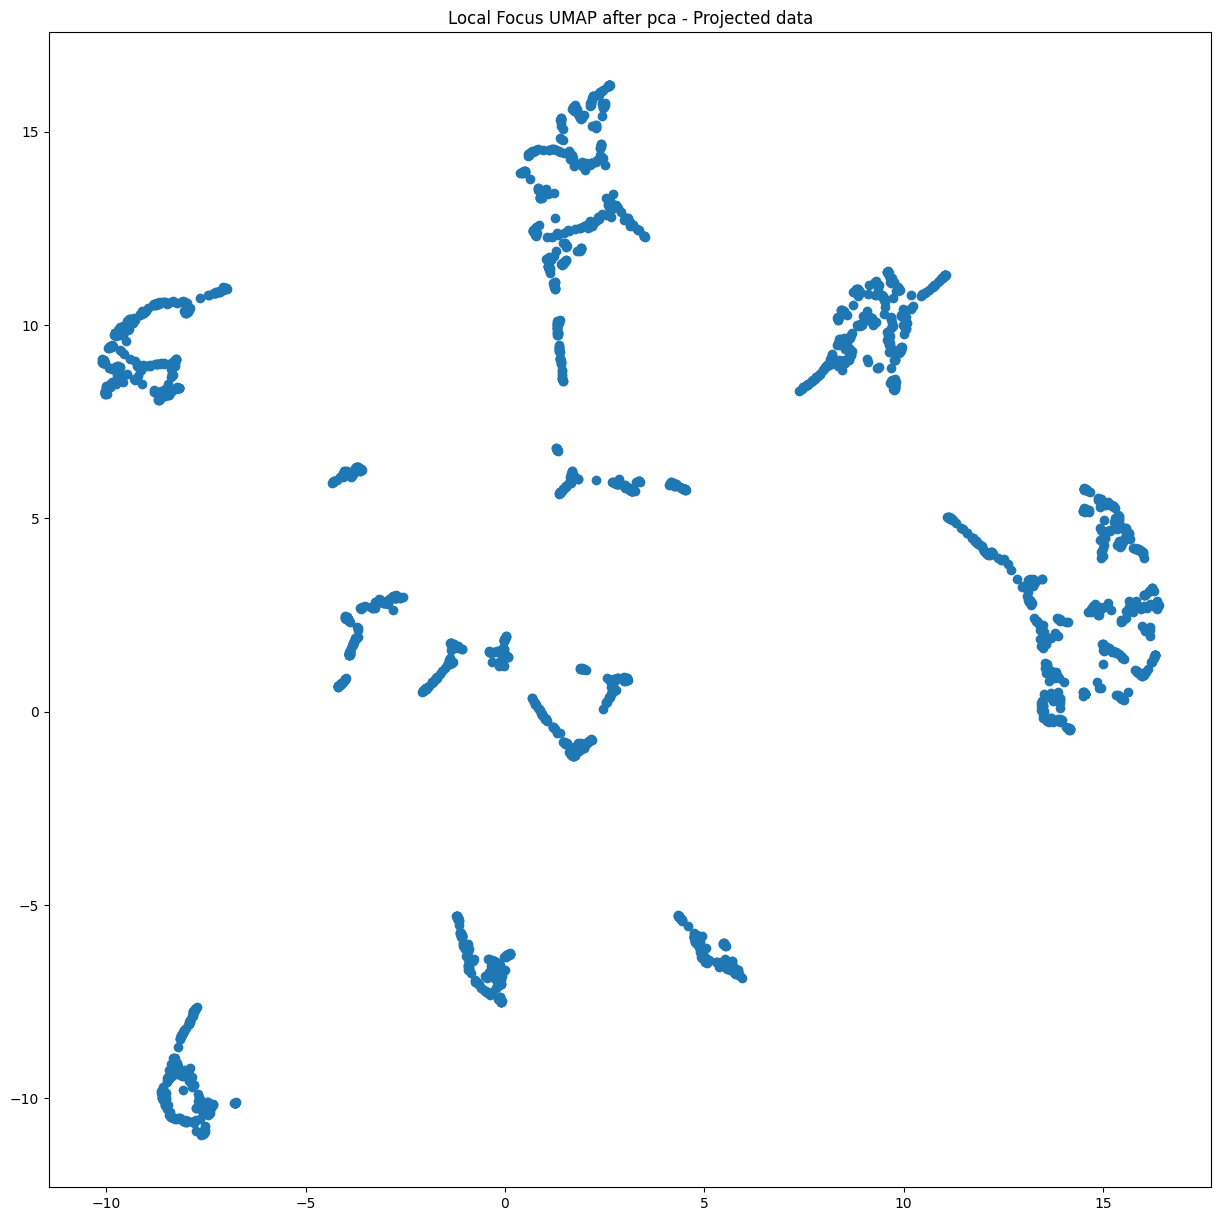

In [140]:
fig = plt.figure(figsize =(15, 15))
plt.scatter(X_umap_pca_local[:, 0], X_umap_pca_local[:, 1],cmap=plt.cm.Spectral)
plt.title('Local Focus UMAP after pca - Projected data')

<ipython-input-141-11fe7bad8d9c>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_pca_global[:, 0], X_umap_pca_global[:, 1],cmap=plt.cm.Spectral)


Text(0.5, 1.0, 'Global Focus UMAP after pca - Projected data')

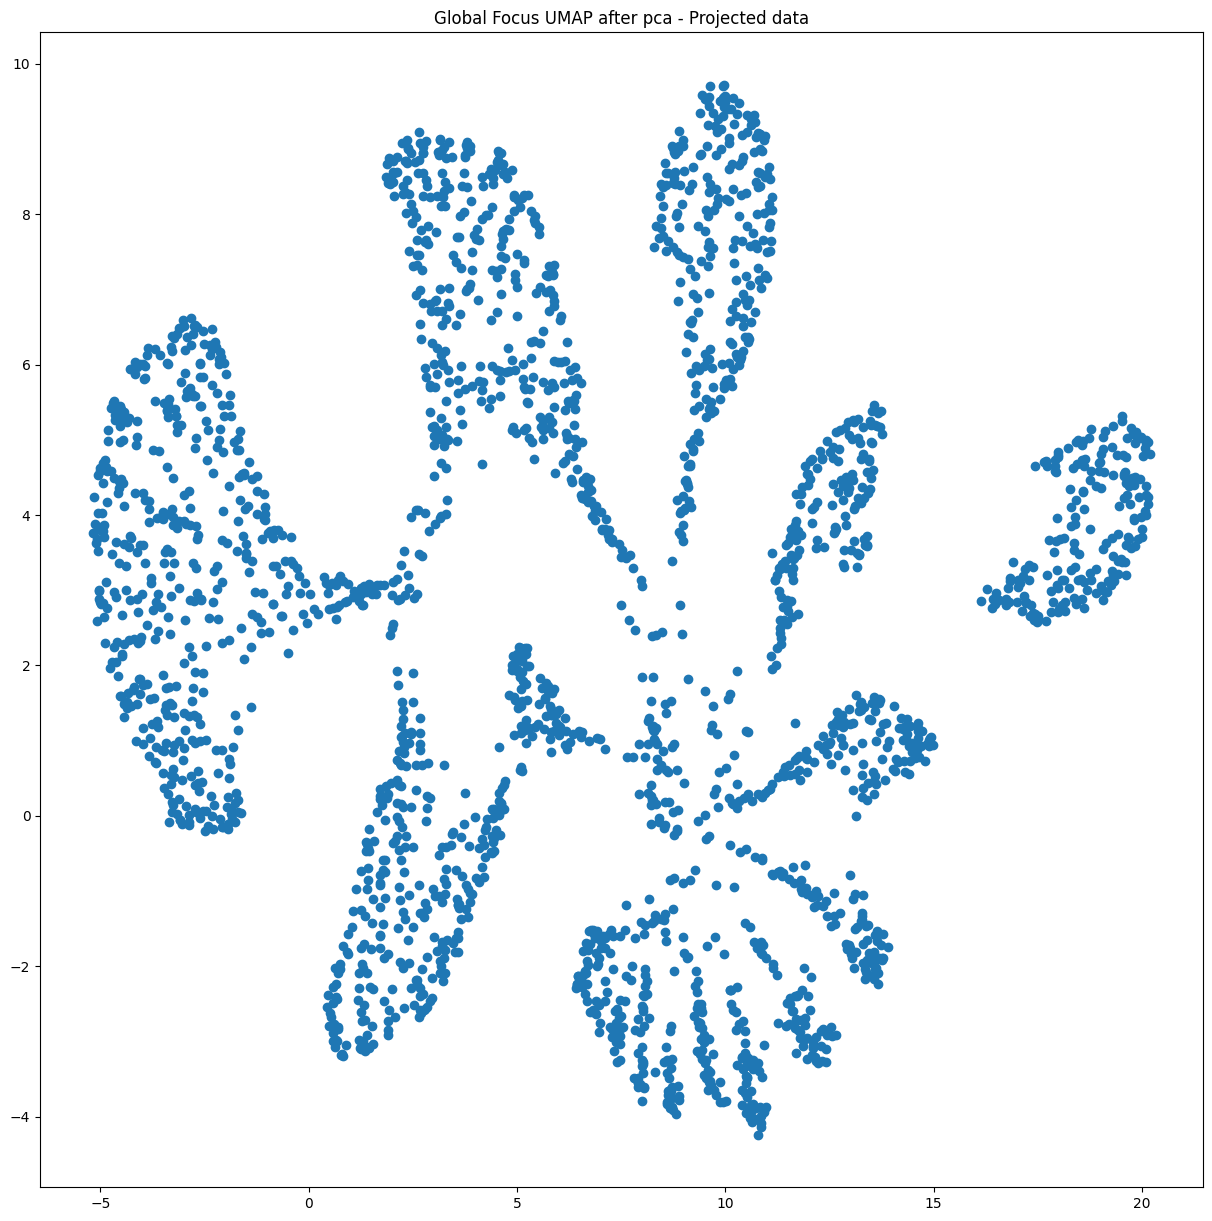

In [141]:
fig = plt.figure(figsize =(15, 15))
plt.scatter(X_umap_pca_global[:, 0], X_umap_pca_global[:, 1],cmap=plt.cm.Spectral)
plt.title('Global Focus UMAP after pca - Projected data')

###UMAP for dimensionality reduction and clustering, visualize it with t-sne

##DBSCAN

In [107]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Define the pipeline
dbscan_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("dbscan", DBSCAN(eps=0.5, min_samples=5))
])

# Fit the data
dbscan_pipeline.fit(X_sample)

# Get cluster labels from the 'dbscan' step of the pipeline
cluster_labels = dbscan_pipeline.named_steps['dbscan'].labels_

# Number of clusters in labels, ignoring noise (outliers) if present
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# Add to your dataframe if desired
#X_sample["dbscan_cluster_labels"] = cluster_labels


Estimated number of clusters: 2
Estimated number of noise points: 77


**use dbscan clusters on tsne sample with perplexitiy level of 200**


**could we maybe use sankey diagram to visualize any flows between addresses?**

In [121]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Define the pipeline
dbscan_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("PCA", PCA(n_components=4)),
    ("dbscan", DBSCAN(eps=0.5, min_samples=5))
])

# Fit the data
dbscan_pipeline.fit(X_sample)

# Get cluster labels from the 'dbscan' step of the pipeline
cluster_labels = dbscan_pipeline.named_steps['dbscan'].labels_

# Number of clusters in labels, ignoring noise (outliers) if present
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# Add to your dataframe if desired
#X_sample["dbscan_cluster_labels"] = cluster_labels

Estimated number of clusters: 1
Estimated number of noise points: 54


##Birch



In [ ]:
#great for large datasets, but needs to have data set with only numerical features!My dataset does only contain numerical features after the EDA


from sklearn.pipeline import Pipeline
from sklearn.cluster import Birch

# Define the pipeline
birch_pipeline = Pipeline([
    ("birch", Birch(n_clusters=12, threshold=0.5, branching_factor=50))
])

# Fit the data
birch_pipeline.fit(X_sample)

# Get cluster labels from the 'birch' step of the pipeline
birch_cluster_labels = birch_pipeline.named_steps['birch'].labels_




##Agglomerative hirarchical clustering with metrics


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score, calinski_harabasz_score


silhouette = []
dbi = []
chi = []

#cluster my data
for k in range(2,15):
  aggloclustering_pipeline = Pipeline([("scaler", StandardScaler()),("cluster",AgglomerativeClustering(n_clusters=k))])
  # Fit the data
  aggloclustering_pipeline.fit(X_sample)
  cluster_labels = aggloclustering_pipeline.named_steps["cluster"].labels_
  #ss.append(aggloclustering_pipeline.named_steps["cluster"].inertia_) - no intertia attribute for aggloclustering, would have to calculate it manually
  silhouette.append(silhouette_score(X_sample, cluster_labels))
  dbi.append(davies_bouldin_score(X_sample, cluster_labels))
  chi.append(calinski_harabasz_score(X_sample, cluster_labels))



ValueError: ignored

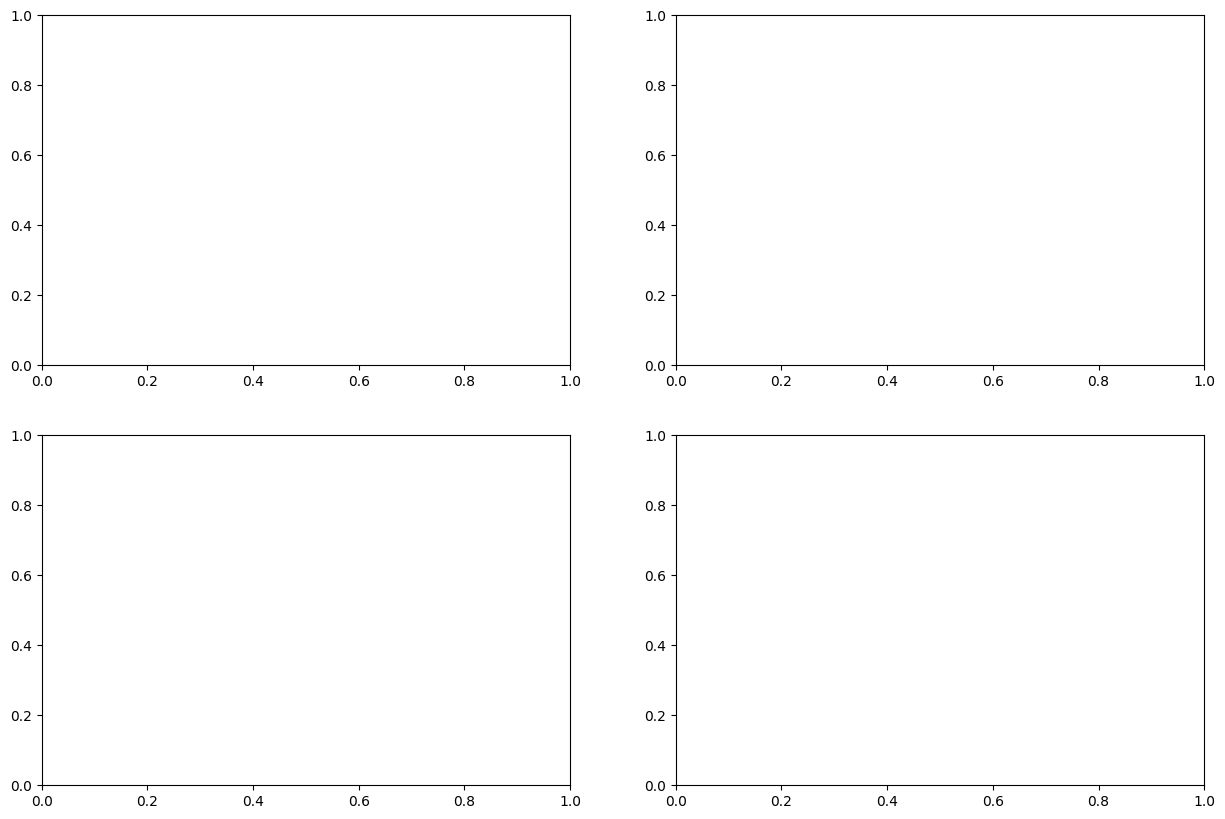

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 10))



# Plot Silhouette Score
axs[0, 1].plot(range(2, 15), silhouette, marker='o', linestyle='--')
axs[0, 1].set_title('Silhouette Score')
axs[0, 1].set_xlabel('Number of Clusters')
axs[0, 1].set_ylabel('Silhouette Score')

# Plot Davies-Bouldin Index
axs[1, 1].plot(range(2, 15), dbi, marker='o', linestyle='--')
axs[1, 1].set_title('Davies-Bouldin Index')
axs[1, 1].set_xlabel('Number of Clusters')
axs[1, 1].set_ylabel('DBI')

# Plot Calinski-Harabasz Index
axs[1, 2].plot(range(2, 15), chi, marker='o', linestyle='--')
axs[1, 2].set_title('Calinski-Harabasz Index')
axs[1, 2].set_xlabel('Number of Clusters')
axs[1, 2].set_ylabel('CHI')

# Adjust layout
plt.tight_layout()
plt.show()

hirarchical clustering using scipy and dendrograms

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Generate some data (replace with your data)


# Perform hierarchical clustering
linked = linkage(X_sample, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,leaf_rotation = 90)
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()


NameError: ignored